In [ ]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq
import pywt

In [ ]:
# Read the CSV data into a pandas DataFrame
filename = '/content/simData.csv'
data = pd.read_csv(filename)

# Display first few rows and summary of the data
print("Data Head:")
print(data.head())

print("\nData Info:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())


Data Head:
      Time        Va        Vb        Vc         Ia        Ib         Ic
0  0.00000  0.139363 -0.567518  0.412858 -57.807110  7.012546  47.805007
1  0.00005  0.184285 -0.576841  0.495832 -53.903692  5.814680  50.641077
2  0.00010  0.157628 -0.537648  0.418198 -53.929041  4.917295  49.397667
3  0.00015  0.170352 -0.571641  0.419407 -56.613911  4.294806  53.305595
4  0.00020  0.184991 -0.586323  0.425987 -53.305993  3.059108  51.992178

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    100001 non-null  float64
 1   Va      100001 non-null  float64
 2   Vb      100001 non-null  float64
 3   Vc      100001 non-null  float64
 4   Ia      100001 non-null  float64
 5   Ib      100001 non-null  float64
 6   Ic      100001 non-null  float64
dtypes: float64(7)
memory usage: 5.3 MB
None

Statistical Summary:
                Time

# 1. Exploratory Data Analysis (EDA)

**•	Time Series Visualization:**

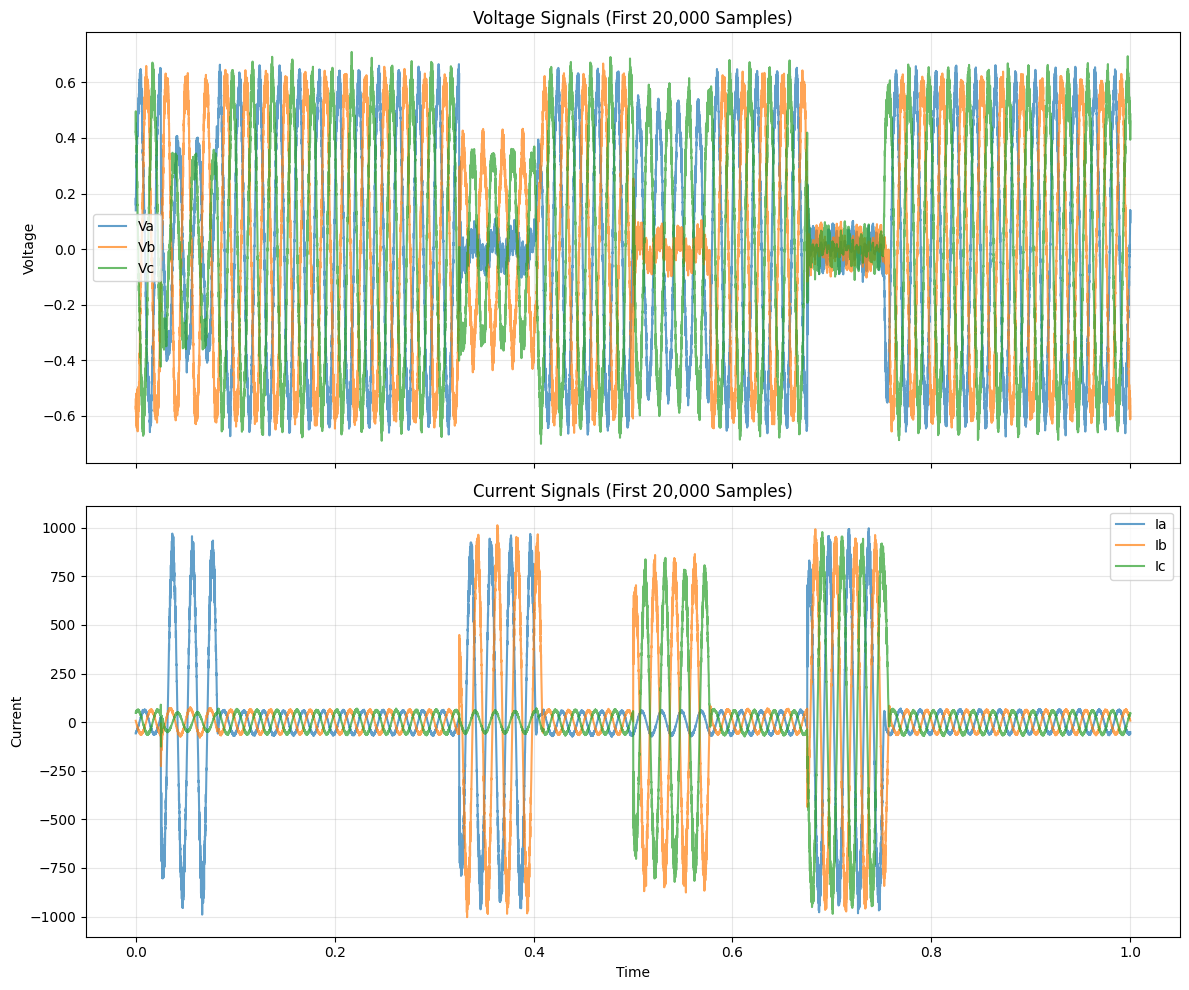

In [ ]:
# Extract the first 20000 samples of each signal
time_subset = data['Time'][:20000]
Va_subset = data['Va'][:20000]
Vb_subset = data['Vb'][:20000]
Vc_subset = data['Vc'][:20000]
Ia_subset = data['Ia'][:20000]
Ib_subset = data['Ib'][:20000]
Ic_subset = data['Ic'][:20000]

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot voltage signals (first 20000 samples)
axs[0].plot(time_subset, Va_subset, label='Va', linewidth=1.5, alpha=0.7)
axs[0].plot(time_subset, Vb_subset, label='Vb', linewidth=1.5, alpha=0.7)
axs[0].plot(time_subset, Vc_subset, label='Vc', linewidth=1.5, alpha=0.7)
axs[0].set_ylabel('Voltage')
axs[0].set_title('Voltage Signals (First 20,000 Samples)')
axs[0].legend()
axs[0].grid(True, alpha=0.3)

# Plot current signals (first 20000 samples)
axs[1].plot(time_subset, Ia_subset, label='Ia', linewidth=1.5, alpha=0.7)
axs[1].plot(time_subset, Ib_subset, label='Ib', linewidth=1.5, alpha=0.7)
axs[1].plot(time_subset, Ic_subset, label='Ic', linewidth=1.5, alpha=0.7)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Current')
axs[1].set_title('Current Signals (First 20,000 Samples)')
axs[1].legend()
axs[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

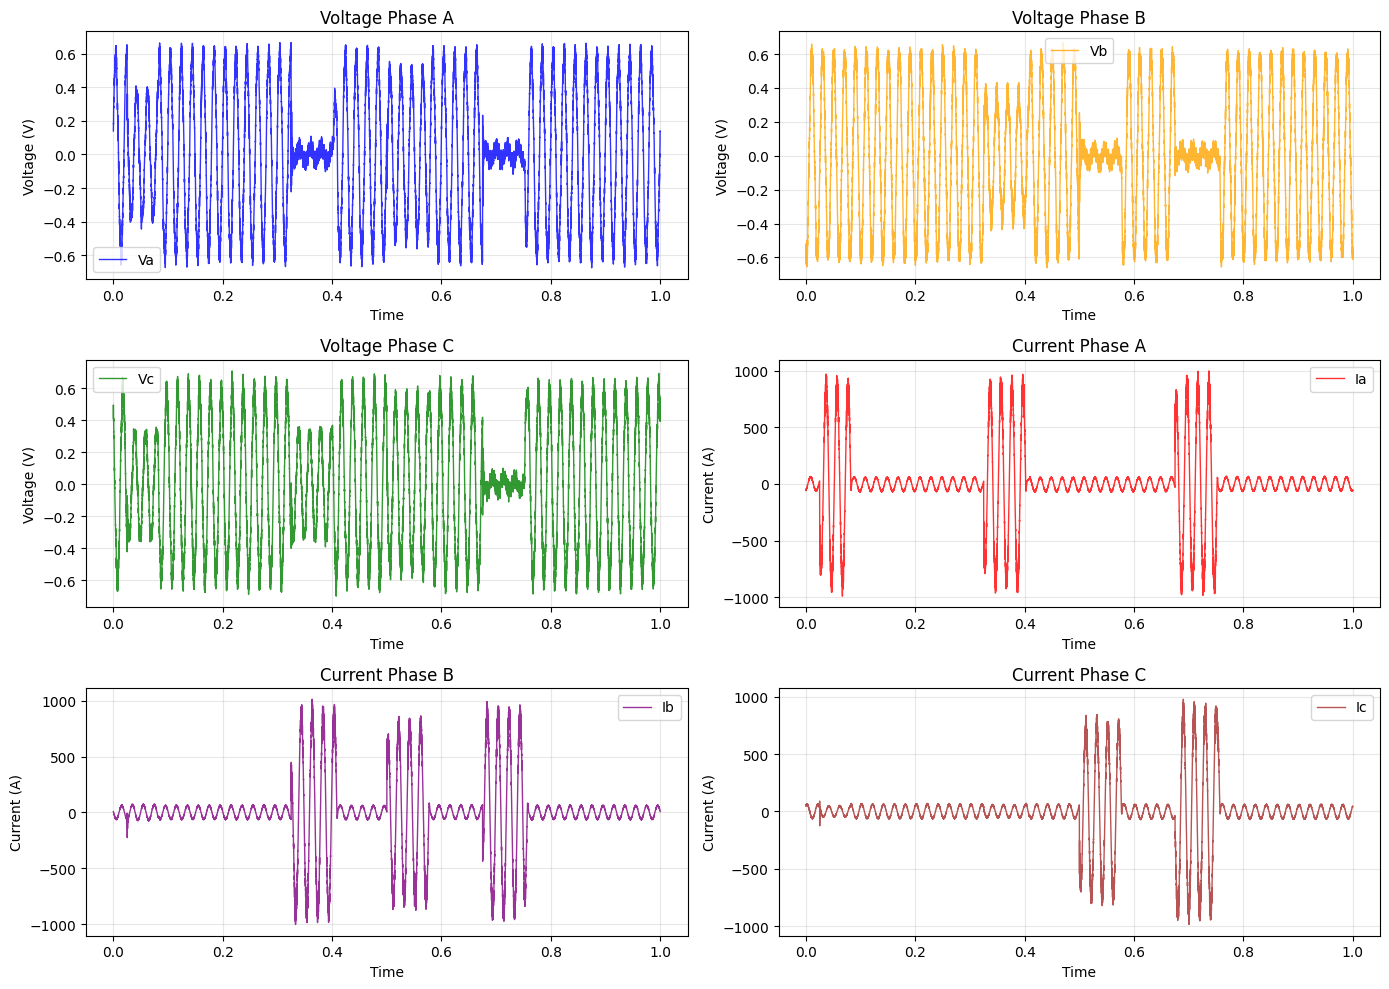

In [ ]:
plt.figure(figsize=(14, 10))

# Plot each signal in a separate subplot
plt.subplot(3, 2, 1)
plt.plot(time_subset, Va_subset, label='Va', color='blue', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.title('Voltage Phase A')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 2, 2)
plt.plot(time_subset, Vb_subset, label='Vb', color='orange', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.title('Voltage Phase B')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 2, 3)
plt.plot(time_subset, Vc_subset, label='Vc', color='green', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.title('Voltage Phase C')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 2, 4)
plt.plot(time_subset, Ia_subset, label='Ia', color='red', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Current (A)')
plt.title('Current Phase A')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 2, 5)
plt.plot(time_subset, Ib_subset, label='Ib', color='purple', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Current (A)')
plt.title('Current Phase B')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 2, 6)
plt.plot(time_subset, Ic_subset, label='Ic', color='brown', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Current (A)')
plt.title('Current Phase C')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

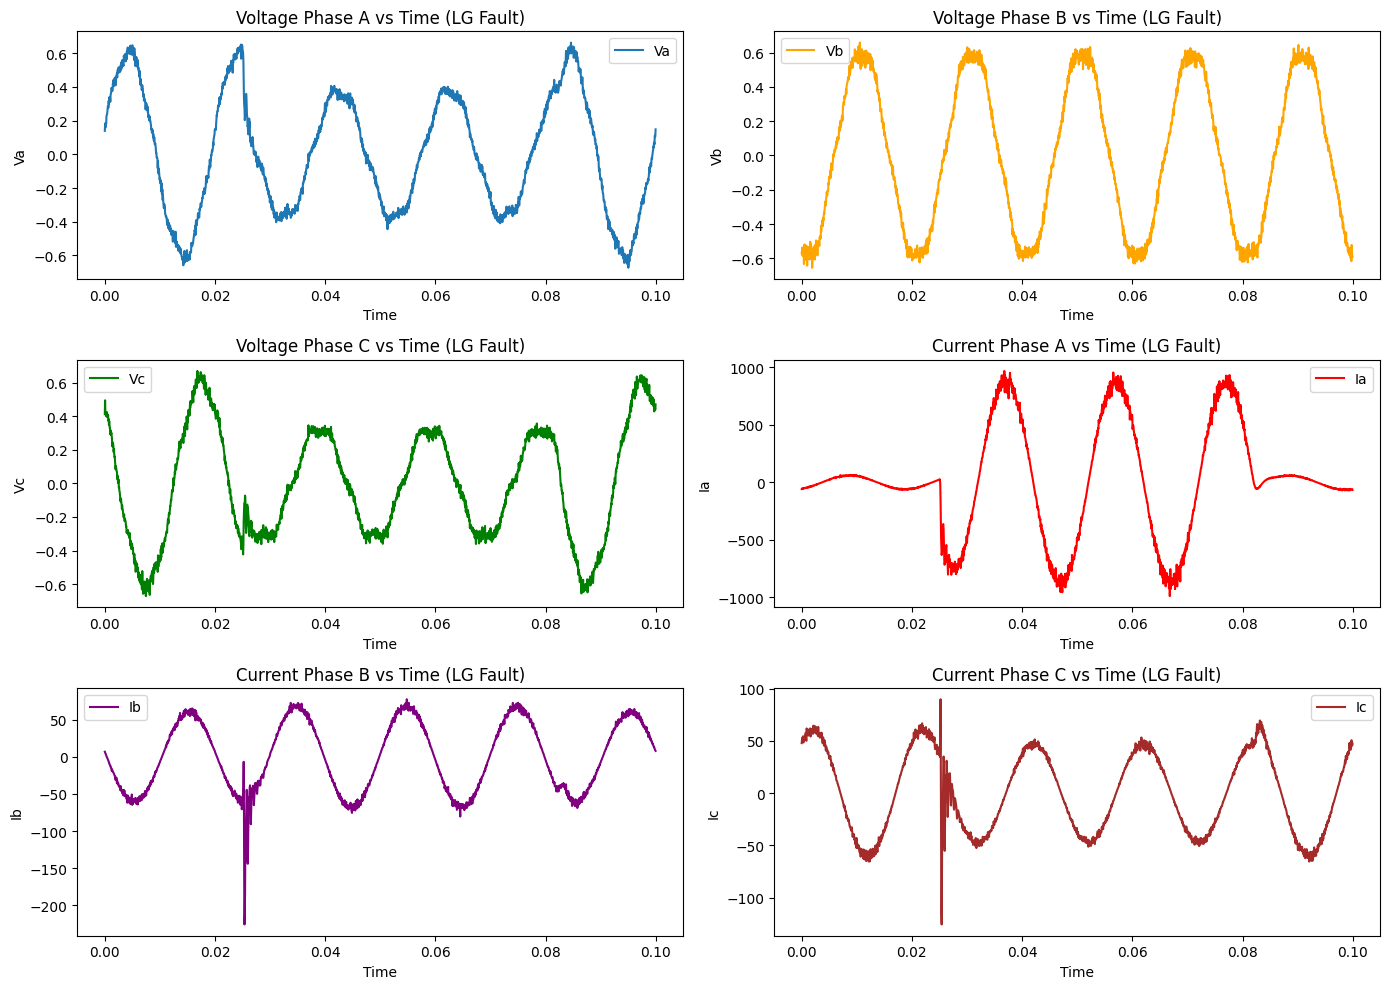

In [ ]:
# Determine the cutoff time
time_min = time_subset.min()
time_max = time_subset.max()
cutoff = time_min + 0.1 * (time_max - time_min)

# Filter data for the first 100 ms
data_first10 = data[data['Time'] <= cutoff]

time_10 = data_first10['Time']
Va_10 = data_first10['Va']
Vb_10 = data_first10['Vb']
Vc_10 = data_first10['Vc']
Ia_10 = data_first10['Ia']
Ib_10 = data_first10['Ib']
Ic_10 = data_first10['Ic']

plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(time_10, Va_10, label='Va')
plt.xlabel('Time')
plt.ylabel('Va')
plt.title('Voltage Phase A vs Time (LG Fault)')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(time_10, Vb_10, label='Vb', color='orange')
plt.xlabel('Time')
plt.ylabel('Vb')
plt.title('Voltage Phase B vs Time (LG Fault)')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(time_10, Vc_10, label='Vc', color='green')
plt.xlabel('Time')
plt.ylabel('Vc')
plt.title('Voltage Phase C vs Time (LG Fault)')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(time_10, Ia_10, label='Ia', color='red')
plt.xlabel('Time')
plt.ylabel('Ia')
plt.title('Current Phase A vs Time (LG Fault)')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(time_10, Ib_10, label='Ib', color='purple')
plt.xlabel('Time')
plt.ylabel('Ib')
plt.title('Current Phase B vs Time (LG Fault)')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(time_10, Ic_10, label='Ic', color='brown')
plt.xlabel('Time')
plt.ylabel('Ic')
plt.title('Current Phase C vs Time (LG Fault)')
plt.legend()

plt.tight_layout()
plt.show()

**•	Spectral Analysis:**

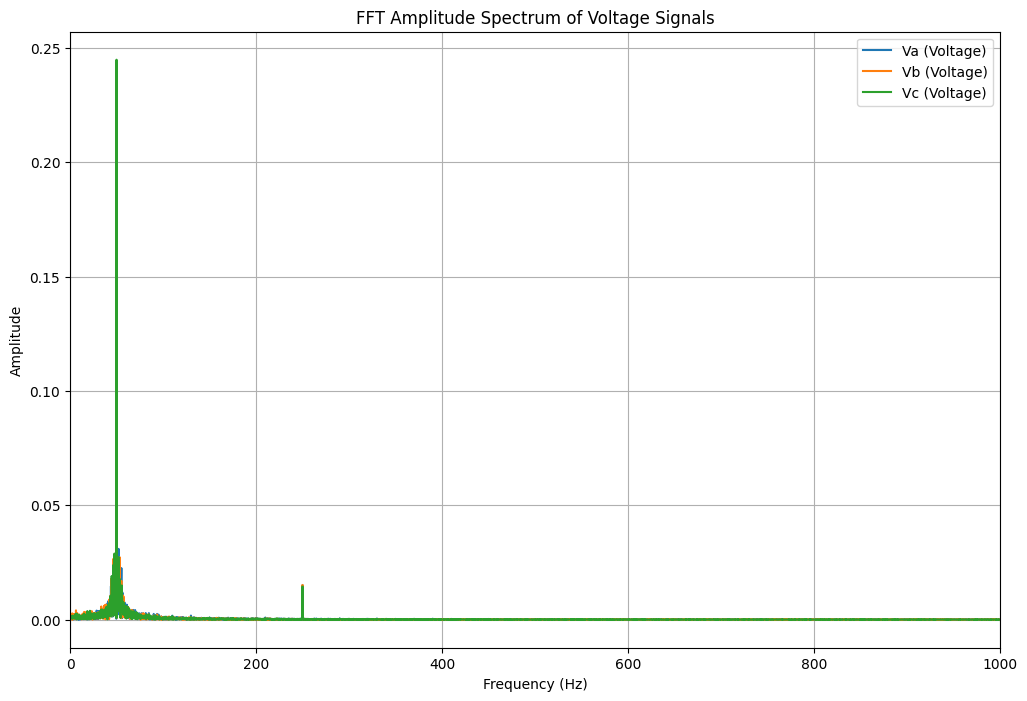

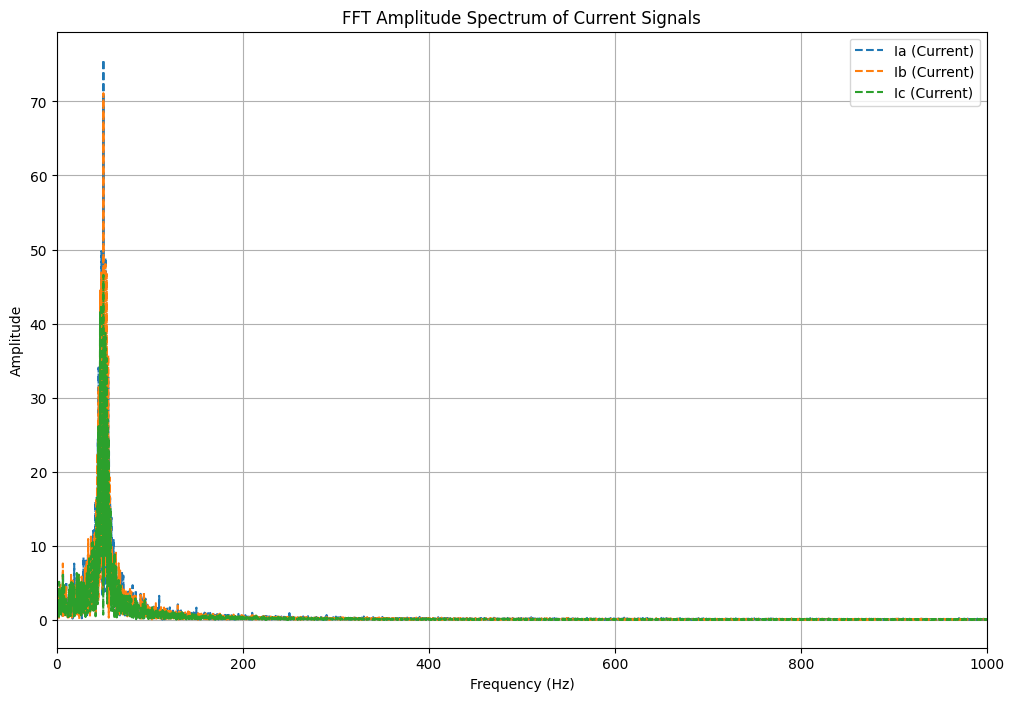

In [ ]:
# Extract the time and voltage signals (Va, Vb, Vc) and current signals (Ia, Ib, Ic) from the dataset
time = data['Time'].values
Va = data['Va'].values
Vb = data['Vb'].values
Vc = data['Vc'].values
Ia = data['Ia'].values
Ib = data['Ib'].values
Ic = data['Ic'].values

# ---------------------------
# Sampling Parameters
# ---------------------------
# Determine the sampling interval (dt) and the sampling frequency (Fs)
dt = time[1] - time[0]          # Sampling interval (time difference between two consecutive points)
Fs = 1.0 / dt                   # Sampling frequency (how frequently data points are sampled)
N = len(time)                   # Total number of data points (length of the time series)

# ---------------------------
# Fast Fourier Transform (FFT) Analysis for Voltage
# ---------------------------
# Compute the FFT for the voltage signals (Va, Vb, Vc)
fft_Va = fft(Va)
fft_Vb = fft(Vb)
fft_Vc = fft(Vc)

# Generate the corresponding frequency values (in Hz)
freq = fftfreq(N, dt)

# We are interested only in the positive frequencies, so filter out the negative ones.
# This is because the FFT produces both positive and negative frequencies, but they are symmetric.
mask = freq >= 0
freq_pos = freq[mask]

# Compute the amplitude spectrum for each voltage signal (normalized by N to avoid scaling issues)
amp_Va = np.abs(fft_Va)[mask] / N
amp_Vb = np.abs(fft_Vb)[mask] / N
amp_Vc = np.abs(fft_Vc)[mask] / N

# ---------------------------
# Fast Fourier Transform (FFT) Analysis for Current
# ---------------------------
# Compute the FFT for the current signals (Ia, Ib, Ic)
fft_Ia = fft(Ia)
fft_Ib = fft(Ib)
fft_Ic = fft(Ic)

# Compute the amplitude spectrum for each current signal (normalized by N)
amp_Ia = np.abs(fft_Ia)[mask] / N
amp_Ib = np.abs(fft_Ib)[mask] / N
amp_Ic = np.abs(fft_Ic)[mask] / N

# ---------------------------
# Plot the FFT Amplitude Spectrum for Voltage Signals
# ---------------------------
plt.figure(figsize=(12, 8))
plt.plot(freq_pos, amp_Va, label='Va (Voltage)', linewidth=1.5)
plt.plot(freq_pos, amp_Vb, label='Vb (Voltage)', linewidth=1.5)
plt.plot(freq_pos, amp_Vc, label='Vc (Voltage)', linewidth=1.5)
plt.xlim(0, 1000)  # Limit the frequency range for clarity (adjust if necessary)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Amplitude Spectrum of Voltage Signals')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Plot the FFT Amplitude Spectrum for Current Signals
# ---------------------------
plt.figure(figsize=(12, 8))
plt.plot(freq_pos, amp_Ia, label='Ia (Current)', linestyle='--', linewidth=1.5)
plt.plot(freq_pos, amp_Ib, label='Ib (Current)', linestyle='--', linewidth=1.5)
plt.plot(freq_pos, amp_Ic, label='Ic (Current)', linestyle='--', linewidth=1.5)
plt.xlim(0, 1000)  # Limit the frequency range for clarity (adjust if necessary)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Amplitude Spectrum of Current Signals')
plt.legend()
plt.grid(True)
plt.show()


**Continuous Wavelet Transform (CWT) Analysis:**

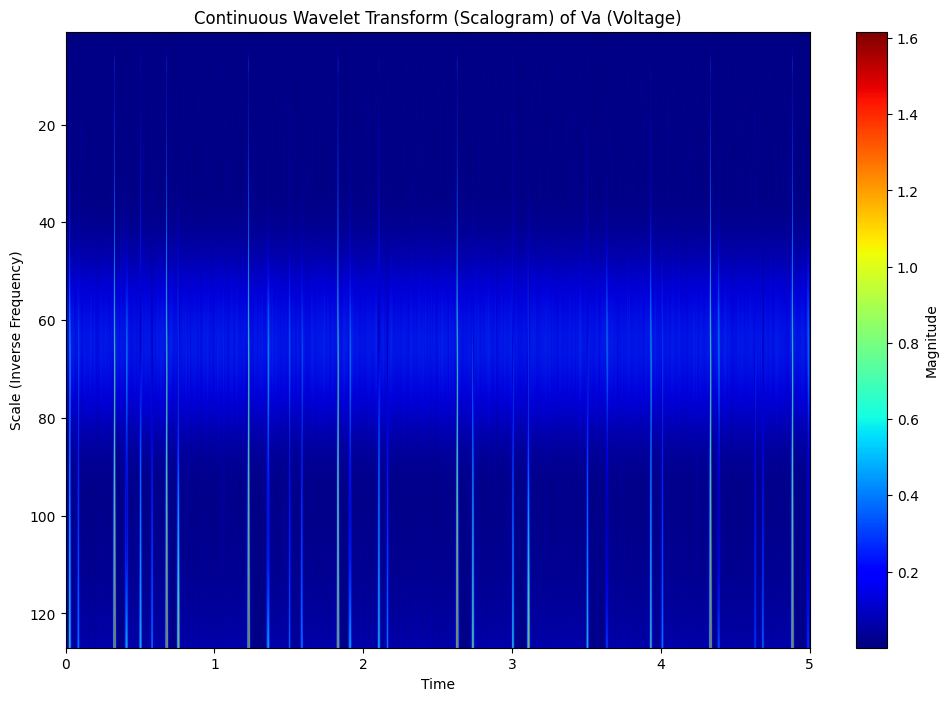

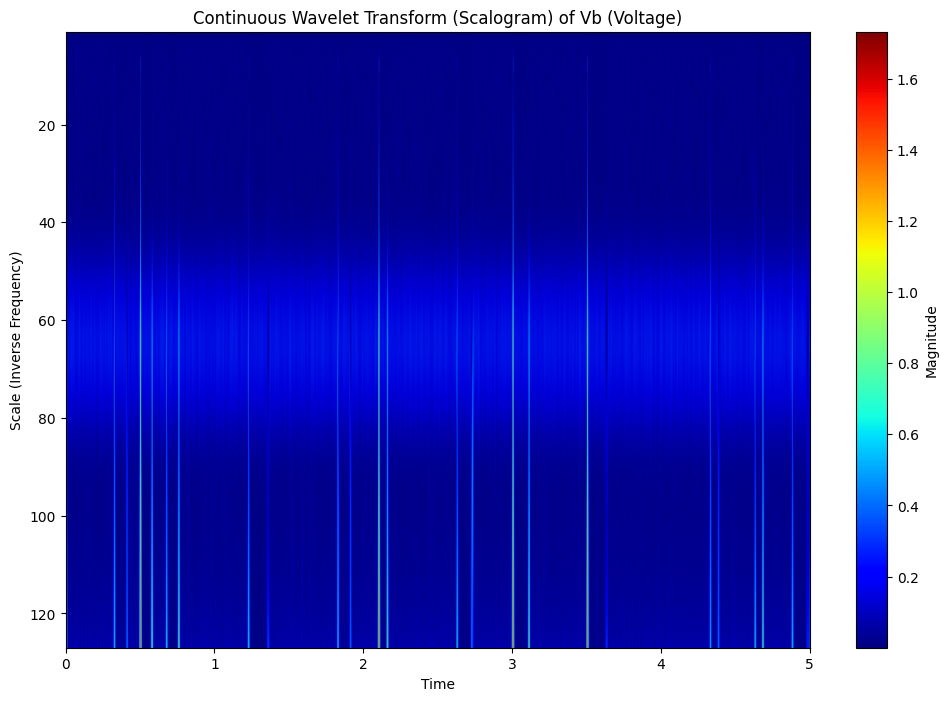

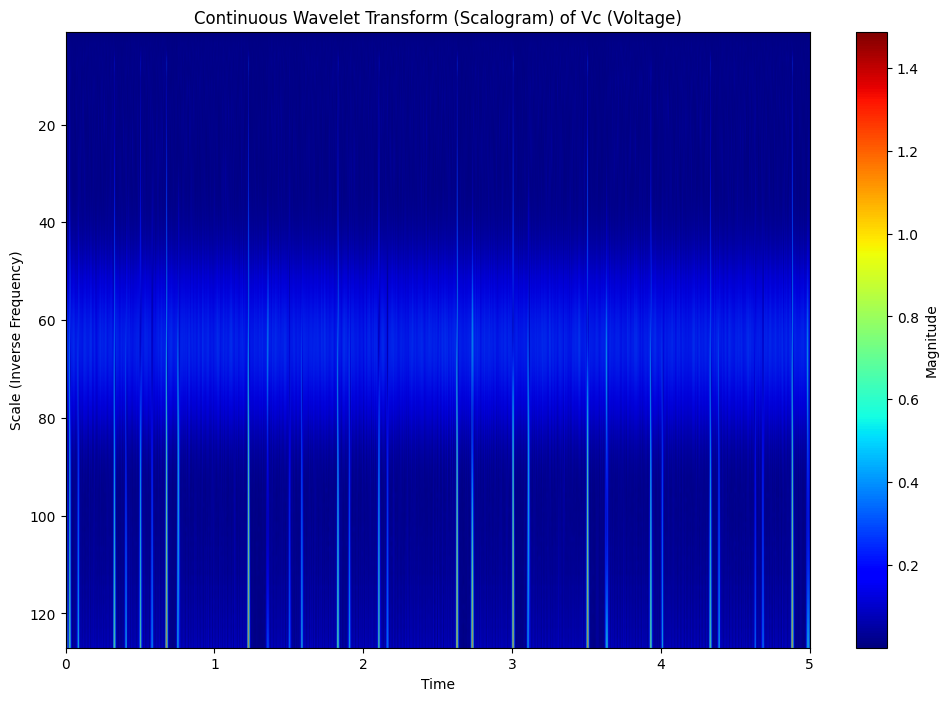

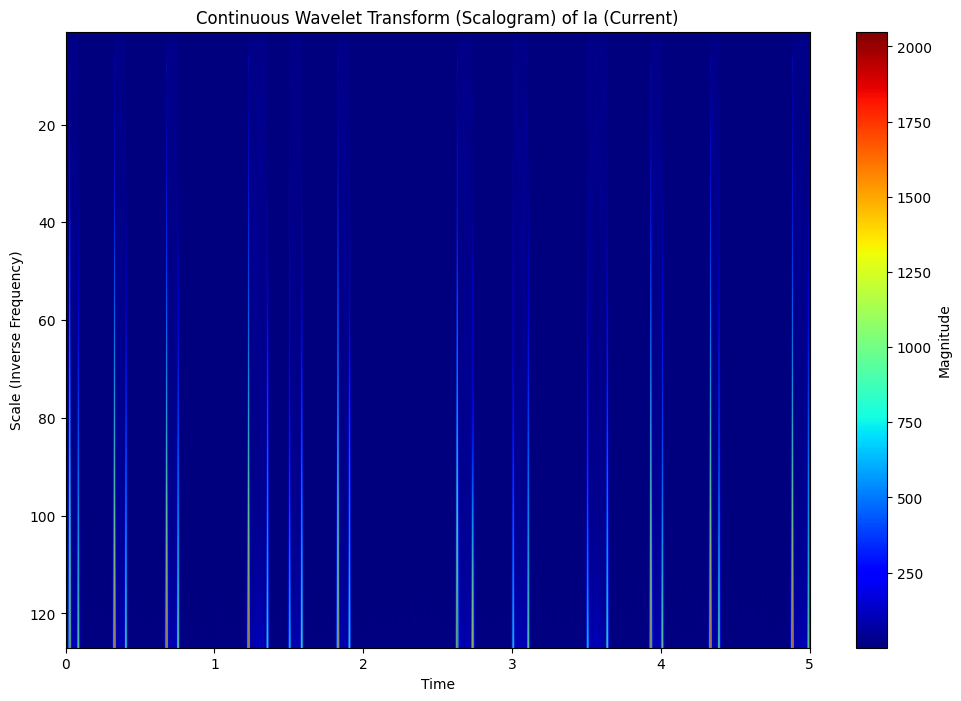

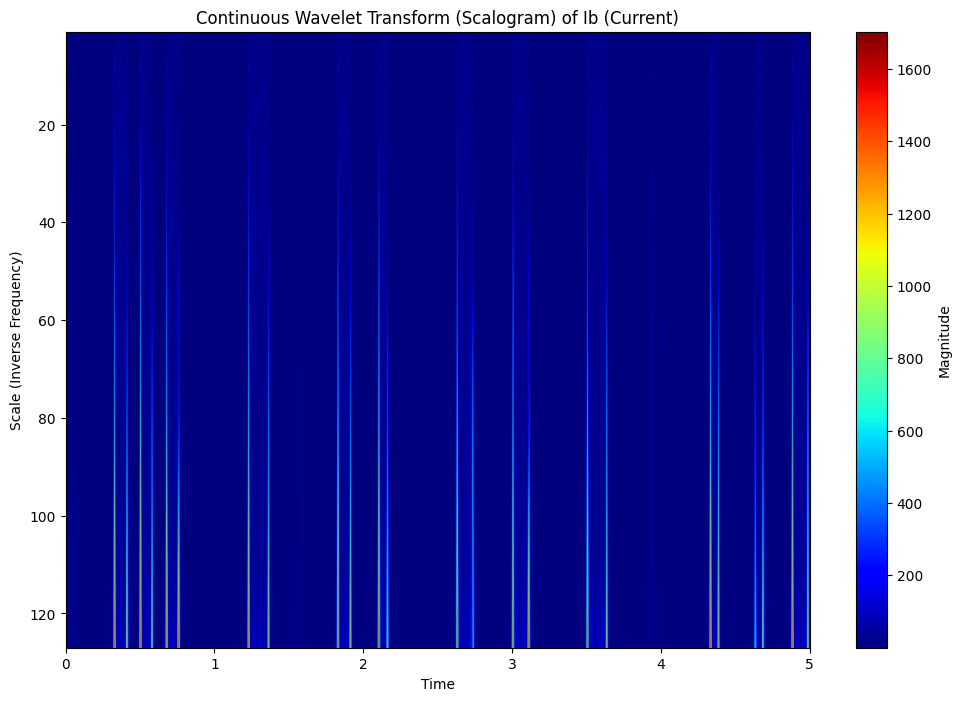

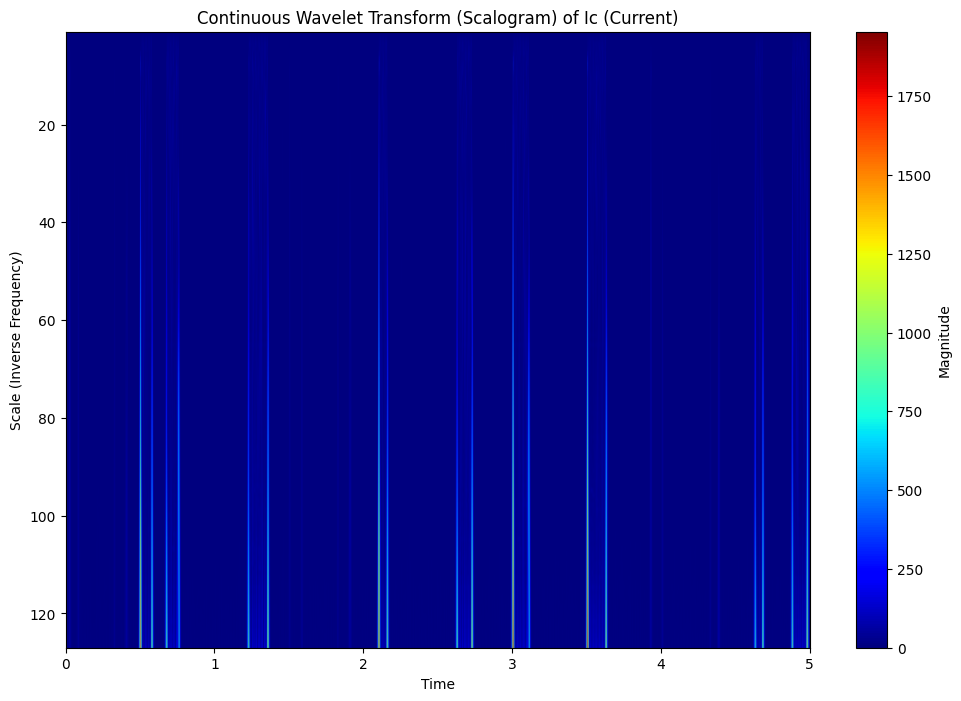

In [ ]:
# ---------------------------
# Sampling Parameters
# ---------------------------
dt = time[1] - time[0]  # Sampling interval (time difference between two consecutive points)

# ---------------------------
# Continuous Wavelet Transform (CWT) for Voltage Signals
# ---------------------------
scales = np.arange(1, 128)  # Define scales for the CWT analysis (higher scale means lower frequency)

# Perform CWT using the Morlet wavelet for the voltage signals (Va, Vb, Vc)
cwt_Va, frequencies_Va = pywt.cwt(Va, scales, 'morl', dt)
cwt_Vb, frequencies_Vb = pywt.cwt(Vb, scales, 'morl', dt)
cwt_Vc, frequencies_Vc = pywt.cwt(Vc, scales, 'morl', dt)

# ---------------------------
# Continuous Wavelet Transform (CWT) for Current Signals
# ---------------------------
# Perform CWT using the Morlet wavelet for the current signals (Ia, Ib, Ic)
cwt_Ia, frequencies_Ia = pywt.cwt(Ia, scales, 'morl', dt)
cwt_Ib, frequencies_Ib = pywt.cwt(Ib, scales, 'morl', dt)
cwt_Ic, frequencies_Ic = pywt.cwt(Ic, scales, 'morl', dt)

# ---------------------------
# Plot the CWT Scalogram for Voltage Signals
# ---------------------------
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_Va), extent=[time[0], time[-1], scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (Scalogram) of Va (Voltage)')
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.colorbar(label='Magnitude')
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_Vb), extent=[time[0], time[-1], scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (Scalogram) of Vb (Voltage)')
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.colorbar(label='Magnitude')
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_Vc), extent=[time[0], time[-1], scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (Scalogram) of Vc (Voltage)')
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.colorbar(label='Magnitude')
plt.show()

# ---------------------------
# Plot the CWT Scalogram for Current Signals
# ---------------------------
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_Ia), extent=[time[0], time[-1], scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (Scalogram) of Ia (Current)')
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.colorbar(label='Magnitude')
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_Ib), extent=[time[0], time[-1], scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (Scalogram) of Ib (Current)')
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.colorbar(label='Magnitude')
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_Ic), extent=[time[0], time[-1], scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (Scalogram) of Ic (Current)')
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.colorbar(label='Magnitude')
plt.show()


# 2. Preprocessing the Signals

* **Remove noise**  from the signals using a low-pass filter (since we have sinusoidal signals, we want to keep the low-frequency components intact).

* **Normalize** the data to bring all signals to a similar scale (between 0 and 1).

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
from scipy.signal import butter, filtfilt

In [ ]:
# Low-pass filter to remove high-frequency noise
def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order)
    return filtfilt(b, a, data)

# Apply the filter to your signals
fs = 1 / (time[1] - time[0])  # Sampling frequency
cutoff = 50  # Set cutoff frequency based on your signal characteristics
Va_filtered = butter_lowpass_filter(Va, cutoff, fs)
Vb_filtered = butter_lowpass_filter(Vb, cutoff, fs)
Vc_filtered = butter_lowpass_filter(Vc, cutoff, fs)
Ia_filtered = butter_lowpass_filter(Ia, cutoff, fs)
Ib_filtered = butter_lowpass_filter(Ib, cutoff, fs)
Ic_filtered = butter_lowpass_filter(Ic, cutoff, fs)

# Normalize signals
scaler = StandardScaler()
signals_normalized = scaler.fit_transform(np.column_stack([Va_filtered, Vb_filtered, Vc_filtered, Ia_filtered, Ib_filtered, Ic_filtered]))

* **Feature Extraction**

In [ ]:
signals = ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']
time = data['Time'].values

# -------------------------------
# Define windowing parameters
# -------------------------------
window_size = 500  # Number of samples per window
step_size = 250    # Step size for moving window (50% overlap for smoother transitions)

# Initialize a list to collect feature vectors for each window
features = []

# -------------------------------
# Slide the window over the dataset
# -------------------------------
for start in range(0, len(data) - window_size, step_size):
    end = start + window_size

    # Extract the current window from the DataFrame
    window = data.iloc[start:end]

    # Initialize a dictionary to store the features for this window
    feature_vector = {
        'start_time': time[start],
        'end_time': time[end - 1]  # Time interval covered by the current window
    }

    # -------------------------------
    # Loop through each signal (Va, Vb, Vc, Ia, Ib, Ic)
    # -------------------------------
    for sig in signals:
        sig_data = window[sig].values  # Extract signal values for this window

        # Statistical Features:
        feature_vector[f'{sig}_mean'] = np.mean(sig_data)        # Average value
        feature_vector[f'{sig}_std'] = np.std(sig_data)          # Standard deviation
        feature_vector[f'{sig}_min'] = np.min(sig_data)          # Minimum value
        feature_vector[f'{sig}_max'] = np.max(sig_data)          # Maximum value
        feature_vector[f'{sig}_skew'] = skew(sig_data)           # Skewness (asymmetry)
        feature_vector[f'{sig}_kurt'] = kurtosis(sig_data)       # Kurtosis (peakedness)

        # Signal Power Features:
        feature_vector[f'{sig}_rms'] = np.sqrt(np.mean(sig_data ** 2))  # RMS: effective power of the signal
        feature_vector[f'{sig}_peak2peak'] = np.ptp(sig_data)           # Peak-to-peak: max - min

        # Crest Factor = max(abs(signal)) / RMS
        rms = feature_vector[f'{sig}_rms']
        if rms > 0:
            feature_vector[f'{sig}_crest'] = np.max(np.abs(sig_data)) / rms
        else:
            feature_vector[f'{sig}_crest'] = 0  # Avoid division by zero

    # Append the dictionary of features to the list
    features.append(feature_vector)

# -------------------------------
# Convert the list of feature vectors into a DataFrame
# -------------------------------
feature_df = pd.DataFrame(features)

# Preview the first few rows of extracted features
feature_df.head()

start_time  end_time   Va_mean    Va_std    Va_min    Va_max   Va_skew  \
0      0.0000   0.02495  0.092808  0.428728 -0.658518  0.651908 -0.346911   
1      0.0125   0.03745 -0.099006  0.362516 -0.658518  0.651908  0.555319   
2      0.0250   0.04995  0.006288  0.256300 -0.402798  0.619913  0.058447   
3      0.0375   0.06245  0.047282  0.266534 -0.443925  0.407094 -0.292076   
4      0.0500   0.07495 -0.069493  0.280090 -0.443925  0.401358  0.375917   

    Va_kurt    Va_rms  Va_peak2peak  ...  Ib_crest    Ic_mean     Ic_std  \
0 -1.392566  0.438658      1.310426  ...  1.675901  10.710026  44.039387   
1 -0.753360  0.375792      1.310426  ...  4.368711  -4.873727  39.666491   
2 -1.216355  0.256377      1.022711  ...  4.365569  -2.491809  33.244327   
3 -1.329664  0.270695      0.851019  ...  1.717505   6.678497  33.224144   
4 -1.415987  0.288582      0.845283  ...  1.658205  -8.470972  34.286945   

       Ic_min     Ic_max   Ic_skew   Ic_kurt     Ic_rms  Ic_peak2peak  \
0  -65.470911  66.738489 -0.365025 -1.429969  45.322977    132.209400   
1 -125.766085  89.795897  0.303720 -1.006448  39.964781    215.561982   
2 -125.766085  89.795897 -0.044102 -0.733335  33.337582    215.561982   
3  -51.312108  53.223546 -0.324722 -1.383960  33.888731    104.535655   
4  -51.312108  53.223546  0.368462 -1.434876  35.317871    104.535655   

   Ic_crest  
0  1.472509  
1  3.146923  
2  3.772502  
3  1.570538  
4  1.506986  

[5 rows x 56 columns]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed

**Apply PCA**

In [ ]:
# Extract the features (drop time columns)
X_features = feature_df.drop(columns=['start_time', 'end_time'])

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Apply PCA - let's try reducing to 95% variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# The number of principal components
print(f"Number of components after PCA: {X_pca.shape[1]}")

Number of components after PCA: 14


# Anomaly Detection


In [ ]:
# Ground truth anomaly intervals (format: [start, end])
anomaly_intervals = [
    [0.025, 0.075], [1.500, 1.575], [3.925, 4.000],   # LG
    [0.325, 0.4], [1.825, 1.900], [4.325, 4.375],      # LLG
    [0.500, 0.575], [2.100, 2.150], [4.625, 4.675],    # LL
    [0.675, 0.750], [2.625, 2.725], [3.000, 3.100],    # LLL
    [1.225, 1.350], [3.500, 3.625], [4.875, 4.975]     # LLLG
]

# Initialize labels (0 = normal, 1 = anomaly)
y = np.zeros(len(feature_df))

# Check overlap between each window and anomaly intervals
for idx, row in feature_df.iterrows():
    window_start = row['start_time']
    window_end = row['end_time']
    for interval in anomaly_intervals:
        int_start, int_end = interval
        # Check for overlap
        if (window_start < int_end) and (window_end > int_start):
            y[idx] = 1
            break  # No need to check other intervals once overlap is found

In [ ]:
# Split into training (first 70%) and testing (last 30%)
split_idx = int(0.7 * len(feature_df))
X_train = X_pca[:split_idx]  # PCA-transformed features
X_test = X_pca[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

**Build an Isolation Forest model**

In [ ]:
# Calculate anomaly fraction in the training set
contamination = y_train.mean()

# Handle edge case where contamination is 0
if contamination <= 0:
    contamination = 'auto'  # Use default if no anomalies in training

# Initialize and train the model
if_model = IsolationForest(
    contamination=contamination,
    random_state=42,
    n_estimators=100  # Increase for stability
)
if_model.fit(X_train)

IsolationForest(contamination=np.float64(0.26523297491039427), random_state=42)

In [ ]:
# Predict anomalies (-1 = anomaly, 1 = normal)
if_test_preds = if_model.predict(X_test)

# Convert predictions to binary (1 = anomaly, 0 = normal)
if_y_pred = np.where(if_test_preds == -1, 1, 0)

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, if_y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95        83
         1.0       0.87      0.89      0.88        37

    accuracy                           0.93       120
   macro avg       0.91      0.92      0.91       120
weighted avg       0.93      0.93      0.93       120



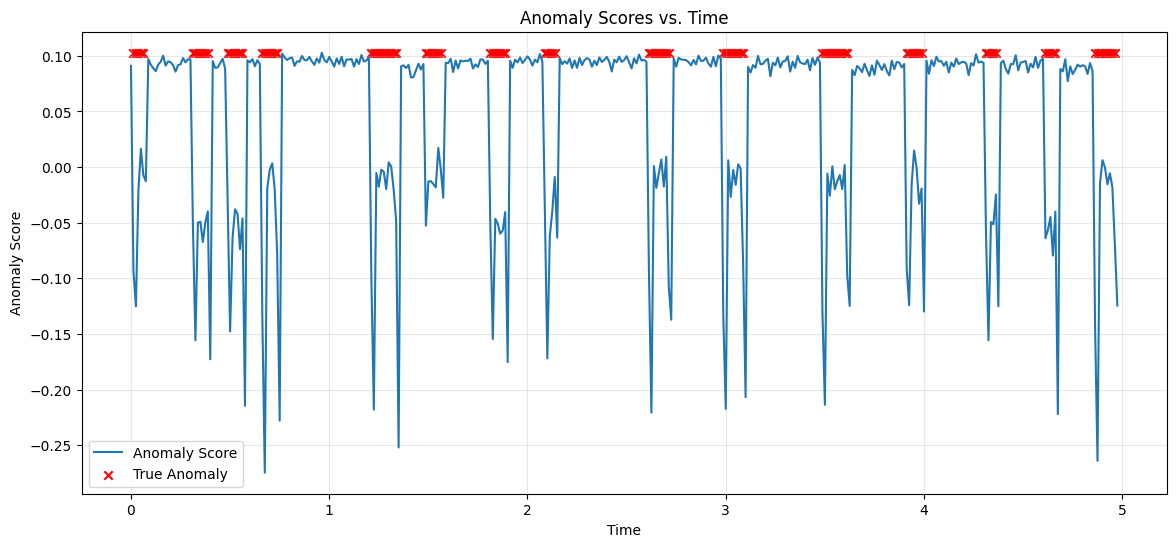

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(feature_df['start_time'], if_model.decision_function(X_pca), label='Anomaly Score')

# Ensure sum(y) is an integer for the number of markers
num_anomalies = int(sum(y))  # Convert float to integer

plt.scatter(
    feature_df['start_time'][y == 1],
    np.max(if_model.decision_function(X_pca)) * np.ones(num_anomalies),
    color='red', marker='x', label='True Anomaly'
)

plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores vs. Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**One-Class SVM**

In [ ]:
# Estimate anomaly fraction in the training set
nu = y_train.mean() + 0.01  # Small buffer for unseen anomalies
nu = np.clip(nu, 0.01, 0.5)  # Ensure nu is within valid range [0.01, 0.5]

# Initialize and train One-Class SVM
svm_model = OneClassSVM(
    kernel='rbf',       # Default kernel for non-linear boundaries
    gamma='scale',      # Automatically adjust gamma based on data variance
    nu=nu,              # Expected fraction of outliers (~contamination)
)
svm_model.fit(X_train)

OneClassSVM(nu=np.float64(0.2752329749103943))

In [ ]:
# Predict on test data (-1 = anomaly, 1 = normal)
svm_test_preds = svm_model.predict(X_test)

# Convert predictions to binary labels (1 = anomaly, 0 = normal)
svm_y_pred = np.where(svm_test_preds == -1, 1, 0)

# Evaluate performance
from sklearn.metrics import classification_report, f1_score
print("Classification Report:")
print(classification_report(y_test, svm_y_pred))
print(f"F1 Score: {f1_score(y_test, svm_y_pred):.3f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95        83
         1.0       0.87      0.89      0.88        37

    accuracy                           0.93       120
   macro avg       0.91      0.92      0.91       120
weighted avg       0.93      0.93      0.93       120

F1 Score: 0.880


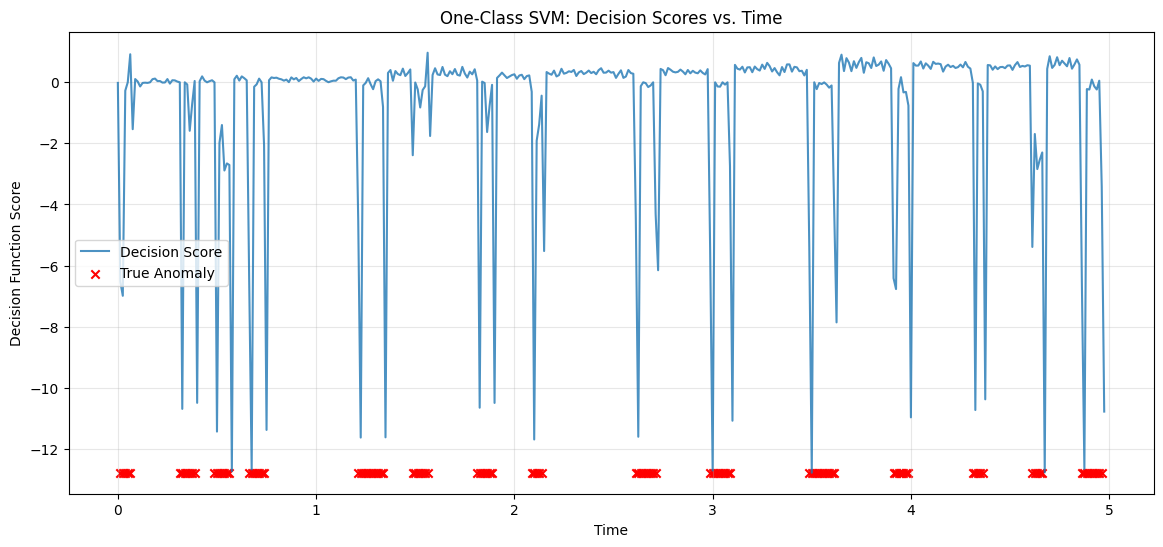

In [ ]:
# Get decision scores (lower scores = more anomalous)
decision_scores = svm_model.decision_function(X_pca)

plt.figure(figsize=(14, 6))
plt.plot(feature_df['start_time'], decision_scores, label='Decision Score', alpha=0.8)
plt.scatter(
    feature_df['start_time'][y == 1],
    np.min(decision_scores) * np.ones(int(sum(y))),  # Highlight true anomalies
    color='red', marker='x', label='True Anomaly'
)
plt.xlabel('Time')
plt.ylabel('Decision Function Score')
plt.title('One-Class SVM: Decision Scores vs. Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Guaussian Mixture Model**

In [ ]:
# --------------------------------------------------------
# Step 1: Train GMM on training data (including anomalies)
# --------------------------------------------------------
# Choose number of components
n_components = 5  # Start with a reasonable guess; tune later

gmm_model = GaussianMixture(
    n_components=n_components,
    covariance_type='full',  # Capture complex correlations
    random_state=42
)
gmm_model.fit(X_train)  # Fit to training data

# --------------------------------------------------------
# Step 2: Compute log-likelihoods for anomaly scoring
# --------------------------------------------------------
# Calculate log-likelihood for all windows (lower = more anomalous)
gmm_train_log_likelihood = gmm_model.score_samples(X_train)
gmm_test_log_likelihood = gmm_model.score_samples(X_test)

# Combine train and test scores for visualization
gmm_full_log_likelihood = np.concatenate([gmm_train_log_likelihood, gmm_test_log_likelihood])

# --------------------------------------------------------
# Step 3: Determine threshold based on training data
# --------------------------------------------------------
# Use contamination rate from training labels to set threshold
gmm_contamination = y_train.mean()
threshold = np.percentile(gmm_train_log_likelihood, 100 * gmm_contamination)

In [ ]:
# Predict anomalies (1 = anomaly, 0 = normal)
gmm_y_pred = (gmm_full_log_likelihood < threshold).astype(int)
gmm_y_pred_test = gmm_y_pred[split_idx:]  # Test set predictions

# --------------------------------------------------------
# Step 4: Evaluate performance on test set
# --------------------------------------------------------
print("GMM Classification Report:")
print(classification_report(y_test, gmm_y_pred_test))

GMM Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94        83
         1.0       0.85      0.92      0.88        37

    accuracy                           0.93       120
   macro avg       0.91      0.92      0.91       120
weighted avg       0.93      0.93      0.93       120



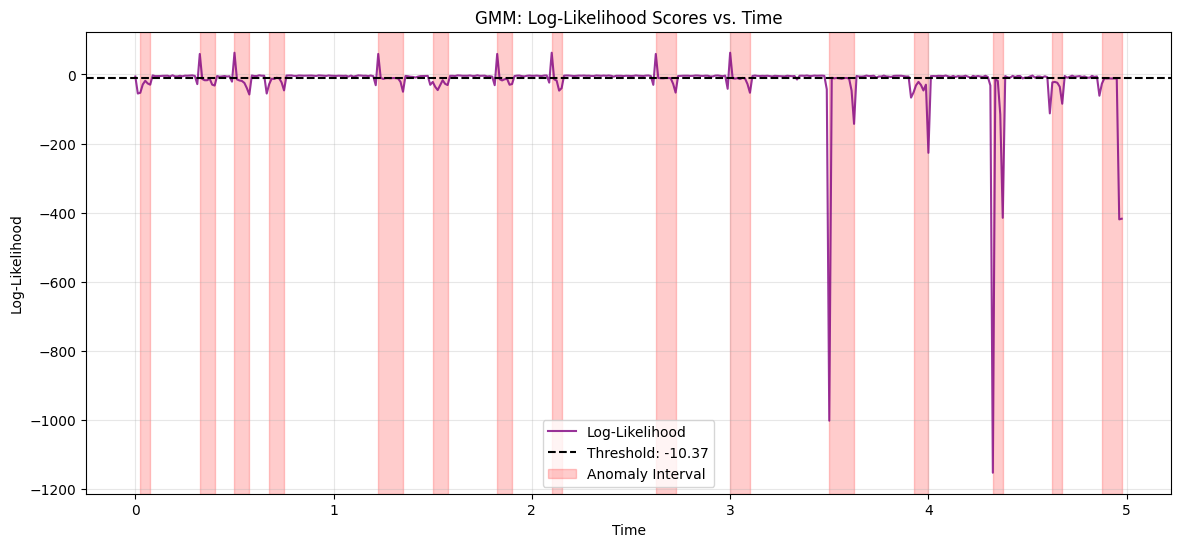

In [ ]:
# --------------------------------------------------------
# Step 5: Visualize log-likelihoods and anomalies
# --------------------------------------------------------
plt.figure(figsize=(14, 6))
plt.plot(feature_df['start_time'], gmm_full_log_likelihood,
         label='Log-Likelihood', color='purple', alpha=0.8)
plt.axhline(threshold, color='black', linestyle='--',
            label=f'Threshold: {threshold:.2f}')

# Plot anomaly intervals
for i, interval in enumerate(anomaly_intervals):
    plt.axvspan(interval[0], interval[1],
                color='red', alpha=0.2,
                label='Anomaly Interval' if i == 0 else None)

plt.xlabel('Time')
plt.ylabel('Log-Likelihood')
plt.title('GMM: Log-Likelihood Scores vs. Time')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**LSTM auto-encoder**

In [ ]:
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# -----------------------------------------------------------------
# Step 1: Preprocess Data (Ensure no NaNs)
# -----------------------------------------------------------------
raw_signals = data[['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']].values

# Normalize and check for NaNs
scaler = StandardScaler()
scaled_signals = scaler.fit_transform(raw_signals)
assert not np.isnan(scaled_signals).any(), "NaNs detected in input!"

import joblib
joblib.dump(scaler, 'scaler.save')

# Create sequences (shorter sequence length)
sequence_length = 50  # Reduced from 100
X_sequences = []
for i in range(len(scaled_signals) - sequence_length + 1):
    X_sequences.append(scaled_signals[i:i+sequence_length])
X_sequences = np.array(X_sequences)

# Time-based split
split_idx = int(0.7 * len(X_sequences))
X_train, X_test = X_sequences[:split_idx], X_sequences[split_idx:]

In [ ]:
# -----------------------------------------------------------------
# Step 2: Simplified Model Architecture
# -----------------------------------------------------------------
input_dim = X_train.shape[2]
timesteps = X_train.shape[1]

# Encoder
inputs = Input(shape=(timesteps, input_dim))
x = Bidirectional(LSTM(32, activation='tanh', return_sequences=True))(inputs)
x = Bidirectional(LSTM(16, activation='tanh', return_sequences=False))(x)

# Bottleneck
x = RepeatVector(timesteps)(x)

# Decoder
x = Bidirectional(LSTM(16, activation='tanh', return_sequences=True))(x)
x = Bidirectional(LSTM(32, activation='tanh', return_sequences=True))(x)
outputs = TimeDistributed(Dense(input_dim))(x)

autoencoder = Model(inputs, outputs)

# Optimizer with gradient clipping
optimizer = Adam(learning_rate=1e-4, clipvalue=1.0)
autoencoder.compile(optimizer=optimizer, loss='mse')

In [ ]:
# -----------------------------------------------------------------
# Step 3: Train with Early Stopping
# -----------------------------------------------------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_test, X_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 148s 480ms/step - loss: 0.6852 - val_loss: 0.1891
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 136s 459ms/step - loss: 0.1274 - val_loss: 0.0645
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 114s 416ms/step - loss: 0.0542 - val_loss: 0.0428
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 125s 456ms/step - loss: 0.0387 - val_loss: 0.0340
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 142s 454ms/step - loss: 0.0310 - val_loss: 0.0281
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 124s 454ms/step - loss: 0.0253 - val_loss: 0.0233
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 142s 455ms/step - loss: 0.0205 - val_loss: 0.0194
Epoch 8/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 140s 447ms/step - loss: 0.0169 - val_loss: 0.0166
Epoch 9/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 144s 457ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 10/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 140s 451ms/step - loss: 0.0124 - val_loss: 0.0127
Epoch 11/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 141s 449ms/step - loss: 0.0110 - val_loss: 0.0115
Epoch 12

3124/3124 ━━━━━━━━━━━━━━━━━━━━ 105s 34ms/step


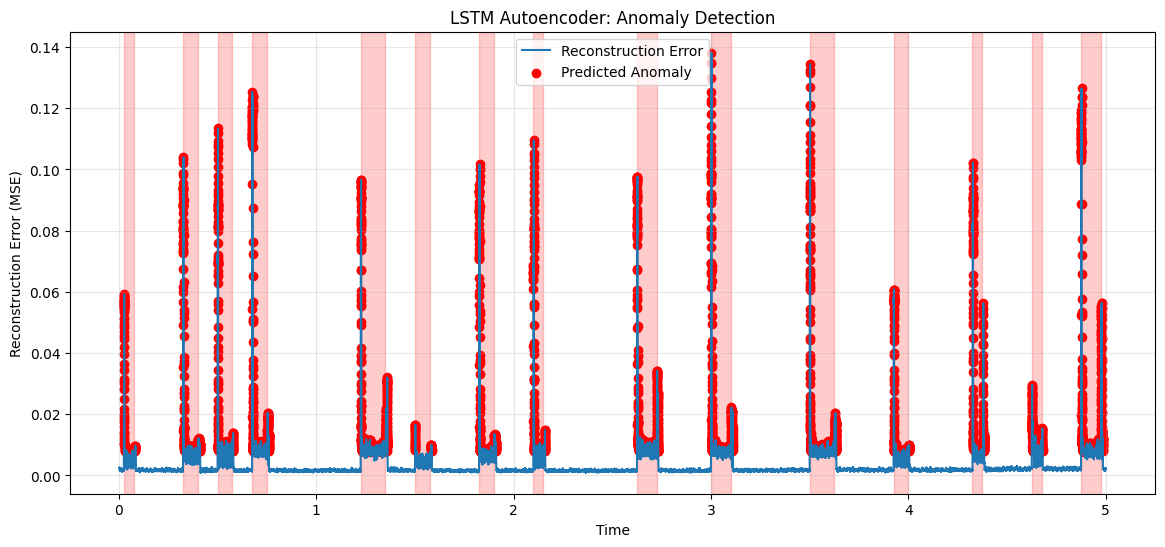

In [ ]:
# Get the time values corresponding to the END of each window
time_sequences = data['Time'].values[sequence_length - 1 :]  # Shape: (len(mse),)

# Calculate reconstruction error for each sequence
reconstructions = autoencoder.predict(X_sequences)
mse = np.mean(np.square(X_sequences - reconstructions), axis=(1, 2))

# Label anomalies (e.g., top 10% MSE)
threshold = np.percentile(mse, 90)
anomalies = mse > threshold

plt.figure(figsize=(14, 6))

# Plot reconstruction error (aligned with window end times)
plt.plot(time_sequences, mse, label='Reconstruction Error')

# Highlight predicted anomalies (use time_sequences instead of data['Time'])
plt.scatter(
    time_sequences[anomalies],  # Correct indexing
    mse[anomalies],
    color='red', label='Predicted Anomaly'
)

# Add ground truth anomaly intervals (as shaded regions)
for interval in anomaly_intervals:
    plt.axvspan(interval[0], interval[1], color='red', alpha=0.2)

plt.xlabel('Time')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('LSTM Autoencoder: Anomaly Detection')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Save the trained model
model_save_path = "lstm_autoencoder_anomaly_detection.h5"
tf.keras.models.save_model(autoencoder, model_save_path)

Test other models

In [ ]:
# Preprocessing

signals = ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[signals])

import joblib
joblib.dump(scaler, 'scaler2.save')

# Create sequences
sequence_length = 50  # Same as LSTM model
X = []
for i in range(len(scaled_data) - sequence_length + 1):
    X.append(scaled_data[i:i+sequence_length])
X = np.array(X)

# Time-based split
split_idx = int(0.7 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]

RNN Model

In [ ]:
def build_rnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, activation='tanh',
                                return_sequences=True,
                                input_shape=(sequence_length, len(signals))),
        tf.keras.layers.Dropout(0.3),  # Added dropout
        tf.keras.layers.SimpleRNN(32, activation='tanh'),
        tf.keras.layers.Dropout(0.3),  # Added dropout
        tf.keras.layers.RepeatVector(sequence_length),
        tf.keras.layers.SimpleRNN(32, activation='tanh',
                                return_sequences=True),
        tf.keras.layers.Dropout(0.3),  # Added dropout
        tf.keras.layers.SimpleRNN(64, activation='tanh',
                                return_sequences=True),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(len(signals)))
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='mse')
    return model

rnn_model = build_rnn_model()

# Enhanced early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Increased from 3 to 5
    verbose=1,
    restore_best_weights=True  # Critical addition
)

rnn_history = rnn_model.fit(
    X_train, X_train,
    epochs=50,  # Increased max epochs
    batch_size=256,  # Larger batch size
    validation_data=(X_test, X_test),
    callbacks=[early_stop]
)

# Save the trained model
model_save_path = "rnn_autoencoder_anomaly_detection.h5"
tf.keras.models.save_model(rnn_model, model_save_path)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 124s 289ms/step - loss: 0.3843 - val_loss: 0.0756
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 65s 228ms/step - loss: 0.1080 - val_loss: 0.0637
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 82s 227ms/step - loss: 0.0821 - val_loss: 0.0447
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 82s 227ms/step - loss: 0.0682 - val_loss: 0.0300
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 80s 220ms/step - loss: 0.0579 - val_loss: 0.0275
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 70s 257ms/step - loss: 0.0648 - val_loss: 0.0363
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 73s 265ms/step - loss: 0.0616 - val_loss: 0.0341
Epoch 8/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 70s 224ms/step - loss: 0.0601 - val_loss: 0.0490
Epoch 9/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 89s 249ms/step - loss: 0.0599 - val_loss: 0.0278
Epoch 10/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 60s 220ms/step - loss: 0.0666 - val_loss: 0.0380
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 5.


1D CNN Model

In [ ]:
def build_cnn_model():
    model = tf.keras.Sequential([
        # Encoder
        tf.keras.layers.Conv1D(64, 5, activation='relu',  # Increased filters
                              padding='same',
                              input_shape=(sequence_length, len(signals))),
        tf.keras.layers.Dropout(0.3),  # Added dropout
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same'),  # Increased filters
        tf.keras.layers.Dropout(0.3),  # Added dropout

        # Decoder
        tf.keras.layers.UpSampling1D(2),
        tf.keras.layers.Conv1D(64, 3, activation='relu', padding='same'),  # Increased filters
        tf.keras.layers.Dropout(0.3),  # Added dropout
        tf.keras.layers.Conv1D(len(signals), 5, activation='linear', padding='same')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='mse')
    return model

cnn_model = build_cnn_model()

# Shared early stopping configuration
cnn_history = cnn_model.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_test, X_test),
    callbacks=[early_stop]  # Same early stopping config
)

# Save the model
model_save_path = "cnn_autoencoder_anomaly_detection.h5"
tf.keras.models.save_model(cnn_model, model_save_path)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 29s 96ms/step - loss: 0.2672 - val_loss: 0.0550
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - loss: 0.0573 - val_loss: 0.0395
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 26s 95ms/step - loss: 0.0451 - val_loss: 0.0293
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - loss: 0.0393 - val_loss: 0.0247
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - loss: 0.0358 - val_loss: 0.0211
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - loss: 0.0335 - val_loss: 0.0171
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - loss: 0.0318 - val_loss: 0.0152
Epoch 8/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - loss: 0.0306 - val_loss: 0.0123
Epoch 9/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - loss: 0.0295 - val_loss: 0.0132
Epoch 10/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - loss: 0.0287 - val_loss: 0.0114
Epoch 11/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 27s 98ms/step - loss: 0.0282 - val_loss: 0.0112
Epoch 12/50
274/274 ━━━━━━━━━━

3124/3124 ━━━━━━━━━━━━━━━━━━━━ 125s 40ms/step
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 52s 17ms/step
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step

Model Comparison:
  model_name  train_loss  val_loss  num_anomalies
0       LSTM    0.003569  0.004157           4998
1        RNN    0.027014  0.027543           4998
2        CNN    0.007065  0.007627           4998


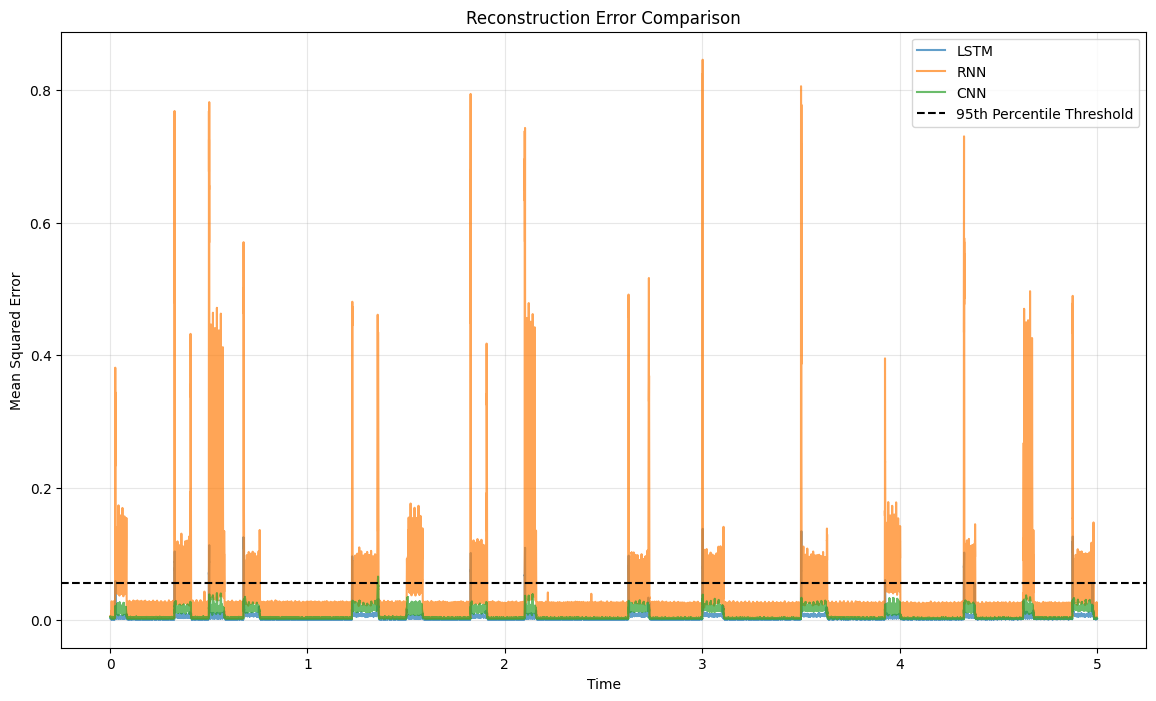

In [ ]:
# 1. Load LSTM model
lstm_model = tf.keras.models.load_model(
    '/content/lstm_autoencoder_anomaly_detection.h5',
    custom_objects={'mse': 'mse'}
)

# 2. Calculate metrics for all three models
def calculate_metrics(model, model_name, X_train, X_test, X_full):
    # Get reconstruction errors
    reconstructions = model.predict(X_full)
    mse = np.mean(np.square(X_full - reconstructions), axis=(1,2))

    # Anomaly detection
    threshold = np.percentile(mse, 95)
    anomalies = mse > threshold

    # Training and validation loss
    train_loss = model.evaluate(X_train, X_train, verbose=0)
    val_loss = model.evaluate(X_test, X_test, verbose=0)

    return {
        'model_name': model_name,
        'train_loss': train_loss,
        'val_loss': val_loss,
        'num_anomalies': sum(anomalies),
        'reconstructions': reconstructions,
        'mse': mse
    }

# Calculate metrics for all models
lstm_metrics = calculate_metrics(lstm_model, "LSTM", X_train, X_test, X)
rnn_metrics = calculate_metrics(rnn_model, "RNN", X_train, X_test, X)
cnn_metrics = calculate_metrics(cnn_model, "CNN", X_train, X_test, X)

# 3. Create comparison table
comparison_df = pd.DataFrame([lstm_metrics, rnn_metrics, cnn_metrics])
print("\nModel Comparison:")
print(comparison_df[['model_name', 'train_loss', 'val_loss', 'num_anomalies']])

# 4. Visualize all reconstruction errors
plt.figure(figsize=(14, 8))
time_sequences = data['Time'].values[sequence_length-1:]

# Plot MSE for all models
plt.plot(time_sequences, lstm_metrics['mse'], label='LSTM', alpha=0.7)
plt.plot(time_sequences, rnn_metrics['mse'], label='RNN', alpha=0.7)
plt.plot(time_sequences, cnn_metrics['mse'], label='CNN', alpha=0.7)

# Add common threshold line
common_threshold = np.percentile(np.concatenate([lstm_metrics['mse'],
                                                rnn_metrics['mse'],
                                                cnn_metrics['mse']]), 95)
plt.axhline(common_threshold, color='black', linestyle='--', label='95th Percentile Threshold')

plt.title('Reconstruction Error Comparison')
plt.ylabel('Mean Squared Error')
plt.xlabel('Time')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import joblib
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')

In [ ]:
# Define fault intervals
fault_intervals = {
    'LG': [[0.025, 0.075], [1.500, 1.575], [3.925, 4.000]],
    'LLG': [[0.325, 0.4], [1.825, 1.900], [4.325, 4.375]],
    'LL': [[0.500, 0.575], [2.100, 2.150], [4.625, 4.675]],
    'LLL': [[0.675, 0.750], [2.625, 2.725], [3.000, 3.100]],
    'LLLG': [[1.225, 1.350], [3.500, 3.625], [4.875, 4.975]]
}

def extract_features(data, interval):
    """Extract features from raw data for a given time interval."""
    start_idx = np.searchsorted(data['Time'], interval[0])
    end_idx = np.searchsorted(data['Time'], interval[1])
    window = data.iloc[start_idx:end_idx]

    if len(window) == 0:
        return None

    features = {
        'duration': interval[1] - interval[0]
    }

    # Signal features
    for signal in ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']:
        if signal in window.columns:
            sig_data = window[signal].values
            if len(sig_data) > 1:
                features.update({
                    f'{signal}_mean': np.mean(sig_data),
                    f'{signal}_std': np.std(sig_data),
                    f'{signal}_skew': skew(sig_data),
                    f'{signal}_kurt': kurtosis(sig_data),
                    f'{signal}_rms': np.sqrt(np.mean(sig_data ** 2)),
                    f'{signal}_peak2peak': np.ptp(sig_data),
                    f'{signal}_crest': np.max(np.abs(sig_data)) / (np.sqrt(np.mean(sig_data ** 2)) + 1e-9)
                })

    # Cross-signal correlations
    try:
        if len(window) > 1:
            corr_VaVb = np.corrcoef(window['Va'], window['Vb'])[0,1]
            corr_VbVc = np.corrcoef(window['Vb'], window['Vc'])[0,1]
            corr_VaIa = np.corrcoef(window['Va'], window['Ia'])[0,1]

            features.update({
                'corr_VaVb': corr_VaVb if not np.isnan(corr_VaVb) else 0,
                'corr_VbVc': corr_VbVc if not np.isnan(corr_VbVc) else 0,
                'corr_VaIa': corr_VaIa if not np.isnan(corr_VaIa) else 0
            })
    except:
        features.update({'corr_VaVb': 0, 'corr_VbVc': 0, 'corr_VaIa': 0})

    return features

print("Ground truth intervals and feature extraction function defined!")
for fault_type, intervals in fault_intervals.items():
    print(f"{fault_type}: {len(intervals)} intervals")

Ground truth intervals and feature extraction function defined!
LG: 3 intervals
LLG: 3 intervals
LL: 3 intervals
LLL: 3 intervals
LLLG: 3 intervals


In [ ]:
# Load data
data = pd.read_csv("/content/simData.csv")

# Ensure Time column exists
if 'time' in data.columns:
    data.rename(columns={'time': 'Time'}, inplace=True)

print(f"Data loaded: {data.shape}")
print(f"Columns: {data.columns.tolist()}")
print(f"Time range: {data['Time'].min():.3f} to {data['Time'].max():.3f}")

# Extract features for all fault intervals
print("\nExtracting features from fault intervals...")
features_list = []
labels = []

for fault_type, intervals in fault_intervals.items():
    print(f"\nProcessing {fault_type}:")
    for i, interval in enumerate(intervals):
        print(f"  Interval {i+1}: [{interval[0]:.3f}, {interval[1]:.3f}]", end=" -> ")
        features = extract_features(data, interval)
        if features is not None:
            features_list.append(features)
            labels.append(fault_type)
            print(f"✓ {len(features)} features extracted")
        else:
            print("✗ No data found")

# Convert to DataFrame
X_original = pd.DataFrame(features_list)
y_original = pd.Series(labels)

print(f"\nOriginal dataset:")
print(f"Features shape: {X_original.shape}")
print(f"Labels distribution:\n{y_original.value_counts()}")
print(f"Feature names: {list(X_original.columns[:10])}...") # Show first 10

# Handle missing values
X_original = X_original.fillna(X_original.mean())

Data loaded: (100001, 7)
Columns: ['Time', 'Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']
Time range: 0.000 to 5.000

Extracting features from fault intervals...

Processing LG:
  Interval 1: [0.025, 0.075] -> ✓ 46 features extracted
  Interval 2: [1.500, 1.575] -> ✓ 46 features extracted
  Interval 3: [3.925, 4.000] -> ✓ 46 features extracted

Processing LLG:
  Interval 1: [0.325, 0.400] -> ✓ 46 features extracted
  Interval 2: [1.825, 1.900] -> ✓ 46 features extracted
  Interval 3: [4.325, 4.375] -> ✓ 46 features extracted

Processing LL:
  Interval 1: [0.500, 0.575] -> ✓ 46 features extracted
  Interval 2: [2.100, 2.150] -> ✓ 46 features extracted
  Interval 3: [4.625, 4.675] -> ✓ 46 features extracted

Processing LLL:
  Interval 1: [0.675, 0.750] -> ✓ 46 features extracted
  Interval 2: [2.625, 2.725] -> ✓ 46 features extracted
  Interval 3: [3.000, 3.100] -> ✓ 46 features extracted

Processing LLLG:
  Interval 1: [1.225, 1.350] -> ✓ 46 features extracted
  Interval 2: [3.500, 3.625] -> ✓ 46 

Original data shape: (15, 46)

Augmenting LG (3 samples):
  5/20 augmentations complete (Extreme scaling + noise)
  10/20 augmentations complete (Feature dropout + noise)
  15/20 augmentations complete (High correlation noise)
  20/20 augmentations complete (Mixed extreme perturbations)

Augmenting LLG (3 samples):
  5/20 augmentations complete (Extreme scaling + noise)
  10/20 augmentations complete (Feature dropout + noise)
  15/20 augmentations complete (High correlation noise)
  20/20 augmentations complete (Mixed extreme perturbations)

Augmenting LL (3 samples):
  5/20 augmentations complete (Extreme scaling + noise)
  10/20 augmentations complete (Feature dropout + noise)
  15/20 augmentations complete (High correlation noise)
  20/20 augmentations complete (Mixed extreme perturbations)

Augmenting LLL (3 samples):
  5/20 augmentations complete (Extreme scaling + noise)
  10/20 augmentations complete (Feature dropout + noise)
  15/20 augmentations complete (High correlation nois

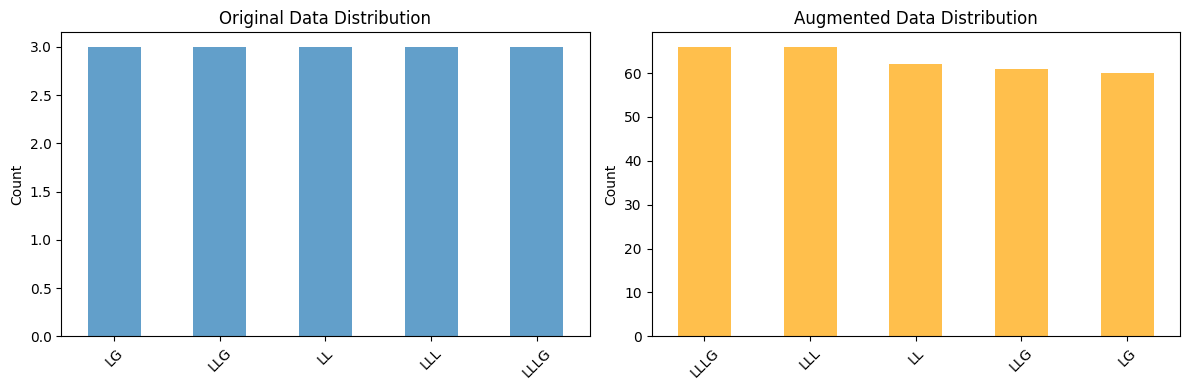

In [ ]:
def augment_data_realistic(X, y, augmentation_factor=25):

    print(f"Original data shape: {X.shape}")

    X_augmented = []
    y_augmented = []

    # Keep original data
    X_augmented.append(X)
    y_augmented.append(y)

    # For each fault type, create variations
    for fault_type in y.unique():
        fault_indices = y[y == fault_type].index
        fault_data = X.loc[fault_indices]

        print(f"\nAugmenting {fault_type} ({len(fault_data)} samples):")

        for aug_round in range(augmentation_factor):
            # Method 1: High Gaussian noise (15-35% of feature std)
            if aug_round < augmentation_factor // 5:
                noise_factor = np.random.uniform(0.15, 0.35)
                noise = np.random.normal(0, fault_data.std() * noise_factor, fault_data.shape)
                augmented_samples = fault_data + noise
                method = f"High Gaussian noise ({noise_factor:.2f})"

            # Method 2: Extreme feature scaling with heavy noise (±30-60%)
            elif aug_round < 2 * augmentation_factor // 5:
                scale_factors = np.random.uniform(0.4, 1.6, fault_data.shape)
                noise = np.random.normal(0, fault_data.std() * 0.25, fault_data.shape)
                augmented_samples = fault_data * scale_factors + noise
                method = "Extreme scaling + noise"

            # Method 3: Feature dropout with noise (randomly zero out features)
            elif aug_round < 3 * augmentation_factor // 5:
                dropout_mask = np.random.binomial(1, 0.8, fault_data.shape)  # 20% dropout
                noise_factor = np.random.uniform(0.2, 0.4)
                noise = np.random.normal(0, fault_data.std() * noise_factor, fault_data.shape)
                augmented_samples = fault_data * dropout_mask + noise
                method = "Feature dropout + noise"

            # Method 4: Correlation-based perturbations with high variance
            elif aug_round < 4 * augmentation_factor // 5:
                permutation_strength = np.random.uniform(0.3, 0.6)
                noise = np.random.normal(0, fault_data.std() * permutation_strength, fault_data.shape)

                # Add high-variance correlation-based perturbations
                try:
                    correlation_noise = np.random.multivariate_normal(
                        np.zeros(fault_data.shape[1]),
                        np.cov(fault_data.T) * 0.3,  # Increased from 0.1 to 0.3
                        size=len(fault_data)
                    )
                except np.linalg.LinAlgError:
                    # Fallback if covariance matrix is singular
                    correlation_noise = np.random.normal(0, fault_data.std() * 0.2, fault_data.shape)

                augmented_samples = fault_data + noise + correlation_noise
                method = "High correlation noise"

            # Method 5: Mixed random perturbations (most challenging)
            else:
                # Combine multiple noise sources
                gaussian_noise = np.random.normal(0, fault_data.std() * 0.3, fault_data.shape)
                uniform_noise = np.random.uniform(-fault_data.std() * 0.2,
                                                fault_data.std() * 0.2, fault_data.shape)

                # Random feature swapping between samples
                if len(fault_data) > 1:
                    swap_indices = np.random.permutation(len(fault_data))
                    feature_swap_mask = np.random.binomial(1, 0.1, fault_data.shape)  # 10% feature swap
                    swapped_features = fault_data.values[swap_indices] * feature_swap_mask
                    original_features = fault_data.values * (1 - feature_swap_mask)
                    augmented_samples = pd.DataFrame(
                        original_features + swapped_features + gaussian_noise + uniform_noise,
                        columns=fault_data.columns
                    )
                else:
                    augmented_samples = fault_data + gaussian_noise + uniform_noise

                method = "Mixed extreme perturbations"

            X_augmented.append(augmented_samples)
            y_augmented.append(pd.Series([fault_type] * len(fault_data)))

            if (aug_round + 1) % 5 == 0:
                print(f"  {aug_round + 1}/{augmentation_factor} augmentations complete ({method})")

    # Combine all data
    X_final = pd.concat(X_augmented, ignore_index=True)
    y_final = pd.concat(y_augmented, ignore_index=True)

    # Add some label noise (swap 2-3% of labels randomly)
    print(f"\nAdding label noise...")
    n_label_swaps = int(0.025 * len(y_final))  # 2.5% label noise
    swap_indices = np.random.choice(len(y_final), n_label_swaps, replace=False)
    available_labels = y_final.unique()

    for idx in swap_indices:
        current_label = y_final.iloc[idx]
        possible_labels = [label for label in available_labels if label != current_label]
        y_final.iloc[idx] = np.random.choice(possible_labels)

    print(f"Swapped {n_label_swaps} labels randomly")

    print(f"\nAugmentation complete!")
    print(f"Final data shape: {X_final.shape}")
    print(f"Final labels distribution:\n{y_final.value_counts()}")

    # Show some statistics about the noise added
    print(f"\nNoise statistics:")
    print(f"Original data std: {X.std().mean():.4f}")
    print(f"Augmented data std: {X_final.std().mean():.4f}")
    print(f"Noise amplification factor: {X_final.std().mean() / X.std().mean():.2f}x")

    return X_final, y_final

# Apply heavy augmentation
X_augmented, y_augmented = augment_data_realistic(X_original, y_original, augmentation_factor=20)

# Visualization of augmentation effect
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
y_original.value_counts().plot(kind='bar', alpha=0.7)
plt.title('Original Data Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
y_augmented.value_counts().plot(kind='bar', alpha=0.7, color='orange')
plt.title('Augmented Data Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_augmented)
class_names = le.classes_

print(f"Class encoding:")
for i, class_name in enumerate(class_names):
    print(f"  {class_name} -> {i}")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_augmented)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

print(f"\nTrain/Test split:")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training labels distribution: {np.bincount(y_train)}")
print(f"Test labels distribution: {np.bincount(y_test)}")

Class encoding:
  LG -> 0
  LL -> 1
  LLG -> 2
  LLL -> 3
  LLLG -> 4

Data scaling complete:
Feature means (should be ~0): [-1.12784561e-16  6.76707367e-17 -1.12784561e-16  4.51138245e-17
  9.02276490e-17]
Feature stds (should be ~1): [1. 1. 1. 1. 1.]

Train/Test split:
Training set: (236, 46)
Test set: (79, 46)
Training labels distribution: [45 47 46 49 49]
Test labels distribution: [15 15 15 17 17]


In [ ]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=6),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42, max_depth=15),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42, probability=True, C=1.0),
    'SVM (Linear)': SVC(kernel='linear', random_state=42, probability=True, C=1.0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=7),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, C=1.0),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=12)
}

print("Training models...")
print("=" * 60)

trained_models = {}
training_scores = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    print("-" * 40)

    # Train model
    model.fit(X_train, y_train)

    # Training accuracy
    train_accuracy = model.score(X_train, y_train)

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Store results
    trained_models[name] = model
    training_scores[name] = {
        'train_accuracy': train_accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'cv_scores': cv_scores
    }

    print(f"  Training Accuracy: {train_accuracy:.4f}")
    print(f"  CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"  CV Scores: {cv_scores}")

Training models...

Training Random Forest...
----------------------------------------
  Training Accuracy: 1.0000
  CV Accuracy: 0.9575 ± 0.0381
  CV Scores: [0.97916667 0.93617021 0.9787234  0.89361702 1.        ]
  Trees/Estimators: 100

Training Gradient Boosting...
----------------------------------------
  Training Accuracy: 1.0000
  CV Accuracy: 0.8730 ± 0.0483
  CV Scores: [0.85416667 0.91489362 0.89361702 0.78723404 0.91489362]
  Trees/Estimators: 100

Training Extra Trees...
----------------------------------------
  Training Accuracy: 1.0000
  CV Accuracy: 0.9660 ± 0.0346
  CV Scores: [0.97916667 0.93617021 1.         0.91489362 1.        ]
  Trees/Estimators: 100

Training SVM (RBF)...
----------------------------------------
  Training Accuracy: 0.9576
  CV Accuracy: 0.9152 ± 0.0382
  CV Scores: [0.9375     0.89361702 0.89361702 0.87234043 0.9787234 ]

Training SVM (Linear)...
----------------------------------------
  Training Accuracy: 0.9873
  CV Accuracy: 0.9027 ± 0.02

Random Forest        | Acc: 0.9620 | F1: 0.9624
Gradient Boosting    | Acc: 0.8101 | F1: 0.8125
Extra Trees          | Acc: 0.9367 | F1: 0.9367
SVM (RBF)            | Acc: 0.8481 | F1: 0.8433
SVM (Linear)         | Acc: 0.8354 | F1: 0.8342
K-Nearest Neighbors  | Acc: 0.9114 | F1: 0.9110
Naive Bayes          | Acc: 0.8354 | F1: 0.8335
Logistic Regression  | Acc: 0.8228 | F1: 0.8224
Decision Tree        | Acc: 0.8228 | F1: 0.8255



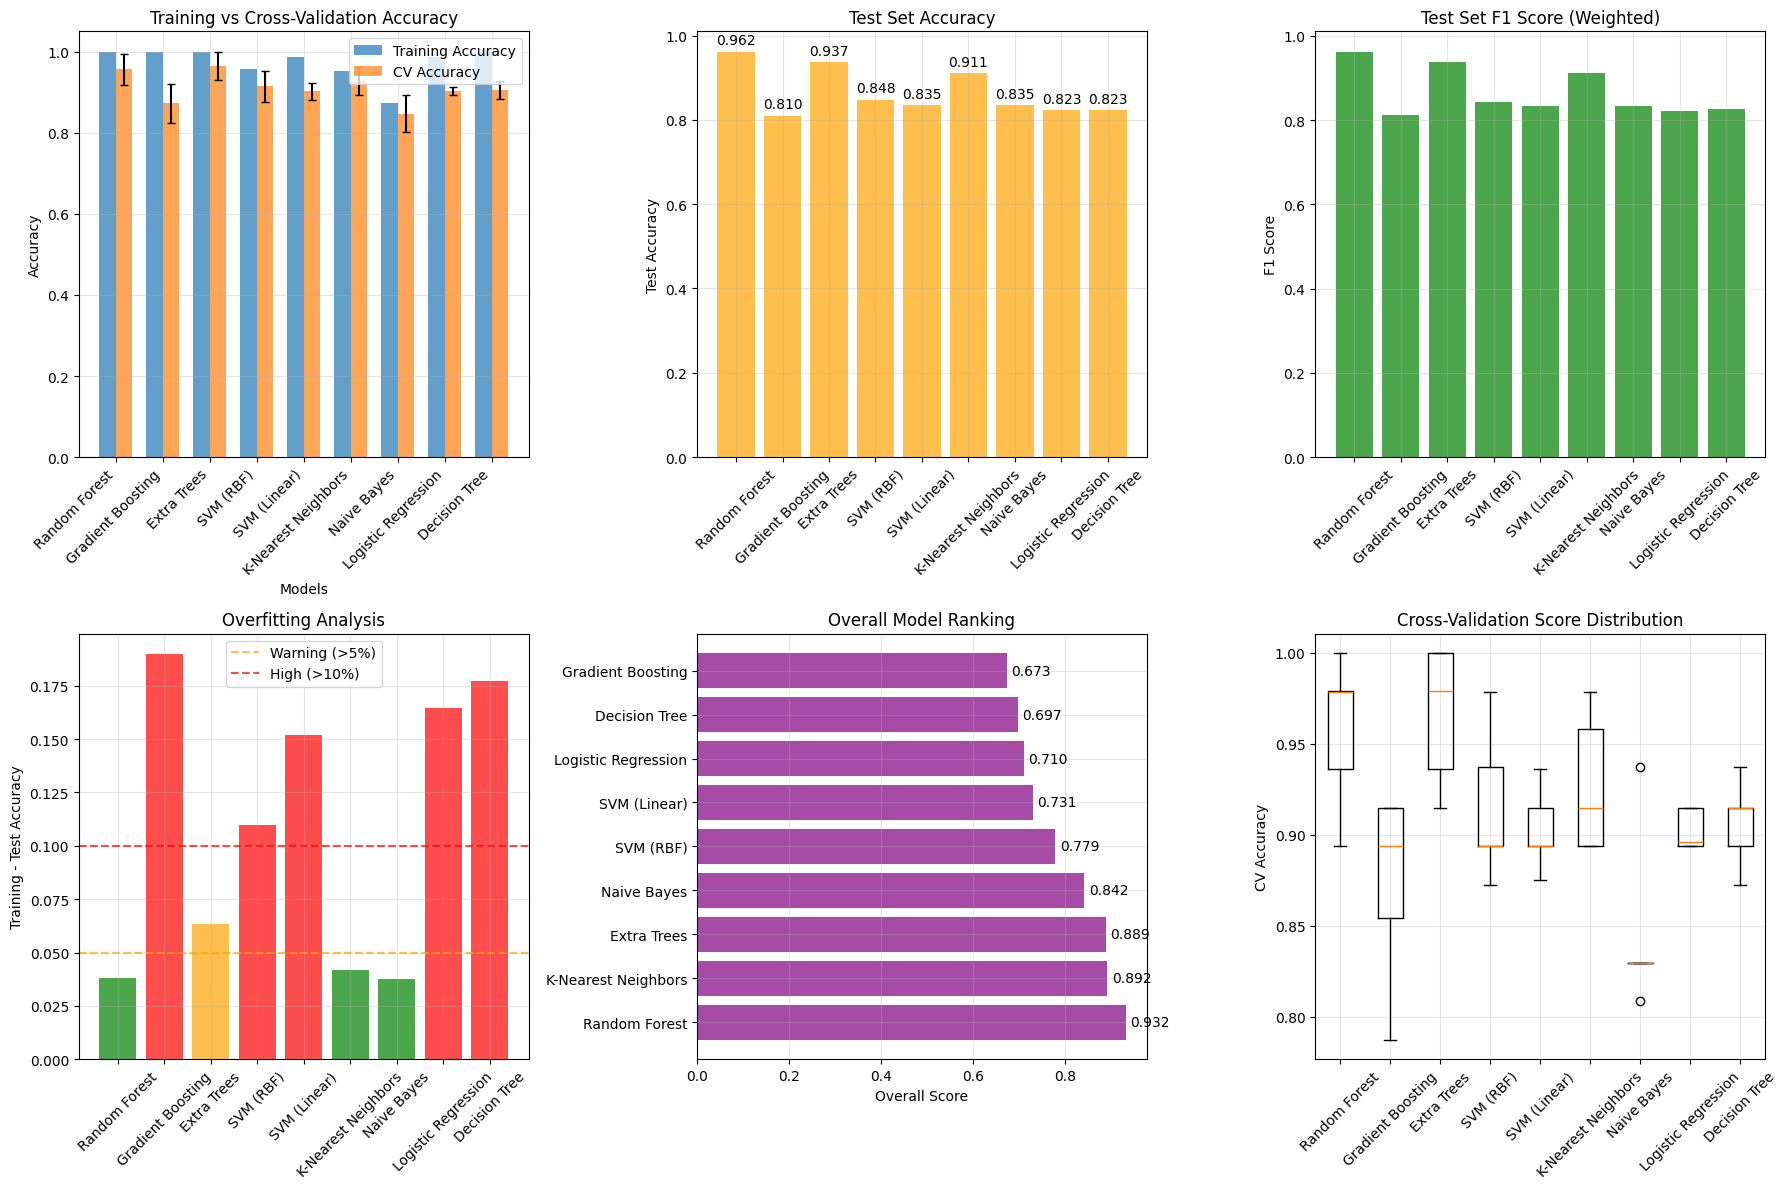


FINAL MODEL RANKING:
 1. Random Forest        | Score: 0.9317
 2. K-Nearest Neighbors  | Score: 0.8924
 3. Extra Trees          | Score: 0.8889
 4. Naive Bayes          | Score: 0.8422
 5. SVM (RBF)            | Score: 0.7789
 6. SVM (Linear)         | Score: 0.7305
 7. Logistic Regression  | Score: 0.7103
 8. Decision Tree        | Score: 0.6973
 9. Gradient Boosting    | Score: 0.6731

 BEST MODEL: Random Forest


In [ ]:
test_results = {}

for name, model in trained_models.items():
    # Test predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    test_results[name] = {
        'accuracy': test_accuracy,
        'f1_score': test_f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"{name:20} | Acc: {test_accuracy:.4f} | F1: {test_f1:.4f}")

print("\n" + "=" * 70)

# Create comprehensive comparison visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Training vs CV Accuracy
model_names = list(training_scores.keys())
train_accs = [training_scores[name]['train_accuracy'] for name in model_names]
cv_means = [training_scores[name]['cv_mean'] for name in model_names]
cv_stds = [training_scores[name]['cv_std'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0, 0].bar(x - width/2, train_accs, width, label='Training Accuracy', alpha=0.7)
axes[0, 0].bar(x + width/2, cv_means, width, yerr=cv_stds, label='CV Accuracy', alpha=0.7, capsize=3)
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Training vs Cross-Validation Accuracy')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Test Accuracy Comparison
test_accs = [test_results[name]['accuracy'] for name in model_names]
axes[0, 1].bar(model_names, test_accs, alpha=0.7, color='orange')
axes[0, 1].set_ylabel('Test Accuracy')
axes[0, 1].set_title('Test Set Accuracy')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Add accuracy values on bars
for i, v in enumerate(test_accs):
    axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# 3. F1 Score Comparison
f1_scores = [test_results[name]['f1_score'] for name in model_names]
axes[0, 2].bar(model_names, f1_scores, alpha=0.7, color='green')
axes[0, 2].set_ylabel('F1 Score')
axes[0, 2].set_title('Test Set F1 Score (Weighted)')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(True, alpha=0.3)

# 4. Overfitting Analysis
overfitting = [train_accs[i] - test_accs[i] for i in range(len(model_names))]
colors = ['red' if x > 0.1 else 'orange' if x > 0.05 else 'green' for x in overfitting]
axes[1, 0].bar(model_names, overfitting, alpha=0.7, color=colors)
axes[1, 0].set_ylabel('Training - Test Accuracy')
axes[1, 0].set_title('Overfitting Analysis')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Warning (>5%)')
axes[1, 0].axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='High (>10%)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Overall Performance Ranking
# Combine metrics with weights
overall_scores = []
for name in model_names:
    # Weight: test_accuracy (40%), f1_score (30%), low_overfitting (20%), cv_stability (10%)
    test_acc = test_results[name]['accuracy']
    f1 = test_results[name]['f1_score']
    overfitting_penalty = max(0, 1 - (train_accs[model_names.index(name)] - test_acc) * 5)  # Penalize overfitting
    cv_stability = 1 - training_scores[name]['cv_std']  # Reward stability

    overall_score = (test_acc * 0.4 + f1 * 0.3 + overfitting_penalty * 0.2 + cv_stability * 0.1)
    overall_scores.append(overall_score)

# Sort by overall score
sorted_indices = np.argsort(overall_scores)[::-1]
sorted_names = [model_names[i] for i in sorted_indices]
sorted_scores = [overall_scores[i] for i in sorted_indices]

axes[1, 1].barh(sorted_names, sorted_scores, alpha=0.7, color='purple')
axes[1, 1].set_xlabel('Overall Score')
axes[1, 1].set_title('Overall Model Ranking')
axes[1, 1].grid(True, alpha=0.3)

# Add score values
for i, v in enumerate(sorted_scores):
    axes[1, 1].text(v + 0.01, i, f'{v:.3f}', va='center')

# 6. CV Score Distribution
axes[1, 2].boxplot([training_scores[name]['cv_scores'] for name in model_names],
                   labels=model_names)
axes[1, 2].set_ylabel('CV Accuracy')
axes[1, 2].set_title('Cross-Validation Score Distribution')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print ranking
print("\nFINAL MODEL RANKING:")
print("=" * 50)
for i, (name, score) in enumerate(zip(sorted_names, sorted_scores)):
    print(f"{i+1:2d}. {name:20} | Score: {score:.4f}")

best_model_name = sorted_names[0]
print(f"\n BEST MODEL: {best_model_name}")


DETAILED ANALYSIS OF TOP 3 MODELS


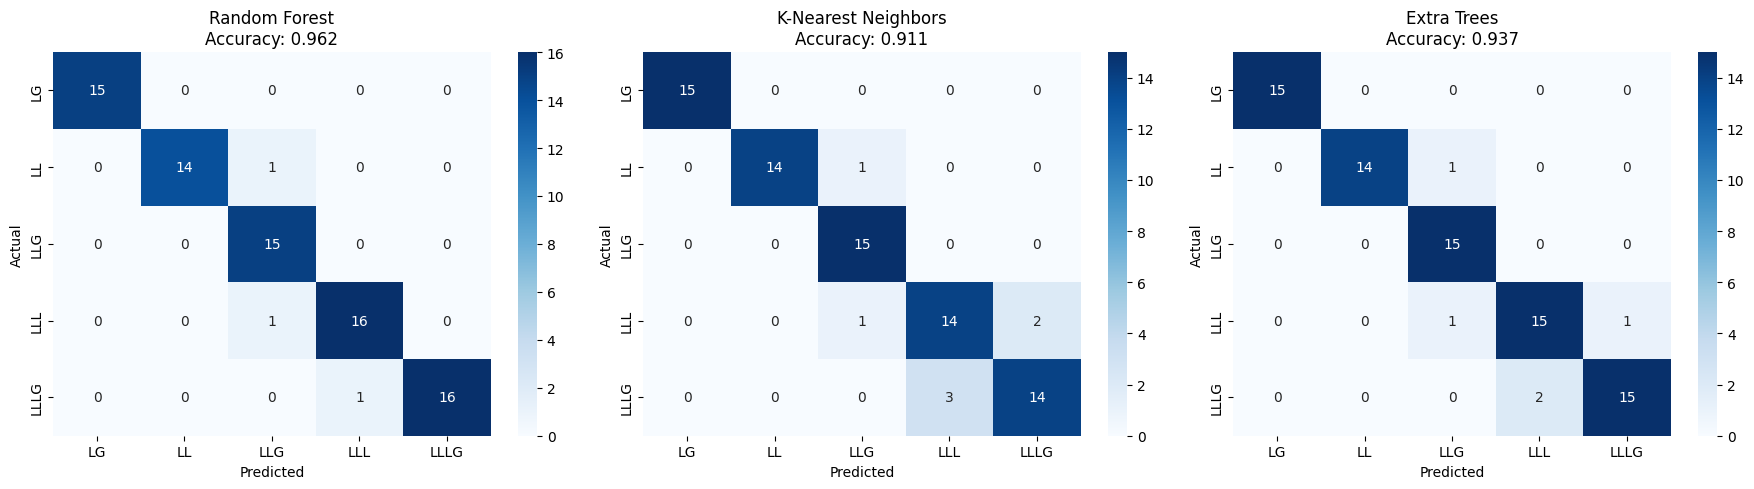


Classification Report - Random Forest:
--------------------------------------------------
              precision    recall  f1-score   support

          LG       1.00      1.00      1.00        15
          LL       1.00      0.93      0.97        15
         LLG       0.88      1.00      0.94        15
         LLL       0.94      0.94      0.94        17
        LLLG       1.00      0.94      0.97        17

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.97      0.96      0.96        79


Classification Report - K-Nearest Neighbors:
--------------------------------------------------
              precision    recall  f1-score   support

          LG       1.00      1.00      1.00        15
          LL       1.00      0.93      0.97        15
         LLG       0.88      1.00      0.94        15
         LLL       0.82      0.82      0.82        17
        LLLG       0.88      0.82      0.85        1

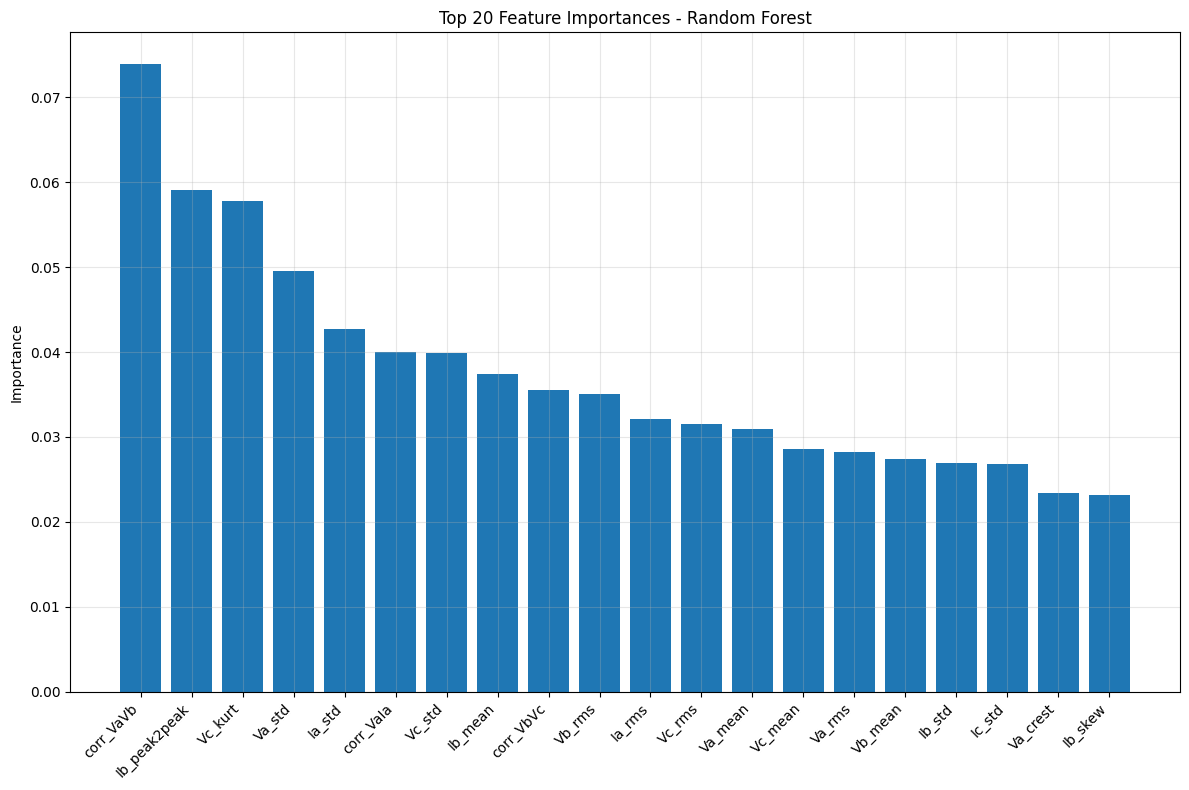


Top 10 Most Important Features (Random Forest):
 1. corr_VaVb                 | Importance: 0.0739
 2. Ib_peak2peak              | Importance: 0.0590
 3. Vc_kurt                   | Importance: 0.0578
 4. Va_std                    | Importance: 0.0496
 5. Ia_std                    | Importance: 0.0427
 6. corr_VaIa                 | Importance: 0.0400
 7. Vc_std                    | Importance: 0.0399
 8. Ib_mean                   | Importance: 0.0375
 9. corr_VbVc                 | Importance: 0.0355
10. Vb_rms                    | Importance: 0.0350


In [ ]:
# Analyze top 3 models in detail
top_3_models = sorted_names[:3]

print("DETAILED ANALYSIS OF TOP 3 MODELS")
print("=" * 60)

# Confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, model_name in enumerate(top_3_models):
    y_pred = test_results[model_name]['predictions']
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                ax=axes[i])
    axes[i].set_title(f'{model_name}\nAccuracy: {test_results[model_name]["accuracy"]:.3f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Classification reports
for model_name in top_3_models:
    print(f"\nClassification Report - {model_name}:")
    print("-" * 50)
    y_pred = test_results[model_name]['predictions']
    print(classification_report(y_test, y_pred, target_names=class_names))

# Feature importance for tree-based models
best_model = trained_models[best_model_name]
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X_augmented.columns

    # Get top 20 features
    indices = np.argsort(importances)[::-1][:20]

    plt.figure(figsize=(12, 8))
    plt.title(f'Top 20 Feature Importances - {best_model_name}')
    plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.ylabel('Importance')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"\nTop 10 Most Important Features ({best_model_name}):")
    for i in range(min(10, len(indices))):
        feat_idx = indices[i]
        print(f"{i+1:2d}. {feature_names[feat_idx]:25} | Importance: {importances[feat_idx]:.4f}")


In [ ]:
print("SAVING BEST MODEL AND COMPONENTS")
print("=" * 50)

# Get the best model
best_classifier = trained_models[best_model_name]
classifier_scaler = scaler
classifier_classes = class_names

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {test_results[best_model_name]['accuracy']:.4f}")
print(f"F1 Score: {test_results[best_model_name]['f1_score']:.4f}")

# Save individual components
joblib.dump(best_classifier, 'classifier.joblib')
joblib.dump(classifier_scaler, 'classifier_scaler.joblib')
joblib.dump(classifier_classes, 'class_names.joblib')

print("\nFiles saved:")
print("✓ classifier.joblib - The trained classifier")
print("✓ classifier_scaler.joblib - Feature scaler")
print("✓ class_names.joblib - Class names array")

# Save complete model package
model_package = {
    'classifier': best_classifier,
    'scaler': classifier_scaler,
    'class_names': classifier_classes,
    'feature_names': list(X_augmented.columns),
    'model_name': best_model_name,
    'performance': {
        'test_accuracy': test_results[best_model_name]['accuracy'],
        'f1_score': test_results[best_model_name]['f1_score'],
        'cv_mean': training_scores[best_model_name]['cv_mean'],
        'cv_std': training_scores[best_model_name]['cv_std']
    }
}

joblib.dump(model_package, 'complete_fault_classifier.joblib')
print("✓ complete_fault_classifier.joblib - Complete model package")

# Verification - Load and test
print("\nVerification - Loading saved models:")
loaded_classifier = joblib.load('classifier.joblib')
loaded_scaler = joblib.load('classifier_scaler.joblib')
loaded_classes = joblib.load('class_names.joblib')

# Quick test
sample_prediction = loaded_classifier.predict(loaded_scaler.transform(X_test[:5]))
print(f"✓ Models loaded successfully")
print(f"✓ Sample predictions: {[loaded_classes[p] for p in sample_prediction]}")

print("\n" + "=" * 50)
print("MODEL TRAINING AND SAVING COMPLETE!")
print(f"Best Model: {best_model_name}")
print(f"Ready for deployment and prediction!")
print("=" * 50)

SAVING BEST MODEL AND COMPONENTS
Best Model: Random Forest
Test Accuracy: 0.9620
F1 Score: 0.9624

Files saved:
✓ classifier.joblib - The trained classifier
✓ classifier_scaler.joblib - Feature scaler
✓ class_names.joblib - Class names array
✓ complete_fault_classifier.joblib - Complete model package

Verification - Loading saved models:
✓ Models loaded successfully
✓ Sample predictions: ['LL', 'LG', 'LLLG', 'LLLG', 'LG']

MODEL TRAINING AND SAVING COMPLETE!
Best Model: Random Forest
Ready for deployment and prediction!


**Train deep Learning models for classification**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (LSTM, GRU, Conv1D, Dense, Dropout, BatchNormalization,
                                   Input, TimeDistributed, Attention, MultiHeadAttention,
                                   GlobalAveragePooling1D, GlobalMaxPooling1D, Concatenate,
                                   Bidirectional, LayerNormalization, Add)
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import joblib
plt.style.use('default')

In [3]:
fault_intervals = {
    'LG': [[0.025, 0.075], [1.500, 1.575], [3.925, 4.000]],
    'LLG': [[0.325, 0.4], [1.825, 1.900], [4.325, 4.375]],
    'LL': [[0.500, 0.575], [2.100, 2.150], [4.625, 4.675]],
    'LLL': [[0.675, 0.750], [2.625, 2.725], [3.000, 3.100]],
    'LLLG': [[1.225, 1.350], [3.500, 3.625], [4.875, 4.975]]
}

def extract_time_series_sequences(data, interval, sequence_length=100):
    """Extract time series sequences from raw data for deep learning models."""
    start_idx = np.searchsorted(data['Time'], interval[0])
    end_idx = np.searchsorted(data['Time'], interval[1])
    window = data.iloc[start_idx:end_idx]

    if len(window) < sequence_length:
        return None, None

    # Extract signal columns
    signal_columns = ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']
    available_signals = [col for col in signal_columns if col in window.columns]

    if not available_signals:
        return None, None

    # Create time series matrix
    time_series_data = window[available_signals].values

    # Create overlapping sequences
    sequences = []
    step_size = max(1, len(time_series_data) // 10)  # Create multiple sequences per interval

    for i in range(0, len(time_series_data) - sequence_length + 1, step_size):
        sequence = time_series_data[i:i + sequence_length]
        sequences.append(sequence)

    sequences = np.array(sequences)

    # Also extract statistical features for hybrid approach
    features = extract_statistical_features(window, available_signals)

    return sequences, features

def extract_statistical_features(window, signal_columns):
    """Extract statistical features as auxiliary information."""
    features = []

    for signal in signal_columns:
        if signal in window.columns:
            sig_data = window[signal].values
            if len(sig_data) > 1:
                features.extend([
                    np.mean(sig_data),
                    np.std(sig_data),
                    skew(sig_data),
                    kurtosis(sig_data),
                    np.sqrt(np.mean(sig_data ** 2)),  # RMS
                    np.ptp(sig_data),  # Peak-to-peak
                    np.max(np.abs(sig_data)) / (np.sqrt(np.mean(sig_data ** 2)) + 1e-9)  # Crest factor
                ])

    # Cross-signal correlations
    try:
        if len(window) > 1 and len(signal_columns) >= 2:
            for i in range(len(signal_columns)-1):
                for j in range(i+1, len(signal_columns)):
                    if signal_columns[i] in window.columns and signal_columns[j] in window.columns:
                        corr = np.corrcoef(window[signal_columns[i]], window[signal_columns[j]])[0,1]
                        features.append(corr if not np.isnan(corr) else 0)
    except:
        pass

    return np.array(features)

Extracting time series sequences from fault intervals...

Processing LG:
  Interval 1: [0.025, 0.075] -> ✓ 9 sequences extracted
  Interval 2: [1.500, 1.575] -> ✓ 10 sequences extracted
  Interval 3: [3.925, 4.000] -> ✓ 10 sequences extracted

Processing LLG:
  Interval 1: [0.325, 0.400] -> ✓ 10 sequences extracted
  Interval 2: [1.825, 1.900] -> ✓ 10 sequences extracted
  Interval 3: [4.325, 4.375] -> ✓ 9 sequences extracted

Processing LL:
  Interval 1: [0.500, 0.575] -> ✓ 10 sequences extracted
  Interval 2: [2.100, 2.150] -> ✓ 9 sequences extracted
  Interval 3: [4.625, 4.675] -> ✓ 9 sequences extracted

Processing LLL:
  Interval 1: [0.675, 0.750] -> ✓ 10 sequences extracted
  Interval 2: [2.625, 2.725] -> ✓ 10 sequences extracted
  Interval 3: [3.000, 3.100] -> ✓ 10 sequences extracted

Processing LLLG:
  Interval 1: [1.225, 1.350] -> ✓ 10 sequences extracted
  Interval 2: [3.500, 3.625] -> ✓ 10 sequences extracted
  Interval 3: [4.875, 4.975] -> ✓ 10 sequences extracted

Time se

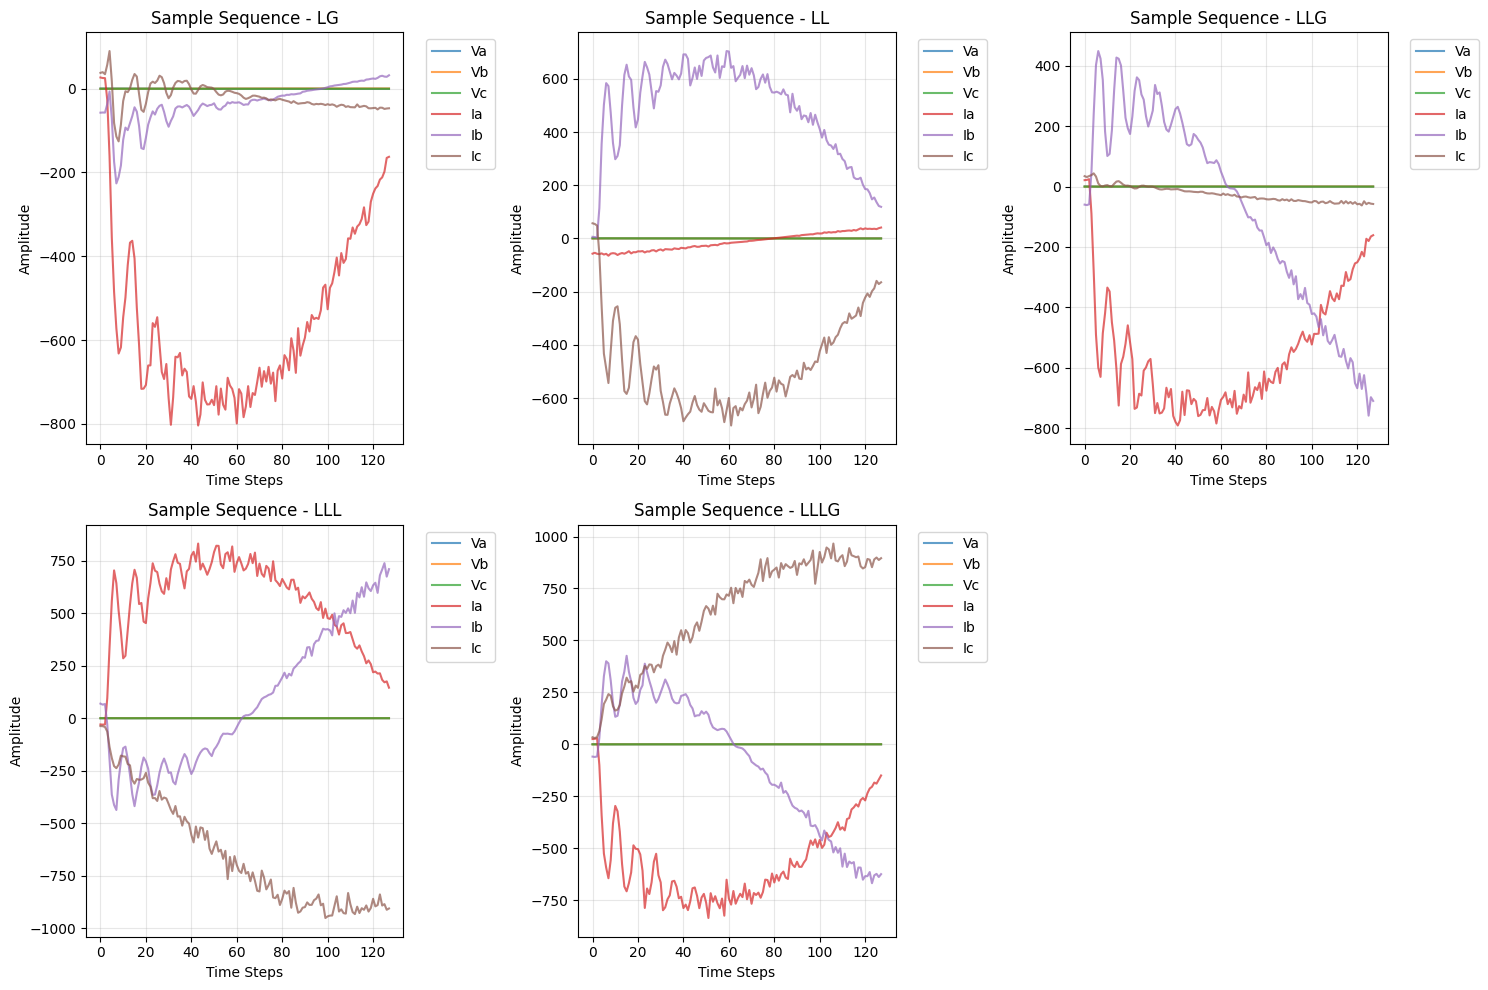

In [9]:
# Load data
data = pd.read_csv("/content/simData.csv")

print("Extracting time series sequences from fault intervals...")

# Parameters
SEQUENCE_LENGTH = 128  # Number of time steps per sequence
sequences_list = []
features_list = []
labels = []

for fault_type, intervals in fault_intervals.items():
    print(f"\nProcessing {fault_type}:")
    for i, interval in enumerate(intervals):
        print(f"  Interval {i+1}: [{interval[0]:.3f}, {interval[1]:.3f}]", end=" -> ")

        sequences, features = extract_time_series_sequences(data, interval, SEQUENCE_LENGTH)

        if sequences is not None and len(sequences) > 0:
            sequences_list.extend(sequences)
            features_list.extend([features] * len(sequences))  # Repeat features for each sequence
            labels.extend([fault_type] * len(sequences))
            print(f"✓ {len(sequences)} sequences extracted")
        else:
            print("✗ No valid sequences found")

# Convert to numpy arrays
X_sequences = np.array(sequences_list)
X_features = np.array(features_list)
y_labels = np.array(labels)

print(f"\nTime series data extracted:")
print(f"Sequences shape: {X_sequences.shape}")
print(f"Features shape: {X_features.shape}")
print(f"Labels: {len(y_labels)}")
print(f"Unique labels: {np.unique(y_labels)}")

# Visualize sample sequences
plt.figure(figsize=(15, 10))
n_samples = min(3, len(X_sequences))
signal_names = ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']

for fault_idx, fault_type in enumerate(np.unique(y_labels)[:5]):
    fault_indices = np.where(y_labels == fault_type)[0]
    if len(fault_indices) > 0:
        sample_idx = fault_indices[0]

        plt.subplot(2, 3, fault_idx + 1)
        for signal_idx in range(min(6, X_sequences.shape[2])):
            plt.plot(X_sequences[sample_idx, :, signal_idx],
                    label=signal_names[signal_idx] if signal_idx < len(signal_names) else f'Signal_{signal_idx}',
                    alpha=0.7)

        plt.title(f'Sample Sequence - {fault_type}')
        plt.xlabel('Time Steps')
        plt.ylabel('Amplitude')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Original data: 146 samples
Augmentation round 1/8
  Applied Gaussian noise
Augmentation round 2/8
  Applied Amplitude scaling
Augmentation round 3/8
  Applied Phase shifting
Augmentation round 4/8
  Applied Time warping
Augmentation round 5/8
  Applied reverse_time
Augmentation round 6/8
  Applied mirror
Augmentation round 7/8
  Applied reverse_time
Augmentation round 8/8
  Applied invert
Augmentation complete: 1314 total samples


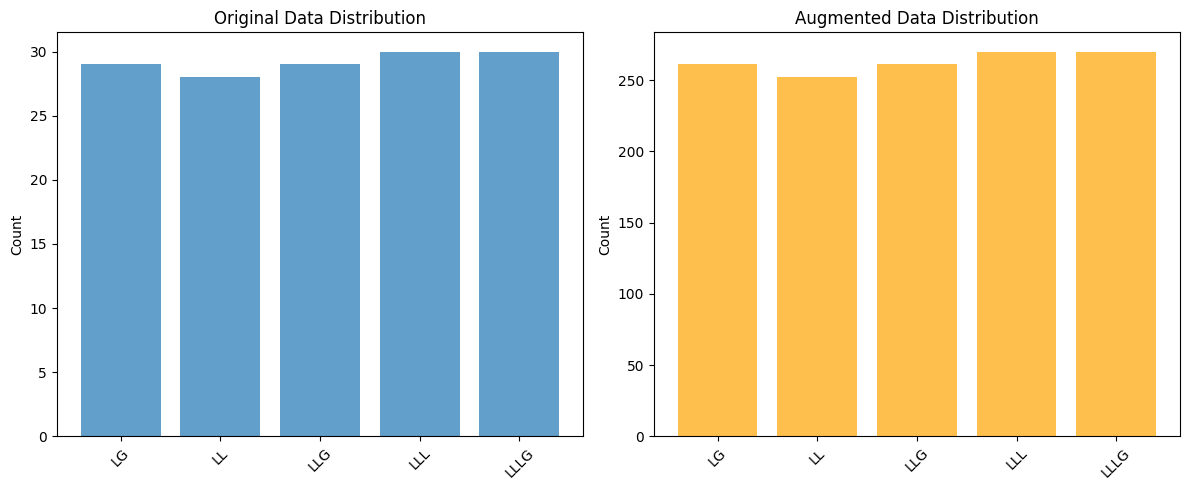

In [47]:
from scipy.signal import square, sawtooth

def augment_time_series_data(X_seq, X_feat, y, augmentation_factor=10):
    """Augment time series data with diverse, aggressive transformations to reduce overfitting."""
    print(f"Original data: {X_seq.shape[0]} samples")
    SEQUENCE_LENGTH = X_seq.shape[1]
    NUM_CHANNELS = X_seq.shape[2]

    X_seq_aug = [X_seq]
    X_feat_aug = [X_feat]
    y_aug = [y]

    for aug_round in range(augmentation_factor):
        print(f"Augmentation round {aug_round + 1}/{augmentation_factor}")

        # Start with a copy
        variant = X_seq.copy()

        # Basic augmentations
        if aug_round == 0:
            noise = np.random.normal(0, np.std(variant, axis=(0, 1)) * 0.1, variant.shape)
            variant += noise
            method = "Gaussian noise"
        elif aug_round == 1:
            scale = np.random.uniform(0.7, 1.3, (variant.shape[0], 1, variant.shape[2]))
            variant *= scale
            method = "Amplitude scaling"
        elif aug_round == 2:
            shifts = np.random.randint(-10, 11, variant.shape[0])
            variant = np.array([np.roll(seq, shift, axis=0) for seq, shift in zip(variant, shifts)])
            method = "Phase shifting"
        elif aug_round == 3:
            # Time warping
            warped = []
            for seq in variant:
                warp_factor = np.random.uniform(0.8, 1.2)
                orig_idx = np.arange(len(seq))
                new_idx = np.linspace(0, len(seq)-1, int(len(seq) * warp_factor))
                if len(new_idx) > SEQUENCE_LENGTH:
                    new_idx = new_idx[:SEQUENCE_LENGTH]
                elif len(new_idx) < SEQUENCE_LENGTH:
                    padding = np.full(SEQUENCE_LENGTH - len(new_idx), new_idx[-1])
                    new_idx = np.concatenate([new_idx, padding])
                warped_seq = np.zeros((SEQUENCE_LENGTH, seq.shape[1]))
                for i in range(seq.shape[1]):
                    warped_seq[:, i] = np.interp(new_idx, orig_idx, seq[:, i])
                warped.append(warped_seq)
            variant = np.array(warped)
            method = "Time warping"

        # Aggressive augmentations
        else:
            method_pool = [
                "sine_overlay", "square_overlay", "sawtooth_overlay", "scramble",
                "invert", "mirror", "replace_sensor", "inject_spike",
                "inject_drop", "reverse_time"
            ]
            method = np.random.choice(method_pool)
            transformed = []
            for seq in variant:
                v = seq.copy()
                if method == "sine_overlay":
                    for ch in range(NUM_CHANNELS):
                        v[:, ch] += np.sin(np.linspace(0, np.pi * np.random.uniform(2, 6), SEQUENCE_LENGTH)) * np.random.uniform(0.3, 0.7)
                elif method == "square_overlay":
                    for ch in range(NUM_CHANNELS):
                        v[:, ch] += square(np.linspace(0, 2 * np.pi, SEQUENCE_LENGTH)) * np.random.uniform(0.3, 0.6)
                elif method == "sawtooth_overlay":
                    for ch in range(NUM_CHANNELS):
                        v[:, ch] += sawtooth(np.linspace(0, 2 * np.pi, SEQUENCE_LENGTH)) * np.random.uniform(0.3, 0.6)
                elif method == "scramble":
                    for ch in range(NUM_CHANNELS):
                        np.random.shuffle(v[:, ch])
                elif method == "invert":
                    v = -v
                elif method == "mirror":
                    v = v[::-1]
                elif method == "replace_sensor":
                    ch1, ch2 = np.random.choice(NUM_CHANNELS, 2, replace=False)
                    v[:, ch1] = v[:, ch2]
                elif method == "inject_spike":
                    for _ in range(3):
                        t = np.random.randint(0, SEQUENCE_LENGTH - 1)
                        c = np.random.randint(0, NUM_CHANNELS)
                        v[t:t+2, c] += np.random.uniform(2, 4)
                elif method == "inject_drop":
                    for _ in range(3):
                        t = np.random.randint(0, SEQUENCE_LENGTH - 2)
                        c = np.random.randint(0, NUM_CHANNELS)
                        v[t:t+3, c] = 0
                elif method == "reverse_time":
                    v = v[::-1]
                transformed.append(v)
            variant = np.array(transformed)

        # Aggressive feature noise
        feat_noise = np.random.normal(0, np.std(X_feat, axis=0) * 0.5, X_feat.shape)
        feat_aug = X_feat + feat_noise

        X_seq_aug.append(variant)
        X_feat_aug.append(feat_aug)
        y_aug.append(y)

        print(f"  Applied {method}")

    # Combine
    X_seq_final = np.concatenate(X_seq_aug, axis=0)
    X_feat_final = np.concatenate(X_feat_aug, axis=0)
    y_final = np.concatenate(y_aug, axis=0)

    print(f"Augmentation complete: {X_seq_final.shape[0]} total samples")
    return X_seq_final, X_feat_final, y_final


# Apply augmentation
X_seq_aug, X_feat_aug, y_aug = augment_time_series_data(X_sequences, X_features, y_labels,
                                                       augmentation_factor=8)

# Visualize augmentation effect
unique_labels, counts_orig = np.unique(y_labels, return_counts=True)
unique_labels_aug, counts_aug = np.unique(y_aug, return_counts=True)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(unique_labels, counts_orig, alpha=0.7)
plt.title('Original Data Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(unique_labels_aug, counts_aug, alpha=0.7, color='orange')
plt.title('Augmented Data Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [48]:
le = LabelEncoder()
y_encoded = le.fit_transform(y_aug)
y_categorical = to_categorical(y_encoded)
n_classes = len(le.classes_)

print(f"Number of classes: {n_classes}")
print(f"Categorical shape: {y_categorical.shape}")

# Scale the data
seq_scaler = StandardScaler()
feat_scaler = StandardScaler()

# Reshape sequences for scaling
X_seq_reshaped = X_seq_aug.reshape(-1, X_seq_aug.shape[-1])
X_seq_scaled = seq_scaler.fit_transform(X_seq_reshaped)
X_seq_scaled = X_seq_scaled.reshape(X_seq_aug.shape)

# Scale features
X_feat_scaled = feat_scaler.fit_transform(X_feat_aug)

print(f"Data shapes after scaling:")
print(f"Sequences: {X_seq_scaled.shape}")
print(f"Features: {X_feat_scaled.shape}")

# Train-test split
X_seq_train, X_seq_test, X_feat_train, X_feat_test, y_train, y_test = train_test_split(
    X_seq_scaled, X_feat_scaled, y_categorical,
    test_size=0.2, random_state=42, stratify=y_encoded
)

Number of classes: 5
Categorical shape: (1314, 5)
Data shapes after scaling:
Sequences: (1314, 128, 6)
Features: (1314, 57)


In [49]:
def create_lstm_model(sequence_shape, feature_shape, n_classes):
    """LSTM-based model for time series classification."""
    # Sequence input
    seq_input = Input(shape=sequence_shape, name='sequence_input')

    # LSTM layers
    lstm_out = LSTM(128, return_sequences=True, dropout=0.2)(seq_input)
    lstm_out = LSTM(64, return_sequences=False, dropout=0.2)(lstm_out)
    lstm_out = Dense(32, activation='relu')(lstm_out)
    lstm_out = Dropout(0.3)(lstm_out)

    # Feature input
    feat_input = Input(shape=feature_shape, name='feature_input')
    feat_dense = Dense(32, activation='relu')(feat_input)
    feat_dense = Dropout(0.3)(feat_dense)

    # Combine both paths
    combined = Concatenate()([lstm_out, feat_dense])
    combined = Dense(64, activation='relu')(combined)
    combined = Dropout(0.3)(combined)
    output = Dense(n_classes, activation='softmax')(combined)

    model = Model(inputs=[seq_input, feat_input], outputs=output)
    return model

def create_cnn_lstm_model(sequence_shape, feature_shape, n_classes):
    """CNN-LSTM hybrid model."""
    # Sequence input
    seq_input = Input(shape=sequence_shape, name='sequence_input')

    # CNN layers for feature extraction
    conv_out = Conv1D(64, 3, activation='relu', padding='same')(seq_input)
    conv_out = BatchNormalization()(conv_out)
    conv_out = Conv1D(32, 3, activation='relu', padding='same')(conv_out)
    conv_out = BatchNormalization()(conv_out)

    # LSTM layers
    lstm_out = LSTM(64, return_sequences=True, dropout=0.2)(conv_out)
    lstm_out = LSTM(32, return_sequences=False, dropout=0.2)(lstm_out)

    # Feature input
    feat_input = Input(shape=feature_shape, name='feature_input')
    feat_dense = Dense(32, activation='relu')(feat_input)
    feat_dense = Dropout(0.3)(feat_dense)

    # Combine
    combined = Concatenate()([lstm_out, feat_dense])
    combined = Dense(64, activation='relu')(combined)
    combined = Dropout(0.4)(combined)
    output = Dense(n_classes, activation='softmax')(combined)

    model = Model(inputs=[seq_input, feat_input], outputs=output)
    return model

def create_transformer_model(sequence_shape, feature_shape, n_classes):
    """Transformer-based model with attention mechanism."""
    # Sequence input
    seq_input = Input(shape=sequence_shape, name='sequence_input')

    # Multi-head attention
    attention_out = MultiHeadAttention(num_heads=8, key_dim=32)(seq_input, seq_input)
    attention_out = LayerNormalization()(attention_out)

    # Add & Norm
    add_norm = Add()([seq_input, attention_out])
    add_norm = LayerNormalization()(add_norm)

    # Feed forward
    ff_out = Dense(128, activation='relu')(add_norm)
    ff_out = Dense(sequence_shape[-1])(ff_out)
    ff_out = Add()([add_norm, ff_out])
    ff_out = LayerNormalization()(ff_out)

    # Global pooling
    pooled = GlobalAveragePooling1D()(ff_out)

    # Feature input
    feat_input = Input(shape=feature_shape, name='feature_input')
    feat_dense = Dense(32, activation='relu')(feat_input)

    # Combine
    combined = Concatenate()([pooled, feat_dense])
    combined = Dense(64, activation='relu')(combined)
    combined = Dropout(0.3)(combined)
    output = Dense(n_classes, activation='softmax')(combined)

    model = Model(inputs=[seq_input, feat_input], outputs=output)
    return model

def create_bidirectional_gru_model(sequence_shape, feature_shape, n_classes):
    """Bidirectional GRU model."""
    # Sequence input
    seq_input = Input(shape=sequence_shape, name='sequence_input')

    # Bidirectional GRU
    gru_out = Bidirectional(GRU(64, return_sequences=True, dropout=0.2))(seq_input)
    gru_out = Bidirectional(GRU(32, return_sequences=False, dropout=0.2))(gru_out)

    # Feature input
    feat_input = Input(shape=feature_shape, name='feature_input')
    feat_dense = Dense(32, activation='relu')(feat_input)

    # Combine
    combined = Concatenate()([gru_out, feat_dense])
    combined = Dense(64, activation='relu')(combined)
    combined = Dropout(0.3)(combined)
    output = Dense(n_classes, activation='softmax')(combined)

    model = Model(inputs=[seq_input, feat_input], outputs=output)
    return model

# Create models
sequence_shape = (X_seq_train.shape[1], X_seq_train.shape[2])
feature_shape = (X_feat_train.shape[1],)

models = {
    'LSTM': create_lstm_model(sequence_shape, feature_shape, n_classes),
    'CNN-LSTM': create_cnn_lstm_model(sequence_shape, feature_shape, n_classes),
    'Transformer': create_transformer_model(sequence_shape, feature_shape, n_classes),
    'Bi-GRU': create_bidirectional_gru_model(sequence_shape, feature_shape, n_classes)
}

print("Models created successfully!")
for name, model in models.items():
    print(f"{name}: {model.count_params():,} parameters")

Models created successfully!
LSTM: 126,949 parameters
CNN-LSTM: 51,365 parameters
Transformer: 13,301 parameters
Bi-GRU: 67,141 parameters


In [50]:
# Training parameters
EPOCHS = 100
BATCH_SIZE = 32
PATIENCE = 10

# Callbacks
def get_callbacks(model_name):
    return [
        EarlyStopping(
            monitor='val_accuracy',
            patience=PATIENCE,
            restore_best_weights=True,
            mode='max'
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=8,
            min_lr=1e-7,
            verbose=1
        ),
        ModelCheckpoint(
            f'best_{model_name.lower().replace("-", "_")}_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max'
        )
    ]

print("Training setup complete!")
print(f"Epochs: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Early stopping patience: {PATIENCE}")

Training setup complete!
Epochs: 100
Batch size: 32
Early stopping patience: 10


In [51]:
training_histories = {}
trained_models = {}

print("Starting model training...")
print("=" * 60)

for name, model in models.items():
    print(f"\nTraining {name} Model")
    print("-" * 40)

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model
    history = model.fit(
        [X_seq_train, X_feat_train], y_train,
        validation_data=([X_seq_test, X_feat_test], y_test),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=get_callbacks(name),
        verbose=1
    )

    training_histories[name] = history
    trained_models[name] = model

    # Print final results
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Starting model training...

Training LSTM Model
----------------------------------------
Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4171 - loss: 1.4012

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4215 - loss: 1.3920 - val_accuracy: 0.8365 - val_loss: 0.5032 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7912 - loss: 0.5550 - val_accuracy: 0.8213 - val_loss: 0.3099 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8330 - loss: 0.3673 - val_accuracy: 0.8327 - val_loss: 0.2771 - learning_rate: 0.0010
Epoch 4/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8188 - loss: 0.3723

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8196 - loss: 0.3699 - val_accuracy: 0.8783 - val_loss: 0.2554 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8432 - loss: 0.2961 - val_accuracy: 0.8745 - val_loss: 0.2397 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8377 - loss: 0.2743

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8379 - loss: 0.2743 - val_accuracy: 0.8897 - val_loss: 0.2337 - learning_rate: 0.0010
Epoch 7/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8666 - loss: 0.2518

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8668 - loss: 0.2520 - val_accuracy: 0.9087 - val_loss: 0.2155 - learning_rate: 0.0010
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8760 - loss: 0.2668 - val_accuracy: 0.9087 - val_loss: 0.2153 - learning_rate: 0.0010
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8832 - loss: 0.2245 - val_accuracy: 0.9011 - val_loss: 0.2140 - learning_rate: 0.0010
Epoch 10/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8884 - loss: 0.2288

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8895 - loss: 0.2282 - val_accuracy: 0.9125 - val_loss: 0.1874 - learning_rate: 0.0010
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8994 - loss: 0.2117

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8995 - loss: 0.2117 - val_accuracy: 0.9240 - val_loss: 0.1794 - learning_rate: 0.0010
Epoch 12/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9067 - loss: 0.1939

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9065 - loss: 0.1944 - val_accuracy: 0.9316 - val_loss: 0.1721 - learning_rate: 0.0010
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9288 - loss: 0.1822 - val_accuracy: 0.9316 - val_loss: 0.1635 - learning_rate: 0.0010
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9120 - loss: 0.1853 - val_accuracy: 0.9163 - val_loss: 0.1723 - learning_rate: 0.0010
Epoch 15/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9491 - loss: 0.1416

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9487 - loss: 0.1419 - val_accuracy: 0.9392 - val_loss: 0.1493 - learning_rate: 0.0010
Epoch 16/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9422 - loss: 0.1457 - val_accuracy: 0.9392 - val_loss: 0.1490 - learning_rate: 0.0010
Epoch 17/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9469 - loss: 0.1324

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9464 - loss: 0.1330 - val_accuracy: 0.9544 - val_loss: 0.1334 - learning_rate: 0.0010
Epoch 18/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9457 - loss: 0.1389 - val_accuracy: 0.9430 - val_loss: 0.1400 - learning_rate: 0.0010
Epoch 19/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9515 - loss: 0.1221 - val_accuracy: 0.9392 - val_loss: 0.1317 - learning_rate: 0.0010
Epoch 20/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9605 - loss: 0.1127 - val_accuracy: 0.9430 - val_loss: 0.1295 - learning_rate: 0.0010
Epoch 21/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9519 - loss: 0.1113 - val_accuracy: 0.9506 - val_loss: 0.1136 - learning_rate: 0.0010
Epoch 22/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9584 - loss: 0.1036 - val_accuracy: 0.9468 - val_loss: 0.1176 - learning_rate: 0.0010
Epoch 23/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9621 - loss: 0.1022 - val_ac

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9603 - loss: 0.0977 - val_accuracy: 0.9582 - val_loss: 0.1080 - learning_rate: 0.0010
Epoch 27/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9732 - loss: 0.0795 - val_accuracy: 0.9468 - val_loss: 0.0995 - learning_rate: 0.0010
Epoch 28/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9633 - loss: 0.0903 - val_accuracy: 0.9544 - val_loss: 0.1032 - learning_rate: 0.0010
Epoch 29/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9722 - loss: 0.0666 - val_accuracy: 0.9544 - val_loss: 0.1063 - learning_rate: 0.0010
Epoch 30/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9734 - loss: 0.0736

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9735 - loss: 0.0737 - val_accuracy: 0.9620 - val_loss: 0.1052 - learning_rate: 0.0010
Epoch 31/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9743 - loss: 0.0708 - val_accuracy: 0.9506 - val_loss: 0.1116 - learning_rate: 0.0010
Epoch 32/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9735 - loss: 0.0738 - val_accuracy: 0.9620 - val_loss: 0.0969 - learning_rate: 0.0010
Epoch 33/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9675 - loss: 0.0781

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9677 - loss: 0.0780 - val_accuracy: 0.9658 - val_loss: 0.0955 - learning_rate: 0.0010
Epoch 34/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9774 - loss: 0.0579 - val_accuracy: 0.9620 - val_loss: 0.1126 - learning_rate: 0.0010
Epoch 35/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9767 - loss: 0.0615 - val_accuracy: 0.9506 - val_loss: 0.1076 - learning_rate: 0.0010
Epoch 36/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9791 - loss: 0.0605 - val_accuracy: 0.9620 - val_loss: 0.1114 - learning_rate: 0.0010
Epoch 37/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9821 - loss: 0.0505 - val_accuracy: 0.9582 - val_loss: 0.1008 - learning_rate: 0.0010
Epoch 38/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9797 - loss: 0.0577 - val_accuracy: 0.9506 - val_loss: 0.1097 - learning_rate: 0.0010
Epoch 39/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9706 - loss: 0.0673 - val_ac

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4697 - loss: 1.2762 - val_accuracy: 0.8251 - val_loss: 0.5353 - learning_rate: 0.0010
Epoch 2/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7995 - loss: 0.5246

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7980 - loss: 0.5227 - val_accuracy: 0.8289 - val_loss: 0.3175 - learning_rate: 0.0010
Epoch 3/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8129 - loss: 0.3614

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8124 - loss: 0.3617 - val_accuracy: 0.8327 - val_loss: 0.2847 - learning_rate: 0.0010
Epoch 4/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8108 - loss: 0.3468

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8112 - loss: 0.3461 - val_accuracy: 0.8707 - val_loss: 0.2642 - learning_rate: 0.0010
Epoch 5/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8379 - loss: 0.3125

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8384 - loss: 0.3116 - val_accuracy: 0.8821 - val_loss: 0.2508 - learning_rate: 0.0010
Epoch 6/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8547 - loss: 0.2873

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8541 - loss: 0.2871 - val_accuracy: 0.9049 - val_loss: 0.2346 - learning_rate: 0.0010
Epoch 7/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8444 - loss: 0.2886

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8456 - loss: 0.2869 - val_accuracy: 0.9163 - val_loss: 0.2292 - learning_rate: 0.0010
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9075 - loss: 0.2326 - val_accuracy: 0.8973 - val_loss: 0.2087 - learning_rate: 0.0010
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9127 - loss: 0.2279 - val_accuracy: 0.9163 - val_loss: 0.2012 - learning_rate: 0.0010
Epoch 10/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9055 - loss: 0.2101

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9047 - loss: 0.2107 - val_accuracy: 0.9240 - val_loss: 0.1877 - learning_rate: 0.0010
Epoch 11/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9086 - loss: 0.2114

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9080 - loss: 0.2119 - val_accuracy: 0.9468 - val_loss: 0.1717 - learning_rate: 0.0010
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8989 - loss: 0.2198 - val_accuracy: 0.9430 - val_loss: 0.1560 - learning_rate: 0.0010
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9227 - loss: 0.1812 - val_accuracy: 0.9430 - val_loss: 0.1479 - learning_rate: 0.0010
Epoch 14/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9436 - loss: 0.1529

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9422 - loss: 0.1547 - val_accuracy: 0.9506 - val_loss: 0.1402 - learning_rate: 0.0010
Epoch 15/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9292 - loss: 0.1735 - val_accuracy: 0.9506 - val_loss: 0.1308 - learning_rate: 0.0010
Epoch 16/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9404 - loss: 0.1427 - val_accuracy: 0.9468 - val_loss: 0.1240 - learning_rate: 0.0010
Epoch 17/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9404 - loss: 0.1538

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9406 - loss: 0.1529 - val_accuracy: 0.9544 - val_loss: 0.1091 - learning_rate: 0.0010
Epoch 18/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9382 - loss: 0.1390 - val_accuracy: 0.9506 - val_loss: 0.1026 - learning_rate: 0.0010
Epoch 19/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9528 - loss: 0.1213 - val_accuracy: 0.9544 - val_loss: 0.0978 - learning_rate: 0.0010
Epoch 20/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9506 - loss: 0.1331 - val_accuracy: 0.9544 - val_loss: 0.1032 - learning_rate: 0.0010
Epoch 21/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9545 - loss: 0.1153 - val_accuracy: 0.9544 - val_loss: 0.0968 - learning_rate: 0.0010
Epoch 22/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9591 - loss: 0.1025

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9590 - loss: 0.1024 - val_accuracy: 0.9582 - val_loss: 0.0982 - learning_rate: 0.0010
Epoch 23/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9645 - loss: 0.0927

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9645 - loss: 0.0929 - val_accuracy: 0.9696 - val_loss: 0.0830 - learning_rate: 0.0010
Epoch 24/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9741 - loss: 0.0723 - val_accuracy: 0.9544 - val_loss: 0.0927 - learning_rate: 0.0010
Epoch 25/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9582 - loss: 0.0994 - val_accuracy: 0.9582 - val_loss: 0.0820 - learning_rate: 0.0010
Epoch 26/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9756 - loss: 0.0761 - val_accuracy: 0.9658 - val_loss: 0.0785 - learning_rate: 0.0010
Epoch 27/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9762 - loss: 0.0729 - val_accuracy: 0.9620 - val_loss: 0.0815 - learning_rate: 0.0010
Epoch 28/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9798 - loss: 0.0767 - val_accuracy: 0.9696 - val_loss: 0.0760 - learning_rate: 0.0010
Epoch 29/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9738 - loss: 0.0711

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9738 - loss: 0.0711 - val_accuracy: 0.9772 - val_loss: 0.0634 - learning_rate: 0.0010
Epoch 30/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9702 - loss: 0.0815 - val_accuracy: 0.9582 - val_loss: 0.0926 - learning_rate: 0.0010
Epoch 31/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9717 - loss: 0.0783 - val_accuracy: 0.9696 - val_loss: 0.0679 - learning_rate: 0.0010
Epoch 32/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9817 - loss: 0.0577 - val_accuracy: 0.9620 - val_loss: 0.0817 - learning_rate: 0.0010
Epoch 33/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9712 - loss: 0.0668 - val_accuracy: 0.9620 - val_loss: 0.0813 - learning_rate: 0.0010
Epoch 34/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9885 - loss: 0.0343 - val_accuracy: 0.9696 - val_loss: 0.0744 - learning_rate: 0.0010
Epoch 35/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9756 - loss: 0.0642 - val_ac

33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.3254 - loss: 1.5635 - val_accuracy: 0.8631 - val_loss: 0.7240 - learning_rate: 0.0010
Epoch 2/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8321 - loss: 0.6411

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8327 - loss: 0.6328 - val_accuracy: 0.8897 - val_loss: 0.3358 - learning_rate: 0.0010
Epoch 3/100
28/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8447 - loss: 0.3732

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8453 - loss: 0.3674 - val_accuracy: 0.9125 - val_loss: 0.2515 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8987 - loss: 0.2451 - val_accuracy: 0.9011 - val_loss: 0.2242 - learning_rate: 0.0010
Epoch 5/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9167 - loss: 0.2151

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9161 - loss: 0.2148 - val_accuracy: 0.9392 - val_loss: 0.1952 - learning_rate: 0.0010
Epoch 6/100
30/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9277 - loss: 0.1769

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9279 - loss: 0.1768 - val_accuracy: 0.9468 - val_loss: 0.1705 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9386 - loss: 0.1823 - val_accuracy: 0.9316 - val_loss: 0.1575 - learning_rate: 0.0010
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9425 - loss: 0.1383 - val_accuracy: 0.9392 - val_loss: 0.1498 - learning_rate: 0.0010
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9727 - loss: 0.1012 - val_accuracy: 0.9468 - val_loss: 0.1287 - learning_rate: 0.0010
Epoch 10/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9630 - loss: 0.0949

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9629 - loss: 0.0954 - val_accuracy: 0.9582 - val_loss: 0.1183 - learning_rate: 0.0010
Epoch 11/100
29/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9704 - loss: 0.0873

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9712 - loss: 0.0860 - val_accuracy: 0.9658 - val_loss: 0.0859 - learning_rate: 0.0010
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9778 - loss: 0.0726 - val_accuracy: 0.9658 - val_loss: 0.1039 - learning_rate: 0.0010
Epoch 13/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9887 - loss: 0.0572

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9883 - loss: 0.0575 - val_accuracy: 0.9696 - val_loss: 0.0853 - learning_rate: 0.0010
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9776 - loss: 0.0642 - val_accuracy: 0.9696 - val_loss: 0.0837 - learning_rate: 0.0010
Epoch 15/100
29/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9896 - loss: 0.0438

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9893 - loss: 0.0441 - val_accuracy: 0.9734 - val_loss: 0.0760 - learning_rate: 0.0010
Epoch 16/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9712 - loss: 0.0630 - val_accuracy: 0.9734 - val_loss: 0.0738 - learning_rate: 0.0010
Epoch 17/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9913 - loss: 0.0345 - val_accuracy: 0.9658 - val_loss: 0.0732 - learning_rate: 0.0010
Epoch 18/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9837 - loss: 0.0421 - val_accuracy: 0.9696 - val_loss: 0.0688 - learning_rate: 0.0010
Epoch 19/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9856 - loss: 0.0368 - val_accuracy: 0.9734 - val_loss: 0.0791 - learning_rate: 0.0010
Epoch 20/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9946 - loss: 0.0249 - val_accuracy: 0.9658 - val_loss: 0.0637 - learning_rate: 0.0010
Epoch 21/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9936 - loss: 0.0327

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9934 - loss: 0.0324 - val_accuracy: 0.9772 - val_loss: 0.0602 - learning_rate: 0.0010
Epoch 22/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9948 - loss: 0.0261 - val_accuracy: 0.9734 - val_loss: 0.0684 - learning_rate: 0.0010
Epoch 23/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9961 - loss: 0.0226 - val_accuracy: 0.9696 - val_loss: 0.0618 - learning_rate: 0.0010
Epoch 24/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9962 - loss: 0.0199 - val_accuracy: 0.9658 - val_loss: 0.0623 - learning_rate: 0.0010
Epoch 25/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9899 - loss: 0.0262 - val_accuracy: 0.9696 - val_loss: 0.0556 - learning_rate: 0.0010
Epoch 26/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9972 - loss: 0.0160 - val_accuracy: 0.9696 - val_loss: 0.0615 - learning_rate: 0.0010
Epoch 27/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9963 - loss: 0.0188 - val_accura

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.3612 - loss: 1.4595 - val_accuracy: 0.8213 - val_loss: 0.6438 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8240 - loss: 0.5537 - val_accuracy: 0.7985 - val_loss: 0.3252 - learning_rate: 0.0010
Epoch 3/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8310 - loss: 0.3255

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8309 - loss: 0.3255 - val_accuracy: 0.8517 - val_loss: 0.2762 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8549 - loss: 0.2761 - val_accuracy: 0.8365 - val_loss: 0.2599 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8447 - loss: 0.2950

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8450 - loss: 0.2942 - val_accuracy: 0.8555 - val_loss: 0.2465 - learning_rate: 0.0010
Epoch 6/100
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8867 - loss: 0.2370

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8866 - loss: 0.2369 - val_accuracy: 0.9011 - val_loss: 0.2299 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9021 - loss: 0.2201 - val_accuracy: 0.8745 - val_loss: 0.2318 - learning_rate: 0.0010
Epoch 8/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9184 - loss: 0.1938

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9186 - loss: 0.1929 - val_accuracy: 0.9202 - val_loss: 0.1907 - learning_rate: 0.0010
Epoch 9/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9409 - loss: 0.1655

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9406 - loss: 0.1655 - val_accuracy: 0.9392 - val_loss: 0.1737 - learning_rate: 0.0010
Epoch 10/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9457 - loss: 0.1518

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9458 - loss: 0.1508 - val_accuracy: 0.9506 - val_loss: 0.1471 - learning_rate: 0.0010
Epoch 11/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9530 - loss: 0.1217

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9529 - loss: 0.1219 - val_accuracy: 0.9544 - val_loss: 0.1327 - learning_rate: 0.0010
Epoch 12/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9586 - loss: 0.1188

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9591 - loss: 0.1181 - val_accuracy: 0.9582 - val_loss: 0.1347 - learning_rate: 0.0010
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9546 - loss: 0.1036 - val_accuracy: 0.9582 - val_loss: 0.1289 - learning_rate: 0.0010
Epoch 14/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9699 - loss: 0.0833

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9702 - loss: 0.0830 - val_accuracy: 0.9620 - val_loss: 0.1145 - learning_rate: 0.0010
Epoch 15/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9855 - loss: 0.0667 - val_accuracy: 0.9582 - val_loss: 0.1172 - learning_rate: 0.0010
Epoch 16/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9782 - loss: 0.0595 - val_accuracy: 0.9544 - val_loss: 0.1065 - learning_rate: 0.0010
Epoch 17/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9869 - loss: 0.0579 - val_accuracy: 0.9468 - val_loss: 0.1129 - learning_rate: 0.0010
Epoch 18/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9865 - loss: 0.0538

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9865 - loss: 0.0537 - val_accuracy: 0.9696 - val_loss: 0.0909 - learning_rate: 0.0010
Epoch 19/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9942 - loss: 0.0370 - val_accuracy: 0.9506 - val_loss: 0.1067 - learning_rate: 0.0010
Epoch 20/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9846 - loss: 0.0390 - val_accuracy: 0.9658 - val_loss: 0.0953 - learning_rate: 0.0010
Epoch 21/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9937 - loss: 0.0289 - val_accuracy: 0.9620 - val_loss: 0.0992 - learning_rate: 0.0010
Epoch 22/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9950 - loss: 0.0292 - val_accuracy: 0.9696 - val_loss: 0.0856 - learning_rate: 0.0010
Epoch 23/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9955 - loss: 0.0296 - val_accuracy: 0.9620 - val_loss: 0.0897 - learning_rate: 0.0010
Epoch 24/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9904 - loss: 0.0298 - val_ac

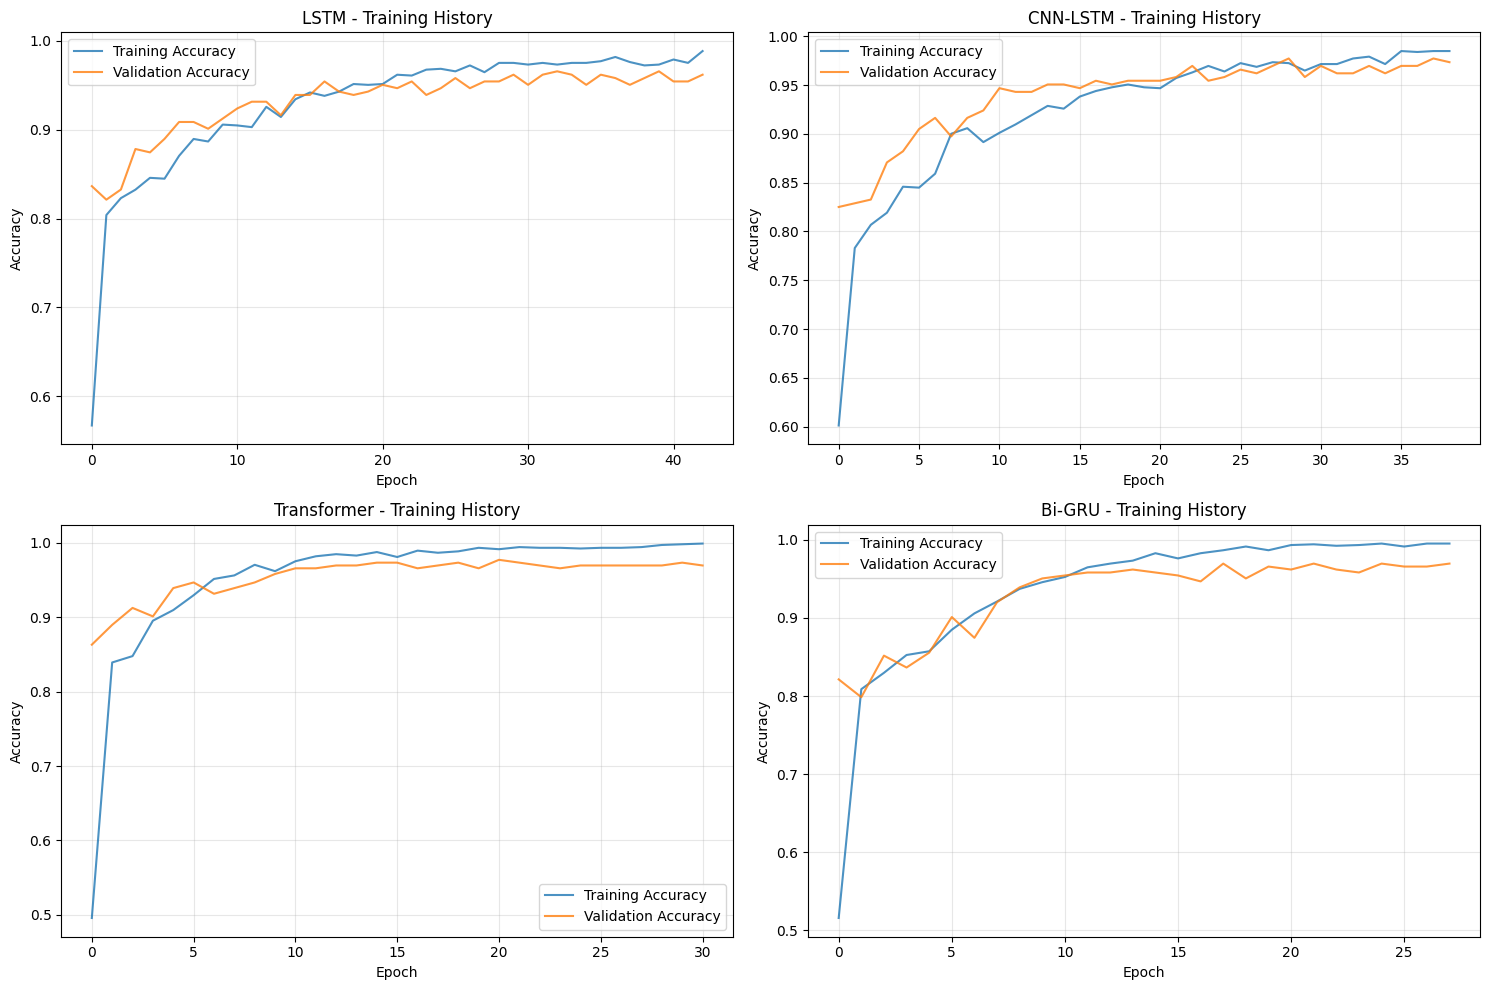

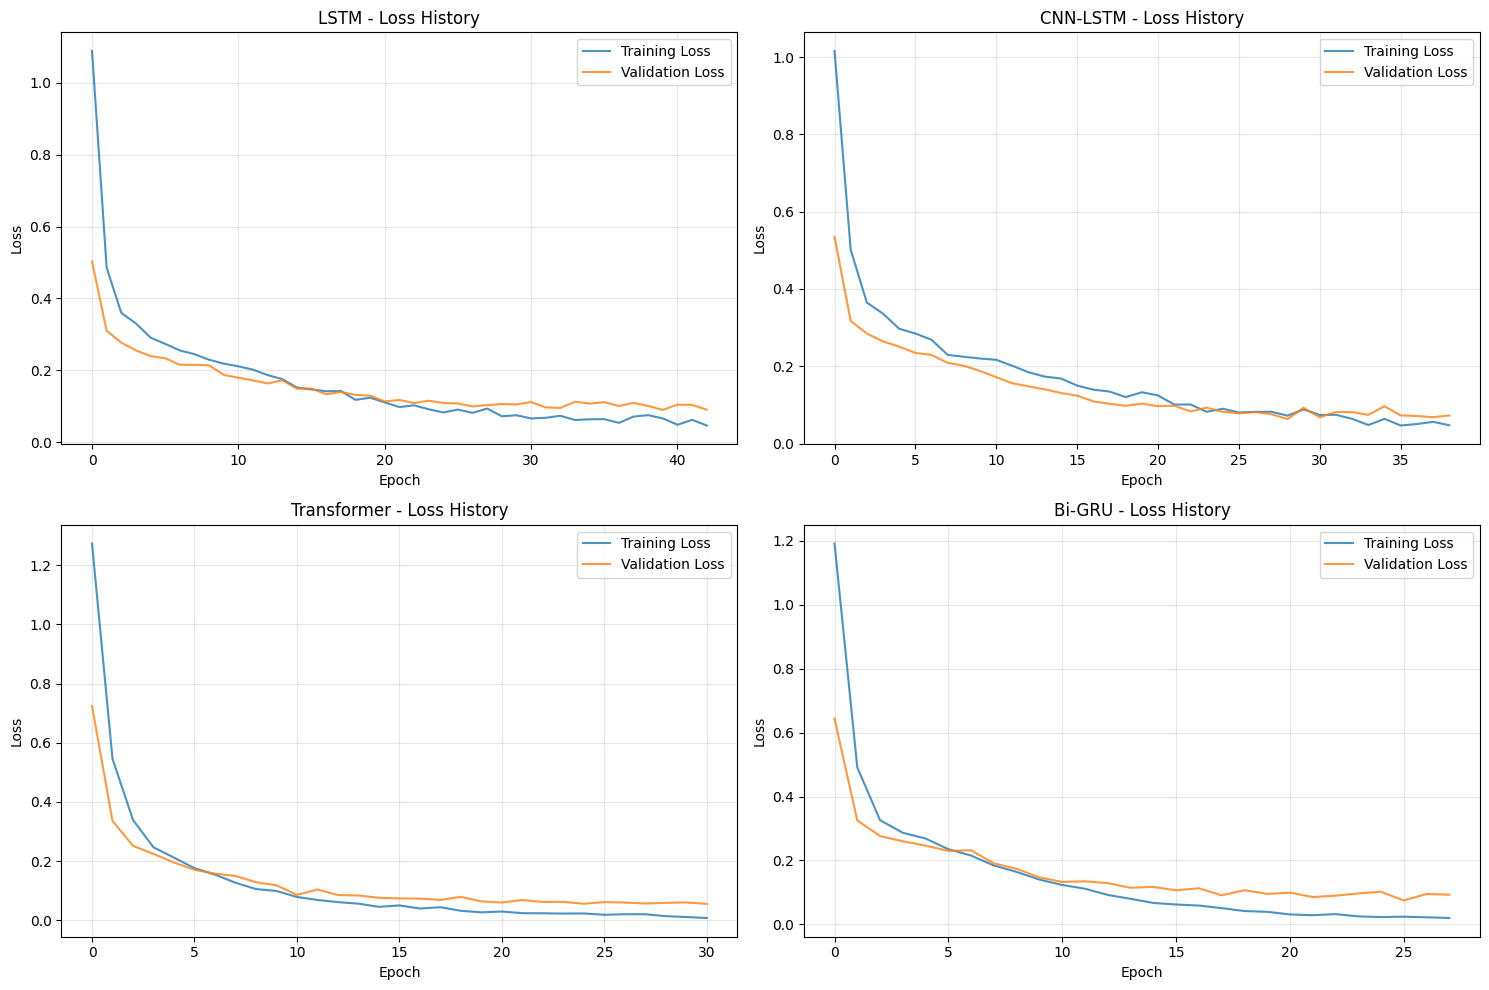

In [52]:
# Plot training histories
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, history) in enumerate(training_histories.items()):
    # Accuracy
    axes[idx].plot(history.history['accuracy'], label='Training Accuracy', alpha=0.8)
    axes[idx].plot(history.history['val_accuracy'], label='Validation Accuracy', alpha=0.8)
    axes[idx].set_title(f'{name} - Training History')
    axes[idx].set_xlabel('Epoch')
    axes[idx].set_ylabel('Accuracy')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Loss curves
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, history) in enumerate(training_histories.items()):
    axes[idx].plot(history.history['loss'], label='Training Loss', alpha=0.8)
    axes[idx].plot(history.history['val_loss'], label='Validation Loss', alpha=0.8)
    axes[idx].set_title(f'{name} - Loss History')
    axes[idx].set_xlabel('Epoch')
    axes[idx].set_ylabel('Loss')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Evaluating models on test set...
LSTM            | Accuracy: 0.9582 | F1-Score: 0.9581
CNN-LSTM        | Accuracy: 0.9734 | F1-Score: 0.9734
Transformer     | Accuracy: 0.9772 | F1-Score: 0.9772
Bi-GRU          | Accuracy: 0.9696 | F1-Score: 0.9696


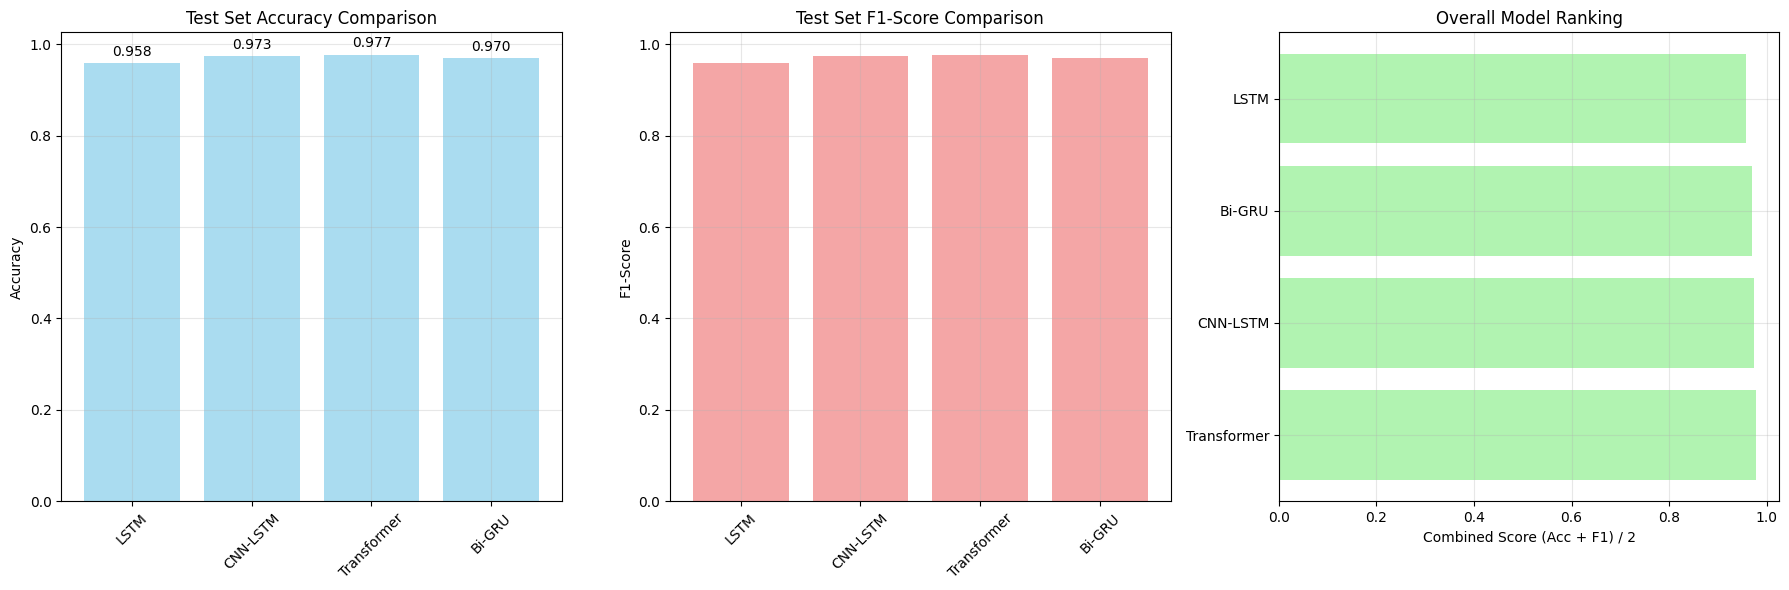


Best Model: Transformer
Best Combined Score: 0.9772


In [54]:
test_results = {}

print("Evaluating models on test set...")
print("=" * 50)

for name, model in trained_models.items():
    # Predictions
    y_pred_proba = model.predict([X_seq_test, X_feat_test], verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Metrics
    test_accuracy = accuracy_score(y_true, y_pred)
    test_f1 = f1_score(y_true, y_pred, average='weighted')

    test_results[name] = {
        'accuracy': test_accuracy,
        'f1_score': test_f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'true_labels': y_true
    }

    print(f"{name:15} | Accuracy: {test_accuracy:.4f} | F1-Score: {test_f1:.4f}")

# Create comparison visualization (3 subplots now)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Accuracy comparison
model_names = list(test_results.keys())
accuracies = [test_results[name]['accuracy'] for name in model_names]
f1_scores = [test_results[name]['f1_score'] for name in model_names]

axes[0].bar(model_names, accuracies, alpha=0.7, color='skyblue')
axes[0].set_title('Test Set Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# 2. F1-Score comparison
axes[1].bar(model_names, f1_scores, alpha=0.7, color='lightcoral')
axes[1].set_title('Test Set F1-Score Comparison')
axes[1].set_ylabel('F1-Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# 3. Model ranking
combined_scores = [(acc + f1) / 2 for acc, f1 in zip(accuracies, f1_scores)]
sorted_indices = np.argsort(combined_scores)[::-1]
sorted_names = [model_names[i] for i in sorted_indices]
sorted_scores = [combined_scores[i] for i in sorted_indices]

axes[2].barh(sorted_names, sorted_scores, alpha=0.7, color='lightgreen')
axes[2].set_xlabel('Combined Score (Acc + F1) / 2')
axes[2].set_title('Overall Model Ranking')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find best model
best_model_name = sorted_names[0]
print(f"\nBest Model: {best_model_name}")
print(f"Best Combined Score: {sorted_scores[0]:.4f}")


DETAILED ANALYSIS OF TOP MODELS


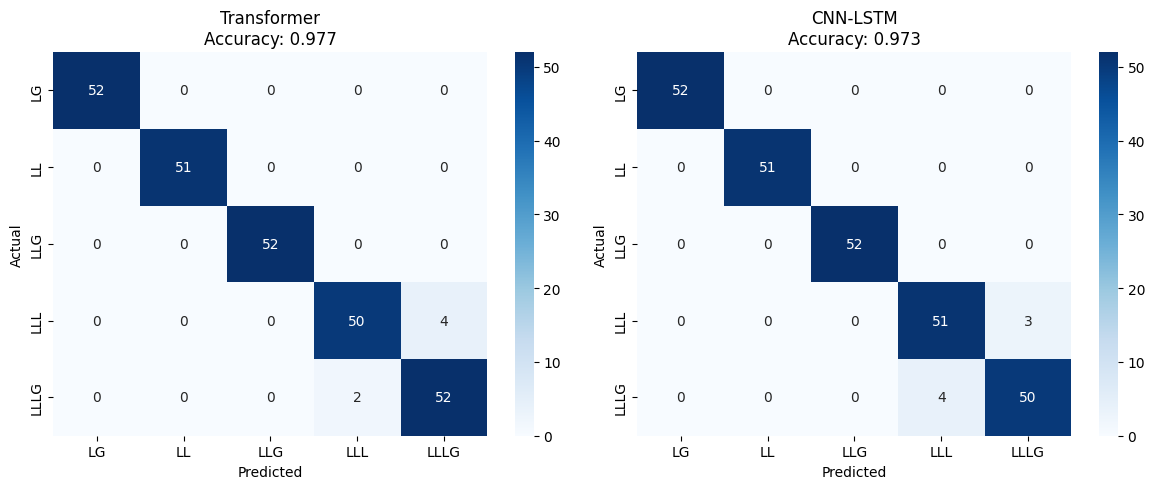


Classification Report - Transformer:
--------------------------------------------------
              precision    recall  f1-score   support

          LG       1.00      1.00      1.00        52
          LL       1.00      1.00      1.00        51
         LLG       1.00      1.00      1.00        52
         LLL       0.96      0.93      0.94        54
        LLLG       0.93      0.96      0.95        54

    accuracy                           0.98       263
   macro avg       0.98      0.98      0.98       263
weighted avg       0.98      0.98      0.98       263


Classification Report - CNN-LSTM:
--------------------------------------------------
              precision    recall  f1-score   support

          LG       1.00      1.00      1.00        52
          LL       1.00      1.00      1.00        51
         LLG       1.00      1.00      1.00        52
         LLL       0.93      0.94      0.94        54
        LLLG       0.94      0.93      0.93        54

    accura

In [55]:
# Analyze top 2 models
top_models = sorted_names[:2]

print("DETAILED ANALYSIS OF TOP MODELS")
print("=" * 50)

# Confusion matrices
fig, axes = plt.subplots(1, len(top_models), figsize=(6*len(top_models), 5))
if len(top_models) == 1:
    axes = [axes]

for i, model_name in enumerate(top_models):
    y_pred = test_results[model_name]['predictions']
    y_true = test_results[model_name]['true_labels']
    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_,
                ax=axes[i])
    axes[i].set_title(f'{model_name}\nAccuracy: {test_results[model_name]["accuracy"]:.3f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Classification reports
for model_name in top_models:
    print(f"\nClassification Report - {model_name}:")
    print("-" * 50)
    y_pred = test_results[model_name]['predictions']
    y_true = test_results[model_name]['true_labels']
    print(classification_report(y_true, y_pred, target_names=le.classes_))

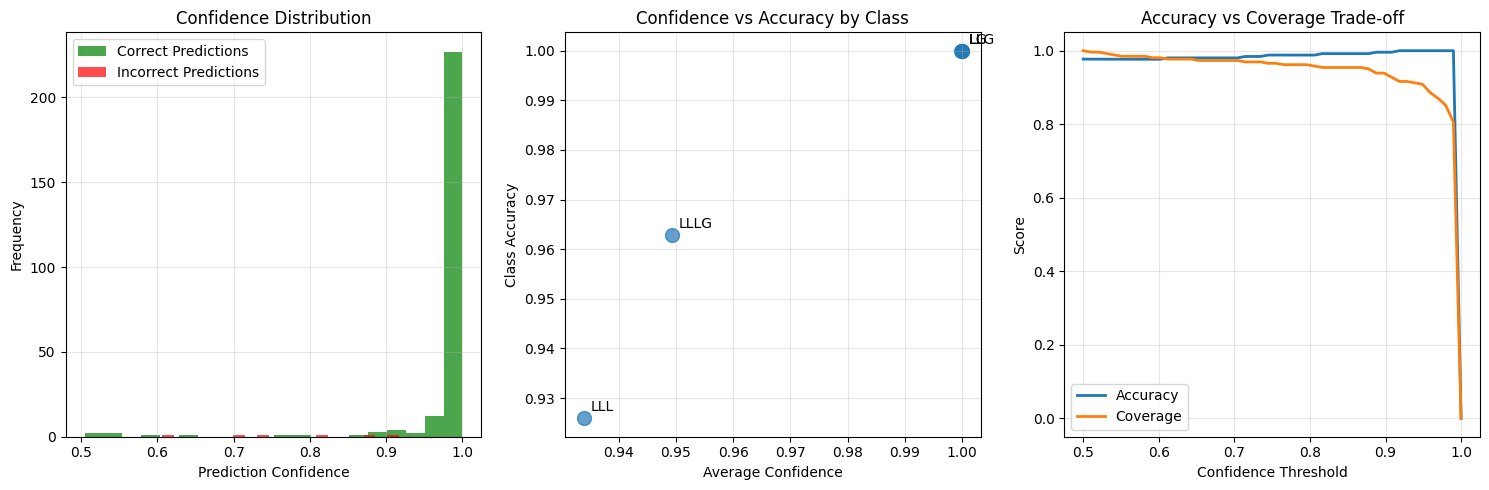


Confidence Analysis for Transformer:
Average confidence (correct): 0.981
Average confidence (incorrect): 0.777
High confidence predictions (>0.9): 93.5%


In [56]:
# Analyze prediction confidence for the best model
best_model = trained_models[best_model_name]
y_pred_proba = test_results[best_model_name]['probabilities']
y_pred = test_results[best_model_name]['predictions']
y_true = test_results[best_model_name]['true_labels']

# Calculate prediction confidence
confidence_scores = np.max(y_pred_proba, axis=1)
correct_predictions = (y_pred == y_true)

# Confidence analysis
plt.figure(figsize=(15, 5))

# 1. Confidence distribution
plt.subplot(1, 3, 1)
plt.hist(confidence_scores[correct_predictions], bins=20, alpha=0.7,
         label='Correct Predictions', color='green')
plt.hist(confidence_scores[~correct_predictions], bins=20, alpha=0.7,
         label='Incorrect Predictions', color='red')
plt.xlabel('Prediction Confidence')
plt.ylabel('Frequency')
plt.title('Confidence Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Confidence vs Accuracy by class
plt.subplot(1, 3, 2)
class_confidences = []
class_accuracies = []
for class_idx in range(n_classes):
    class_mask = (y_true == class_idx)
    if np.sum(class_mask) > 0:
        class_conf = np.mean(confidence_scores[class_mask])
        class_acc = np.mean(y_pred[class_mask] == y_true[class_mask])
        class_confidences.append(class_conf)
        class_accuracies.append(class_acc)
    else:
        class_confidences.append(0)
        class_accuracies.append(0)

plt.scatter(class_confidences, class_accuracies, s=100, alpha=0.7)
for i, class_name in enumerate(le.classes_):
    plt.annotate(class_name, (class_confidences[i], class_accuracies[i]),
                xytext=(5, 5), textcoords='offset points')
plt.xlabel('Average Confidence')
plt.ylabel('Class Accuracy')
plt.title('Confidence vs Accuracy by Class')
plt.grid(True, alpha=0.3)

# 3. Confidence threshold analysis
plt.subplot(1, 3, 3)
thresholds = np.linspace(0.5, 1.0, 50)
accuracies_at_threshold = []
coverage_at_threshold = []

for threshold in thresholds:
    high_conf_mask = confidence_scores >= threshold
    if np.sum(high_conf_mask) > 0:
        acc = np.mean(y_pred[high_conf_mask] == y_true[high_conf_mask])
        coverage = np.mean(high_conf_mask)
    else:
        acc = 0
        coverage = 0
    accuracies_at_threshold.append(acc)
    coverage_at_threshold.append(coverage)

plt.plot(thresholds, accuracies_at_threshold, label='Accuracy', linewidth=2)
plt.plot(thresholds, coverage_at_threshold, label='Coverage', linewidth=2)
plt.xlabel('Confidence Threshold')
plt.ylabel('Score')
plt.title('Accuracy vs Coverage Trade-off')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nConfidence Analysis for {best_model_name}:")
print(f"Average confidence (correct): {np.mean(confidence_scores[correct_predictions]):.3f}")
print(f"Average confidence (incorrect): {np.mean(confidence_scores[~correct_predictions]):.3f}")
print(f"High confidence predictions (>0.9): {np.mean(confidence_scores > 0.9)*100:.1f}%")

Analyzing attention patterns in Transformer model...


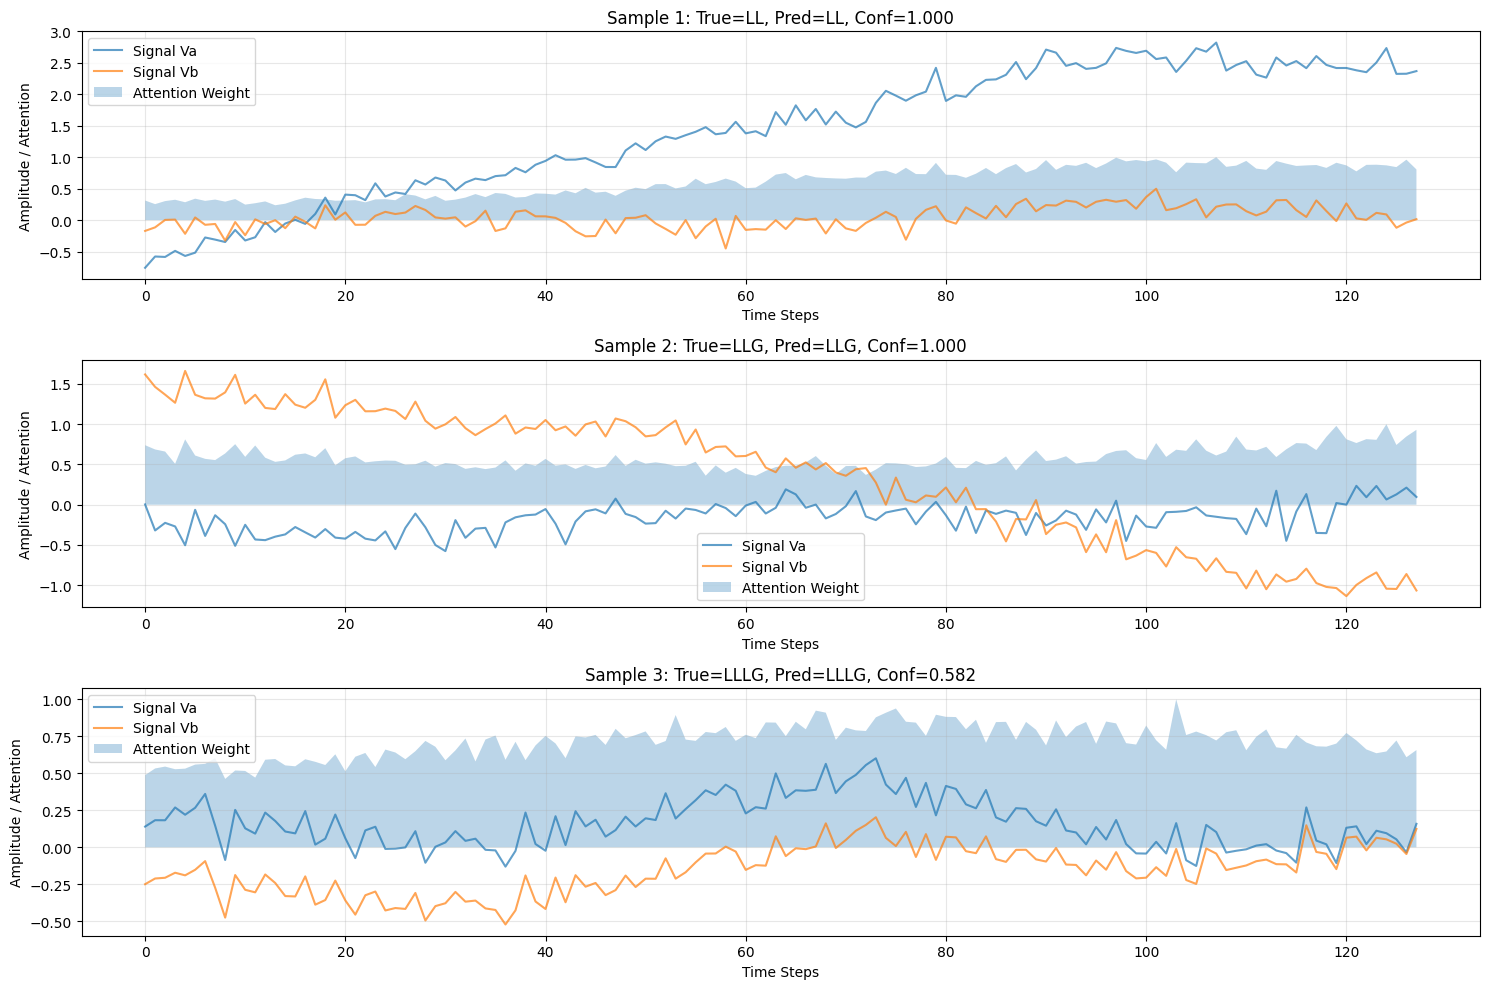

In [57]:
# For transformer model, visualize attention weights
if 'Transformer' in trained_models:
    print("Analyzing attention patterns in Transformer model...")

    # Create a model that outputs attention weights
    transformer_model = trained_models['Transformer']

    # Get a few samples for attention visualization
    sample_indices = np.random.choice(len(X_seq_test), 3, replace=False)
    sample_sequences = X_seq_test[sample_indices]
    sample_features = X_feat_test[sample_indices]
    sample_labels = y_true[sample_indices]

    # Predict to get attention patterns (simplified visualization)
    predictions = transformer_model.predict([sample_sequences, sample_features], verbose=0)

    # Plot attention-like patterns (simplified visualization)
    plt.figure(figsize=(15, 10))

    for i in range(3):
        plt.subplot(3, 1, i+1)

        # Simple attention visualization using sequence variance
        sequence = sample_sequences[i]
        attention_weights = np.var(sequence, axis=1)  # Simple proxy for attention
        attention_weights = attention_weights / np.max(attention_weights)  # Normalize

        plt.plot(sequence[:, 0], alpha=0.7, label='Signal Va')
        plt.plot(sequence[:, 1], alpha=0.7, label='Signal Vb')
        plt.fill_between(range(len(attention_weights)), 0, attention_weights,
                        alpha=0.3, label='Attention Weight')

        predicted_class = le.classes_[np.argmax(predictions[i])]
        true_class = le.classes_[sample_labels[i]]
        confidence = np.max(predictions[i])

        plt.title(f'Sample {i+1}: True={true_class}, Pred={predicted_class}, Conf={confidence:.3f}')
        plt.xlabel('Time Steps')
        plt.ylabel('Amplitude / Attention')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

ANALYZING MODEL PREDICTIONS BY FAULT TYPE

LG Analysis:
  Samples: 52
  Accuracy: 1.000
  Avg Confidence: 1.000
  Confusion: {np.str_('LG'): np.int64(52)}

LL Analysis:
  Samples: 51
  Accuracy: 1.000
  Avg Confidence: 1.000
  Confusion: {np.str_('LL'): np.int64(51)}

LLG Analysis:
  Samples: 52
  Accuracy: 1.000
  Avg Confidence: 1.000
  Confusion: {np.str_('LLG'): np.int64(52)}

LLL Analysis:
  Samples: 54
  Accuracy: 0.926
  Avg Confidence: 0.934
  Confusion: {np.str_('LLL'): np.int64(50), np.str_('LLLG'): np.int64(4)}

LLLG Analysis:
  Samples: 54
  Accuracy: 0.963
  Avg Confidence: 0.949
  Confusion: {np.str_('LLL'): np.int64(2), np.str_('LLLG'): np.int64(52)}


<Figure size 1200x800 with 0 Axes>

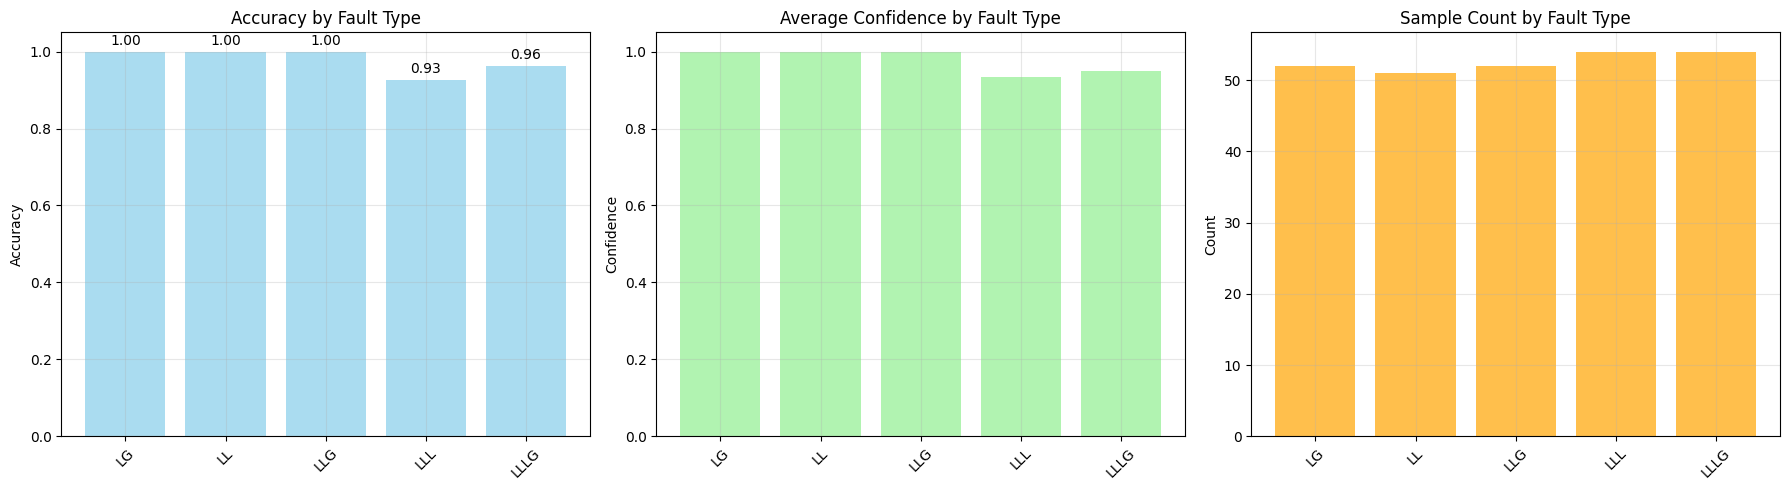

In [58]:
# Analyze what the models learn from different fault types
print("ANALYZING MODEL PREDICTIONS BY FAULT TYPE")
print("=" * 50)

# Get predictions for each fault type
fault_analysis = {}
for fault_type in le.classes_:
    fault_idx = le.transform([fault_type])[0]
    fault_mask = (y_true == fault_idx)

    if np.sum(fault_mask) > 0:
        fault_predictions = y_pred[fault_mask]
        fault_confidences = confidence_scores[fault_mask]
        fault_accuracy = np.mean(fault_predictions == y_true[fault_mask])

        # Most confused classes
        unique_preds, pred_counts = np.unique(fault_predictions, return_counts=True)
        confusion_dict = {le.classes_[pred]: count for pred, count in zip(unique_preds, pred_counts)}

        fault_analysis[fault_type] = {
            'accuracy': fault_accuracy,
            'avg_confidence': np.mean(fault_confidences),
            'sample_count': np.sum(fault_mask),
            'confusion': confusion_dict
        }

# Display analysis
for fault_type, analysis in fault_analysis.items():
    print(f"\n{fault_type} Analysis:")
    print(f"  Samples: {analysis['sample_count']}")
    print(f"  Accuracy: {analysis['accuracy']:.3f}")
    print(f"  Avg Confidence: {analysis['avg_confidence']:.3f}")
    print(f"  Confusion: {analysis['confusion']}")

# Visualize per-class performance
plt.figure(figsize=(12, 8))

fault_types = list(fault_analysis.keys())
accuracies = [fault_analysis[ft]['accuracy'] for ft in fault_types]
confidences = [fault_analysis[ft]['avg_confidence'] for ft in fault_types]
sample_counts = [fault_analysis[ft]['sample_count'] for ft in fault_types]

# Create subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Per-class accuracy
bars1 = ax1.bar(fault_types, accuracies, alpha=0.7, color='skyblue')
ax1.set_title('Accuracy by Fault Type')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Add values on bars
for bar, acc in zip(bars1, accuracies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.2f}', ha='center', va='bottom')

# Per-class confidence
bars2 = ax2.bar(fault_types, confidences, alpha=0.7, color='lightgreen')
ax2.set_title('Average Confidence by Fault Type')
ax2.set_ylabel('Confidence')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Sample distribution
bars3 = ax3.bar(fault_types, sample_counts, alpha=0.7, color='orange')
ax3.set_title('Sample Count by Fault Type')
ax3.set_ylabel('Count')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [60]:
print("SAVING BEST MODEL AND COMPONENTS")
print("=" * 50)

best_model = trained_models[best_model_name]
best_accuracy = test_results[best_model_name]['accuracy']
best_f1 = test_results[best_model_name]['f1_score']

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f}")
print(f"F1 Score: {best_f1:.4f}")

# Save the model
best_model.save('best_fault_classifier.h5')
print("✓ best_fault_classifier.h5 - Complete Keras model saved")

# Save preprocessing components
joblib.dump(seq_scaler, 'sequence_scaler.joblib')
joblib.dump(feat_scaler, 'feature_scaler.joblib')
joblib.dump(le, 'label_encoder.joblib')
print("✓ sequence_scaler.joblib - Sequence data scaler")
print("✓ feature_scaler.joblib - Feature data scaler")
print("✓ label_encoder.joblib - Label encoder")

# Save model metadata
model_metadata = {
    'model_name': best_model_name,
    'model_type': 'deep_learning',
    'sequence_length': SEQUENCE_LENGTH,
    'n_features': X_feat_train.shape[1],
    'n_classes': n_classes,
    'class_names': le.classes_.tolist(),
    'performance': {
        'test_accuracy': best_accuracy,
        'f1_score': best_f1,
        'training_epochs': len(training_histories[best_model_name].history['accuracy'])
    },
    'preprocessing': {
        'sequence_scaler_type': 'StandardScaler',
        'feature_scaler_type': 'StandardScaler',
        'augmentation_factor': 8
    }
}

joblib.dump(model_metadata, 'model_metadata.joblib')
print("✓ model_metadata.joblib - Model configuration and metadata")

# Create complete package
complete_package = {
    'model_path': 'best_fault_classifier.h5',
    'sequence_scaler': seq_scaler,
    'feature_scaler': feat_scaler,
    'label_encoder': le,
    'metadata': model_metadata,
    'fault_intervals': fault_intervals,
    'extraction_params': {
        'sequence_length': SEQUENCE_LENGTH,
        'signal_columns': ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']
    }
}

joblib.dump(complete_package, 'complete_dl_fault_system.joblib')
print("✓ complete_dl_fault_system.joblib - Complete system package")

SAVING BEST MODEL AND COMPONENTS
Best Model: Transformer
Test Accuracy: 0.9772
F1 Score: 0.9772
✓ best_fault_classifier.h5 - Complete Keras model saved
✓ sequence_scaler.joblib - Sequence data scaler
✓ feature_scaler.joblib - Feature data scaler
✓ label_encoder.joblib - Label encoder
✓ model_metadata.joblib - Model configuration and metadata
✓ complete_dl_fault_system.joblib - Complete system package


# Test on new Data

In [62]:
from joblib import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import joblib
from matplotlib.patches import Rectangle
import seaborn as sns

# Set style for better aesthetics
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [63]:
from joblib import load

# Load the saved scaler
scaler = load('scaler.save')  # Loads the scaler object

In [64]:
import tensorflow as tf
# Load the saved autoencoder (replace with your model path)
autoencoder = tf.keras.models.load_model(
    '/content/lstm_autoencoder_anomaly_detection.h5',
    custom_objects={'mse': 'mse'}  # Map 'mse' to Keras' built-in MSE
)

In [65]:
def preprocess_new_data(new_data, scaler, sequence_length):
    # Normalize using the same scaler
    scaled_data = scaler.transform(new_data[['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']])

    # Create sequences
    X_new = []
    for i in range(len(scaled_data) - sequence_length + 1):
        X_new.append(scaled_data[i:i+sequence_length])
    return np.array(X_new)

# Example usage
sequence_length = 50  # Same as in the model
new_data = pd.read_csv('/content/simData2.csv')  # Load new data
X_new_sequences = preprocess_new_data(new_data, scaler, sequence_length)

374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


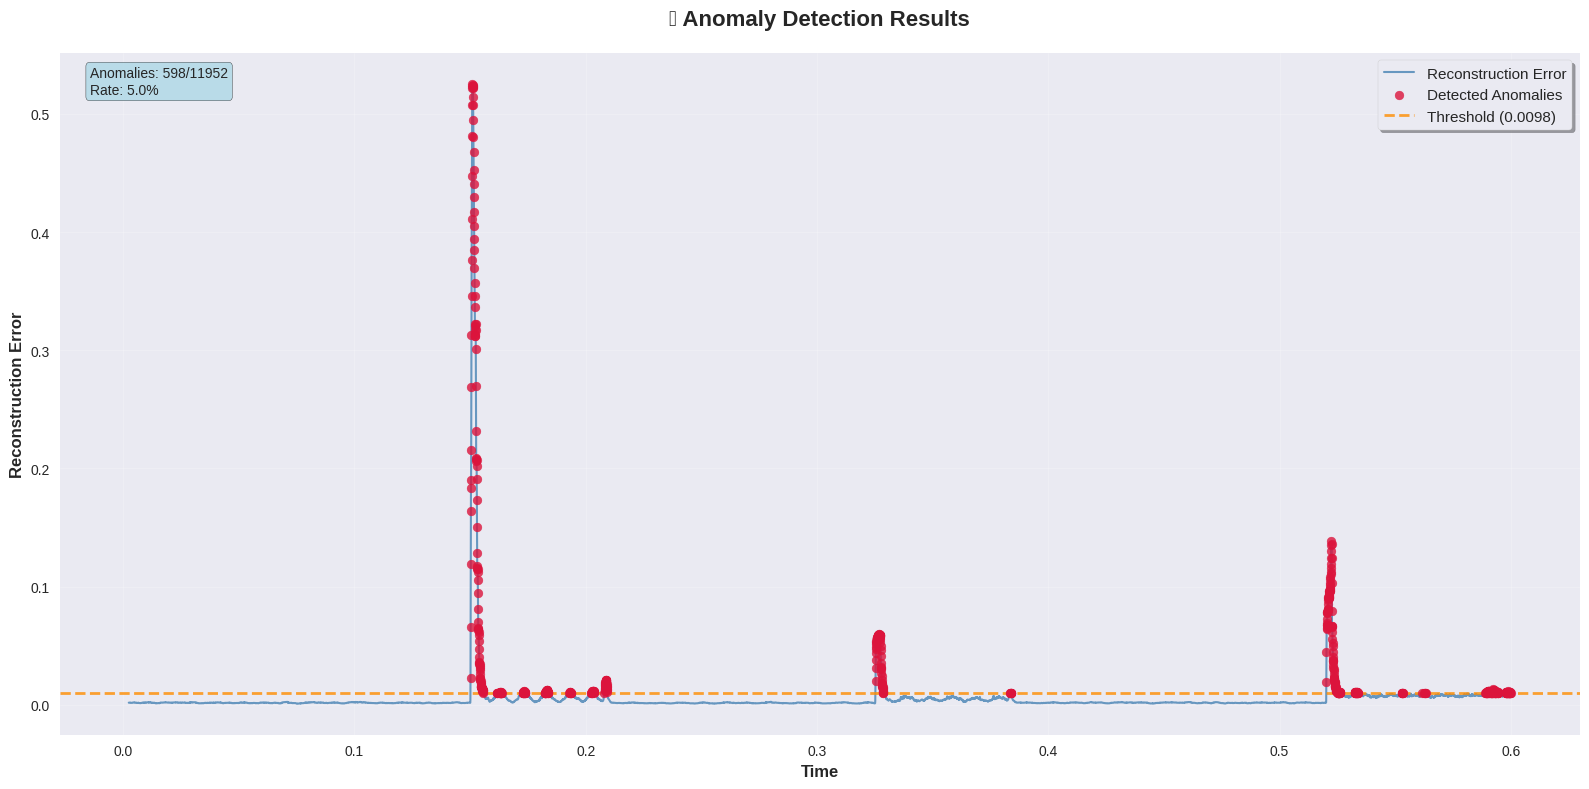

In [66]:
# Get reconstruction errors
new_reconstructions = autoencoder.predict(X_new_sequences)
new_mse = np.mean(np.square(X_new_sequences - new_reconstructions), axis=(1,2))

# Dynamic threshold (e.g., 99th percentile)
new_threshold = np.percentile(new_mse, 95)  # More conservative than training

# Apply the same threshold used in training
anomalies_new = new_mse > new_threshold  # `threshold` from Step 5 in training

# Get timestamps for new data (aligned with window end times)
time_new = new_data['Time'].values[sequence_length - 1 :]

# Enhanced visualization for reconstruction errors
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(time_new, new_mse, label='Reconstruction Error', color='steelblue', linewidth=1.5, alpha=0.8)
ax.scatter(
    time_new[anomalies_new],
    new_mse[anomalies_new],
    color='crimson', label='Detected Anomalies', s=40, alpha=0.8, zorder=5
)
ax.axhline(new_threshold, color='darkorange', linestyle='--', linewidth=2,
           label=f'Threshold ({new_threshold:.4f})', alpha=0.8)

# Styling
ax.set_xlabel('Time', fontsize=12, fontweight='bold')
ax.set_ylabel('Reconstruction Error', fontsize=12, fontweight='bold')
ax.set_title('🔍 Anomaly Detection Results', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, frameon=True, fancybox=True, shadow=True)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add statistics box
anomaly_count = np.sum(anomalies_new)
total_windows = len(anomalies_new)
anomaly_rate = (anomaly_count / total_windows) * 100

textstr = f'Anomalies: {anomaly_count}/{total_windows}\nRate: {anomaly_rate:.1f}%'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()


In [67]:
# Get anomaly window indices (positions in new_anomalies)
anomaly_window_indices = np.where(anomalies_new)[0]

# Convert window indices to original data time intervals
original_intervals = []
for win_idx in anomaly_window_indices:
    # Each window starts at index `win_idx` and spans `sequence_length` samples
    start_idx = win_idx
    end_idx = win_idx + sequence_length - 1
    start_time = new_data['Time'].iloc[start_idx]
    end_time = new_data['Time'].iloc[end_idx]
    original_intervals.append((start_time, end_time))

In [68]:
def merge_intervals(intervals, max_gap_samples=500):
    if not intervals:
        return []

    # Calculate time per sample (assuming uniform sampling)
    sample_time = new_data['Time'].iloc[1] - new_data['Time'].iloc[0]
    max_gap_time = max_gap_samples * sample_time

    # Sort intervals by start time
    sorted_intervals = sorted(intervals, key=lambda x: x[0])

    merged = [list(sorted_intervals[0])]
    for current_start, current_end in sorted_intervals[1:]:
        last_start, last_end = merged[-1]

        # Check gap between last interval's end and current interval's start
        if current_start <= last_end + max_gap_time:
            # Merge intervals
            merged[-1][1] = max(last_end, current_end)
        else:
            merged.append([current_start, current_end])

    return [tuple(interval) for interval in merged]

# Merge intervals with ≤500-sample gaps
merged_intervals = merge_intervals(original_intervals, max_gap_samples=1500)

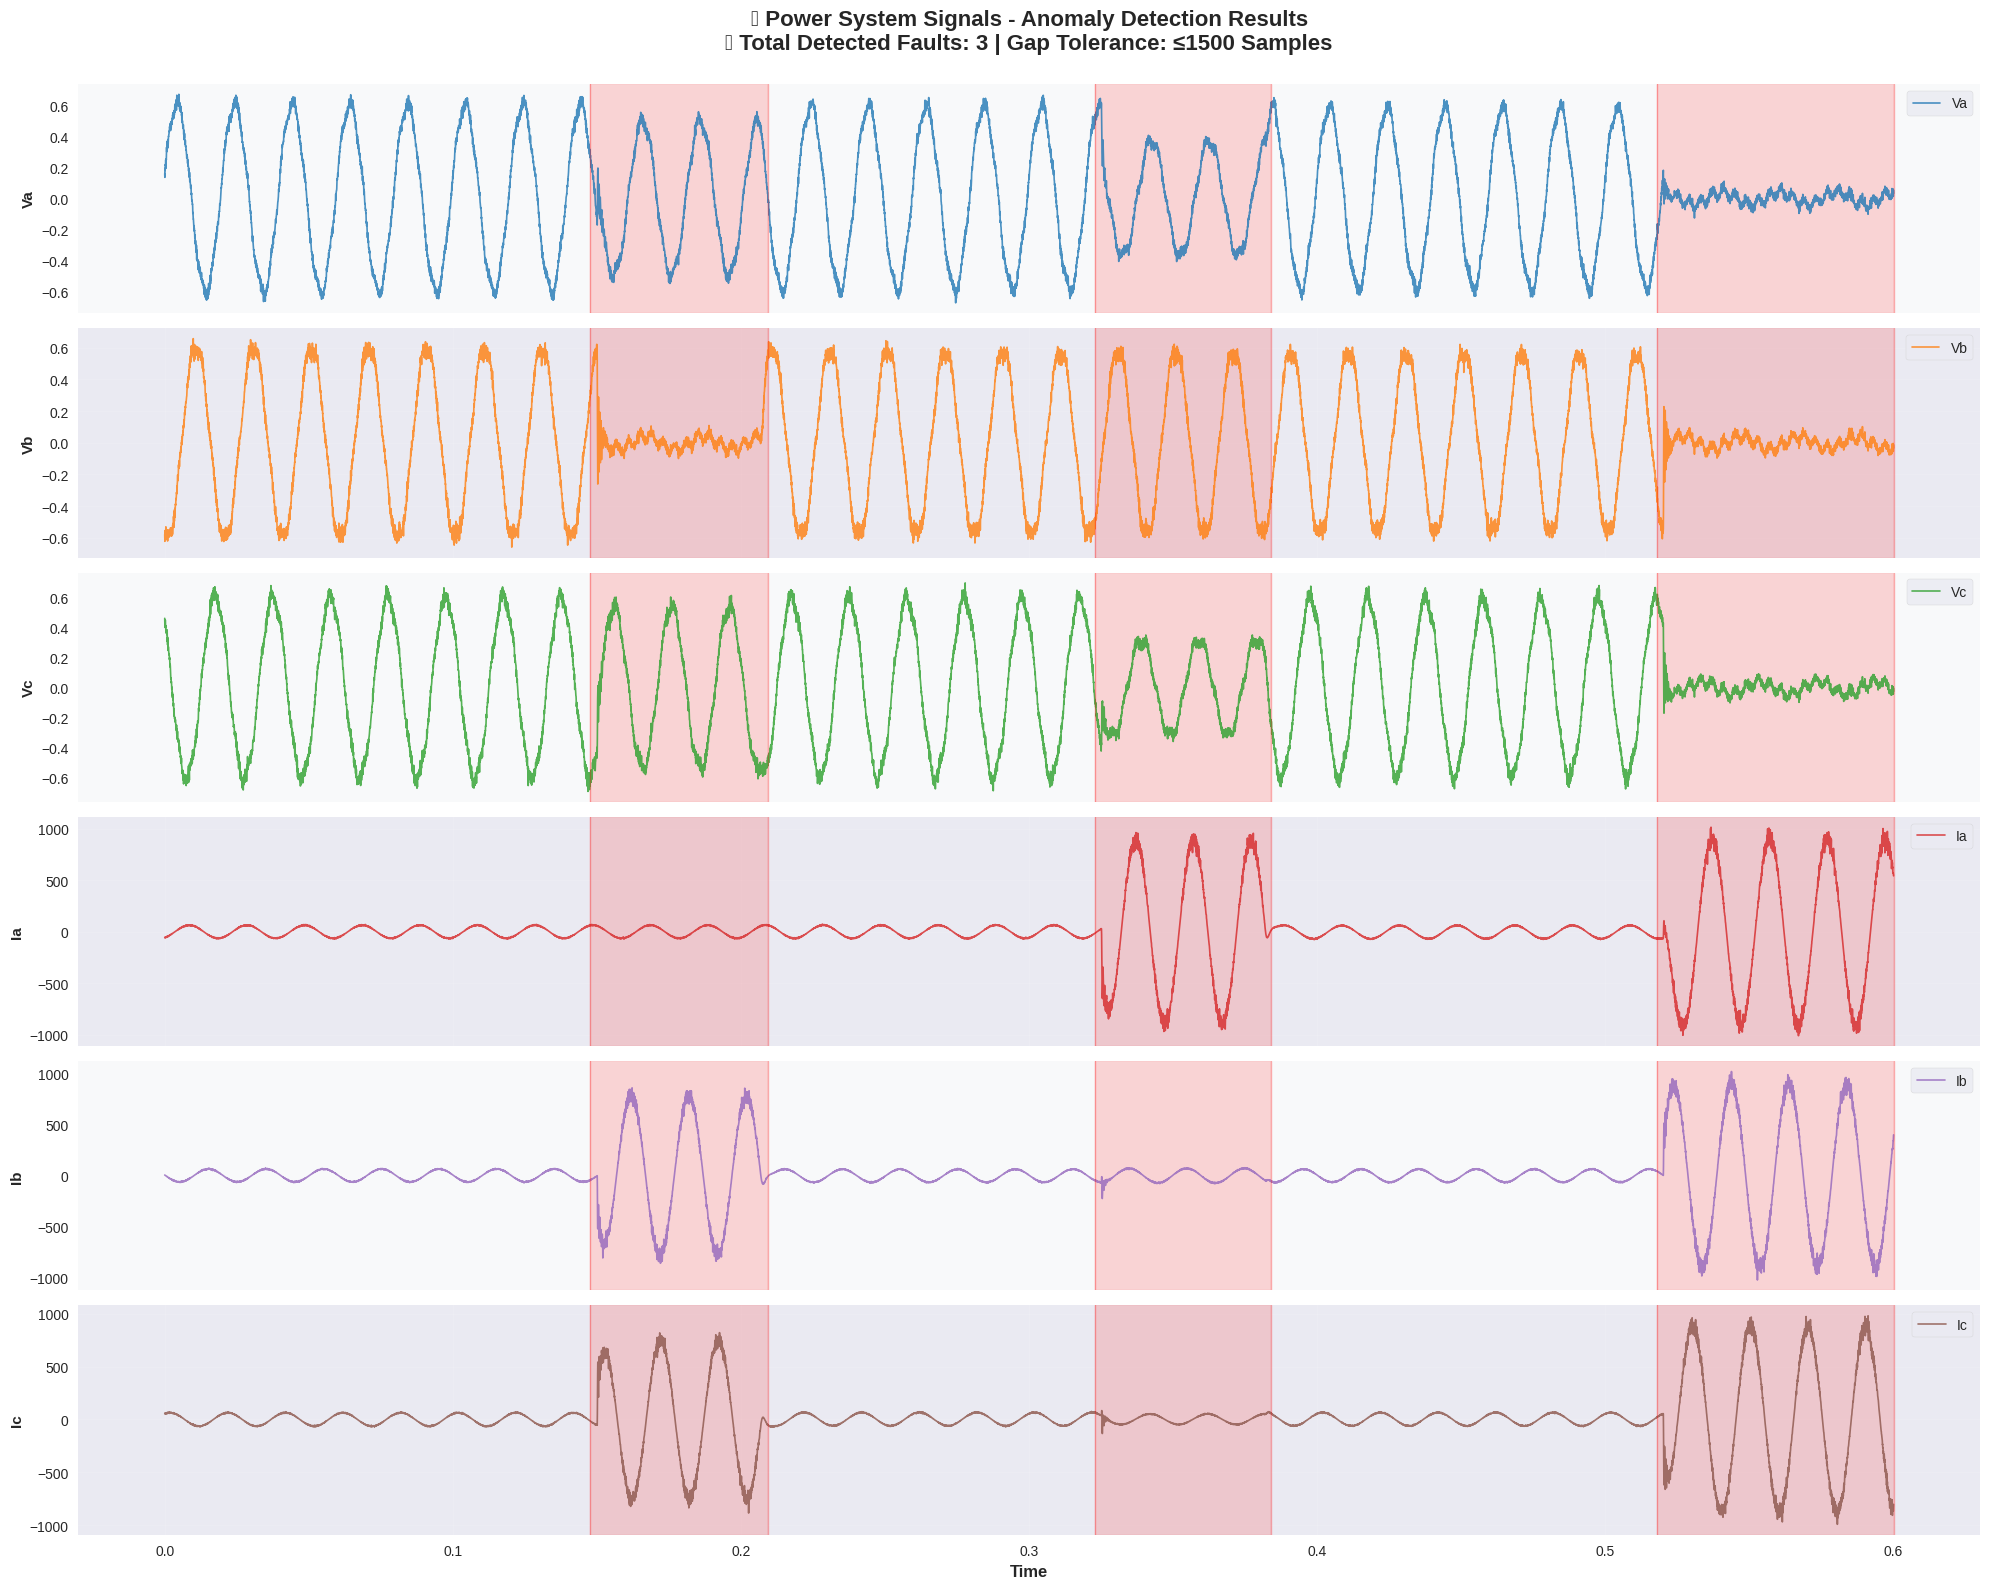

In [69]:
fig, axes = plt.subplots(6, 1, figsize=(20, 16), sharex=True)
signals = ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for ax, signal, color in zip(axes, signals, colors):
    # Plot raw signal with enhanced styling
    ax.plot(new_data['Time'], new_data[signal], color=color, label=signal,
            linewidth=1.2, alpha=0.8)

    # Highlight merged anomaly intervals with gradient effect
    for i, (start, end) in enumerate(merged_intervals):
        ax.axvspan(start, end, color='red', alpha=0.15, zorder=1)
        # Add a subtle border
        ax.axvline(start, color='red', alpha=0.3, linewidth=1, linestyle='-')
        ax.axvline(end, color='red', alpha=0.3, linewidth=1, linestyle='-')

    # Styling improvements
    ax.set_ylabel(signal, fontsize=11, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10, frameon=True, fancybox=True)
    ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add subtle background color alternation
    if signals.index(signal) % 2 == 0:
        ax.set_facecolor('#f8f9fa')

axes[0].set_title(
    f' Power System Signals - Anomaly Detection Results\n'
    f' Total Detected Faults: {len(merged_intervals)} | Gap Tolerance: ≤1500 Samples',
    fontsize=16, fontweight='bold', pad=25
)

axes[-1].set_xlabel('Time', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

classification random forest

In [ ]:
# 2. Prediction Function for New Data ======================================
def predict_anomaly_intervals(new_data, interval_list):
    """
    Predict fault types for new anomaly intervals with enhanced output
    Args:
        new_data: DataFrame with Time, Va, Vb, Vc, Ia, Ib, Ic
        interval_list: List of [start, end] time intervals to classify
    Returns:
        DataFrame with predictions and confidence scores
    """
    print(" Loading classification models...")

    # Load artifacts
    model = joblib.load('classifier.joblib')
    scaler = joblib.load('classifier_scaler.joblib')

    # Load or define class names mapping
    classes = joblib.load('class_names.joblib')

    print(" Extracting features from anomaly intervals...")

    # Feature extraction
    features = []
    for interval in interval_list:
        features.append(extract_features(new_data, interval))
    X_new = pd.DataFrame(features)

    # Preprocessing
    X_new_scaled = scaler.transform(X_new)

    print(" Making predictions...")

    # Predictions
    preds = model.predict(X_new_scaled)

    # Decode predictions to class names
    pred_names = [classes[pred] if pred < len(classes) else f'Unknown Class {pred}' for pred in preds]

    # Confidence scores (if supported)
    if hasattr(model, 'predict_proba'):
        probas = model.predict_proba(X_new_scaled)
        confidences = np.max(probas, axis=1)
    else:  # For models without probability estimates
        confidences = np.ones(len(preds)) * np.nan

    return pd.DataFrame({
        'start_time': [i[0] for i in interval_list],
        'end_time': [i[1] for i in interval_list],
        'predicted_fault_code': preds,
        'predicted_fault_type': pred_names,
        'confidence': confidences
    })

In [ ]:
# Load new unlabeled data
new_data = pd.read_csv('/content/simData2.csv')

# Get detected intervals
detected_intervals = merged_intervals

if detected_intervals:
    # Get predictions
    predictions = predict_anomaly_intervals(new_data, detected_intervals)

    def format_predictions(predictions_df):

        # Format confidence
        predictions_df['confidence_pct'] = predictions_df['confidence'].apply(
            lambda x: f"{x:.1%}" if not np.isnan(x) else 'N/A')

        # Sort by start time
        return predictions_df.sort_values('start_time').reset_index(drop=True)

    # Display formatted results
    formatted_results = format_predictions(predictions)

    print("\n" + "="*80)
    print(" ANOMALY CLASSIFICATION RESULTS")
    print("="*80)

    # Create a summary table with better formatting
    display_cols = ['start_time', 'end_time', 'predicted_fault_type', 'confidence_pct']
    display_df = formatted_results[display_cols].copy()

    # Rename columns for better display
    display_df.columns = ['Start Time', 'End Time', 'Fault Type', 'Confidence']

    print(display_df.to_string(index=False, max_rows=50))

    # Add summary statistics
    print("\n" + "="*80)
    print(" SUMMARY STATISTICS")
    print("="*80)

    fault_counts = formatted_results['predicted_fault_type'].value_counts()
    print("\n Fault Type Distribution:")
    for fault_type, count in fault_counts.items():
        percentage = (count / len(formatted_results)) * 100
        print(f"   • {fault_type}: {count} ({percentage:.1f}%)")

    if not formatted_results['confidence'].isna().all():
        avg_confidence = formatted_results['confidence'].mean()
        print(f" Average Confidence: {avg_confidence:.1%}")

    print("="*80)

else:
    print("\n No anomalies detected in the provided data!")
    print(" The system appears to be operating normally.")

 Loading classification models...
 Extracting features from anomaly intervals...
 Making predictions...

 ANOMALY CLASSIFICATION RESULTS
 Start Time  End Time Fault Type Confidence
    0.14775   0.20925         LL      81.0%
    0.32285   0.38390         LG      80.0%
    0.51775   0.60000        LLL      40.0%

 SUMMARY STATISTICS

 Fault Type Distribution:
   • LL: 1 (33.3%)
   • LG: 1 (33.3%)
   • LLL: 1 (33.3%)
 Average Confidence: 67.0%


classification using transformer

In [80]:
# Load the saved classification model and components
try:
    classifier = tf.keras.models.load_model('best_fault_classifier.h5')
    complete_package = load('complete_dl_fault_system.joblib')

    seq_scaler = complete_package['sequence_scaler']
    feat_scaler = complete_package['feature_scaler']
    label_encoder = complete_package['label_encoder']
    metadata = complete_package['metadata']

    CLASSIFICATION_SEQUENCE_LENGTH = metadata['sequence_length']  # Should be 128

    print("✓ Classification model and components loaded successfully!")
    print(f"✓ Model expects sequence length: {CLASSIFICATION_SEQUENCE_LENGTH}")
    print(f"✓ Available fault types: {label_encoder.classes_}")

except Exception as e:
    print(f"❌ Error loading classification model: {e}")
    print("Please ensure the classification model files are available.")
    exit()

def extract_statistical_features(window, signal_columns):
    """Extract statistical features as auxiliary information."""
    features = []

    for signal in signal_columns:
        if signal in window.columns:
            sig_data = window[signal].values
            if len(sig_data) > 1:
                features.extend([
                    np.mean(sig_data),
                    np.std(sig_data),
                    skew(sig_data),
                    kurtosis(sig_data),
                    np.sqrt(np.mean(sig_data ** 2)),  # RMS
                    np.ptp(sig_data),  # Peak-to-peak
                    np.max(np.abs(sig_data)) / (np.sqrt(np.mean(sig_data ** 2)) + 1e-9)  # Crest factor
                ])

    # Cross-signal correlations
    try:
        if len(window) > 1 and len(signal_columns) >= 2:
            for i in range(len(signal_columns)-1):
                for j in range(i+1, len(signal_columns)):
                    if signal_columns[i] in window.columns and signal_columns[j] in window.columns:
                        corr = np.corrcoef(window[signal_columns[i]], window[signal_columns[j]])[0,1]
                        features.append(corr if not np.isnan(corr) else 0)
    except:
        pass

    return np.array(features)

def classify_fault_interval(interval_start, interval_end):
    """Classify a single fault interval."""
    # Extract data from the interval
    start_idx = np.searchsorted(new_data['Time'], interval_start)
    end_idx = np.searchsorted(new_data['Time'], interval_end)
    window = new_data.iloc[start_idx:end_idx]

    if len(window) < CLASSIFICATION_SEQUENCE_LENGTH:
        return None, None, "Insufficient data"

    # Extract signal columns
    signal_columns = ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']
    available_signals = [col for col in signal_columns if col in window.columns]

    if not available_signals:
        return None, None, "No signal data"

    # Create time series sequences
    time_series_data = window[available_signals].values

    # Take the middle sequence for classification
    if len(time_series_data) >= CLASSIFICATION_SEQUENCE_LENGTH:
        mid_start = (len(time_series_data) - CLASSIFICATION_SEQUENCE_LENGTH) // 2
        sequence = time_series_data[mid_start:mid_start + CLASSIFICATION_SEQUENCE_LENGTH]

        # Scale the sequence
        sequence_reshaped = sequence.reshape(-1, sequence.shape[-1])
        sequence_scaled = seq_scaler.transform(sequence_reshaped)
        sequence_scaled = sequence_scaled.reshape(sequence.shape)

        # Extract statistical features
        features = extract_statistical_features(window, available_signals)
        features_scaled = feat_scaler.transform(features.reshape(1, -1))

        # Prepare inputs for the model
        X_seq = sequence_scaled.reshape(1, CLASSIFICATION_SEQUENCE_LENGTH, len(available_signals))
        X_feat = features_scaled

        # Make prediction
        predictions = classifier.predict([X_seq, X_feat], verbose=0)
        predicted_class_idx = np.argmax(predictions[0])
        confidence = np.max(predictions[0])
        predicted_fault_type = label_encoder.classes_[predicted_class_idx]

        return predicted_fault_type, confidence, "Success"

    return None, None, "Processing error"

✓ Classification model and components loaded successfully!
✓ Model expects sequence length: 128
✓ Available fault types: ['LG' 'LL' 'LLG' 'LLL' 'LLLG']


In [81]:
# Classify each detected fault interval
print(f"\n🔍 Classifying {len(merged_intervals)} detected fault intervals:")
print("-" * 50)

classification_results = []
for i, (start_time, end_time) in enumerate(merged_intervals):
    fault_type, confidence, status = classify_fault_interval(start_time, end_time)

    result = {
        'interval': i + 1,
        'start_time': start_time,
        'end_time': end_time,
        'duration': end_time - start_time,
        'fault_type': fault_type,
        'confidence': confidence,
        'status': status
    }
    classification_results.append(result)

    if fault_type:
        print(f"Fault {i+1}: [{start_time:.3f} - {end_time:.3f}] → {fault_type} (Confidence: {confidence:.3f})")
    else:
        print(f"Fault {i+1}: [{start_time:.3f} - {end_time:.3f}] → Classification failed ({status})")

# Summary of classification results
print(f"\n📊 CLASSIFICATION SUMMARY:")
print("-" * 30)
successful_classifications = [r for r in classification_results if r['fault_type'] is not None]
if successful_classifications:
    fault_counts = {}
    for result in successful_classifications:
        fault_type = result['fault_type']
        fault_counts[fault_type] = fault_counts.get(fault_type, 0) + 1

    print(f"Successfully classified: {len(successful_classifications)}/{len(merged_intervals)} faults")
    print("Fault type distribution:")
    for fault_type, count in fault_counts.items():
        print(f"  - {fault_type}: {count} occurrences")

    avg_confidence = np.mean([r['confidence'] for r in successful_classifications])
    print(f"Average confidence: {avg_confidence:.3f}")
else:
    print("No faults were successfully classified.")


🔍 Classifying 3 detected fault intervals:
--------------------------------------------------
Fault 1: [0.148 - 0.209] → LL (Confidence: 0.999)
Fault 2: [0.323 - 0.384] → LG (Confidence: 0.999)
Fault 3: [0.518 - 0.600] → LLL (Confidence: 0.978)

📊 CLASSIFICATION SUMMARY:
------------------------------
Successfully classified: 3/3 faults
Fault type distribution:
  - LL: 1 occurrences
  - LG: 1 occurrences
  - LLL: 1 occurrences
Average confidence: 0.992
